# Contents

[Notes](#Notes) <br>
[Missing data](#Missing-data) <br>
[Tarisio violins](#Tarisio-violins) <br>

[Violin Sale Prices Before 1960](#Violin-Sale-Prices-Before-1960) <br>
[Violin Sale Prices Between 1960 and 1980](#Violin-Sale-Prices-Between-1960-and-1980) <br>
[Violin Sale Prices Between 1980 and 2010](#Violin-Sale-Prices-Between-1980-and-2010) <br>
[Violin Sale Prices After 2010](#Violin-Sale-Prices-After-2010) <br>
[Price Ranges](#Price-Ranges) <br>
[Maker Trends](#Maker-Trends) <br>
[Regional Trends](#Regional-Trends)

[More Maker Trends](#More-Maker-Trends) 

[Violin Bow Sales](#Violin-Bow-Sales) <br>
[Resources](#Resources) <br>

# Notes
[Return to Table of Contents](#Contents)

### Import dataset

In [4]:
# Import Tarisio_df.csv file
import numpy as np
import pandas as pd

Tarisio = pd.read_csv('Tarisio_df.csv', index_col = 0, parse_dates=['SaleDate'])
Tarisio

Instrument   SaleDate  SalePrice AuctionHouse   AuctionCity  MakerID  \
0         Violin 2010-02-20       4200      Tarisio       Wallgau     2919   
1         Violin 1987-04-27       2838   Bongartz's    Mittenwald     2919   
2         Violin 2018-05-17      24000      Tarisio    Mittenwald     2611   
3         Violin 2008-11-15       3884   Bongartz's           NaN     2611   
4         Violin 1990-03-27       2146    Sotheby's    Mittenwald     2611   
...          ...        ...        ...          ...           ...      ...   
55278     Violin 2012-04-27     108000      Tarisio  Brooklyn, NY      844   
55279     Violin 2009-12-14      15634   Brompton's           NaN      844   
55280     Violin 2009-12-14      15634   Brompton's           NaN      844   
55281     Violin 2003-05-08     130000      Tarisio  Brooklyn, NY      844   
55282     Violin 2003-05-08      83250      Tarisio  Brooklyn, NY      844   

                      Maker          City  Country  Year  
0           Achner, Michael    Mittenwald  Germany  2010  
1           Achner, Michael    Mittenwald  Germany  1987  
2            Achner, Philip    Mittenwald  Germany  2018  
3            Achner, Philip    Mittenwald  Germany  2008  
4            Achner, Philip    Mittenwald  Germany  1990  
...                     ...           ...      ...   ...  
55278  Zygmuntowicz, Samuel  Brooklyn, NY       US  2012  
55279  Zygmuntowicz, Samuel  Brooklyn, NY       US  2009  
55280  Zygmuntowicz, Samuel  Brooklyn, NY       US  2009  
55281  Zygmuntowicz, Samuel  Brooklyn, NY       US  2003  
55282  Zygmuntowicz, Samuel  Brooklyn, NY       US  2003  

[55283 rows x 10 columns]

In [ ]:
Tarisio['AuctionHouse']

In [3]:
Tarisio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55283 entries, 0 to 55282
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Instrument    55283 non-null  object        
 1   SaleDate      55283 non-null  datetime64[ns]
 2   SalePrice     55283 non-null  int64         
 3   AuctionHouse  50712 non-null  object        
 4   AuctionCity   35673 non-null  object        
 5   MakerID       55283 non-null  int64         
 6   Maker         55283 non-null  object        
 7   City          53281 non-null  object        
 8   Country       53271 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 4.2+ MB


### Info on Auction Houses and Auction Cities

In [1091]:
Tarisio['AuctionHouse'].nunique()

40

In [1089]:
Tarisio['AuctionHouse'].unique()

array(['Tarisio', "Bongartz's", "Sotheby's", 'Bonhams', "Phillip's",
       "Christie's", 'Gardiner-Houlgate', nan, 'Vichy-Enchères',
       'Ingles & Hayday', 'Guy Laurent', 'da Salo Auction', 'Skinner',
       'Claude Aguttes', 'Ader Tajan', 'T2 Auctions', "Brompton's",
       'Dorotheum', 'Puttick & Simpson', 'Sotheby Parke Bernet',
       "Freeman's Auctions", 'Hôtel Drouot', 'Palais Galliera',
       'Millon & Associés (Gilles Chancereul)', 'Christie & Manson',
       'Kestenbaum & Co.', 'Tepper Galleries', 'J & A Beare Auctions',
       'Tajan', 'Butterfield & Butterfield', "Rubinacci Casa d'Aste",
       'Drouot-Richelieu', "Casa d'Aste Babuino",
       'Delorme & Collin du Bocage', 'Adam Partridge Auctioneers',
       'Neuilly St. James', 'Leseuil & Rambert',
       'Anderson Galleries Inc.', 'Foster Auction House',
       'Glendining & Co.', 'Rambert Michel'], dtype=object)

In [1087]:
Tarisio['AuctionCity'].nunique()

720

In [1085]:
Tarisio['AuctionCity'].unique()

array(['Wallgau', 'Mittenwald', nan, 'Paris', 'Mirecourt', 'London',
       'Abbey Wood', 'Copenhagen', 'Manchester', 'Markneukirchen',
       'Los Angeles, CA', 'Brussels', 'Milan', 'Turin', 'Vidigulfo',
       'Pavia', 'Bologna', 'Bolzano', 'Graz', 'Philadelphia, PA', 'Krems',
       'Gorham', 'Nantes', 'Birmingham', 'Scranton, PA', 'Ann Arbor, MI',
       'Munich', 'Barnstaple', 'Naples', 'Frankfurt', 'Augsburg',
       'Cremona', 'Washington, DC', 'Edinburgh', 'St. Ignatius, MT',
       'Lugano', 'Bangor', 'Vienna', 'Grand Rapids, MI', 'Rochester, NY',
       'Salerno', 'Mantua', 'Colle', 'Florence', 'Como', 'Wilmslow',
       'Cheshire', 'Lichfield', 'Oakland, CA', 'Madrid',
       'Kansas City, MO', 'Tottenham', 'Troyes', 'Le Havre', 'Rome',
       'Palermo', 'Caltanisetta', 'San Diego, CA', 'Berlin', 'Pisa',
       'Padua', 'Leeds', 'Boston, MA', 'Brighton', 'Oxford', 'Budapest',
       'Perugia', 'Ancona', 'Buenos Aires', 'Balham', 'Springfield, MA',
       'Glasgow', 'Chur', '

### Max Auction sale price

Tarisio's had the highest, single sale price. The $15 million Strad, with the other auction houses having the following maximum sale prices.

In [1109]:
AucHouse_max = Tarisio.groupby('AuctionHouse')['SalePrice'].max()
AucHouse_max.sort_values(ascending=False)

AuctionHouse
Tarisio                                  15821285
Christie's                                3544000
J & A Beare Auctions                      2764767
Sotheby's                                 2466386
Ingles & Hayday                           2410310
Skinner                                   1436000
Bongartz's                                1360222
Vichy-Enchères                            1055505
Tajan                                     1017862
Brompton's                                 903924
Phillip's                                  561850
Bonhams                                    435482
Guy Laurent                                358801
Sotheby Parke Bernet                       275000
Claude Aguttes                             245890
Freeman's Auctions                         209000
Millon & Associés (Gilles Chancereul)      184695
Butterfield & Butterfield                  156500
Adam Partridge Auctioneers                 153065
Dorotheum                            

### Total sales by auction house

We can also look at the total sales passing through any given auction house.

    Tarisio              $208,587,469
    Sotheby's            $154,370,095
    Christie's            $81,969,587
    Brompton's            $44,776,263
    Ingles & Hayday       $39,980,726
    Bonhams               $34,883,379
    Bongartz's            $29,363,967
    Skinner               $25,395,959
    Phillip's             $23,189,639
    Vichy-Enchères        $23,156,290
    Remaining auction houses drop below $10 million


In [1119]:
AucHouse_sum = Tarisio.groupby('AuctionHouse')['SalePrice'].sum()
AucHouse_sum.sort_values(ascending=False)

AuctionHouse
Tarisio                                  208587469
Sotheby's                                154370095
Christie's                                81969587
Brompton's                                44776263
Ingles & Hayday                           39980726
Bonhams                                   34883379
Bongartz's                                29363967
Skinner                                   25395959
Phillip's                                 23189639
Vichy-Enchères                            23156290
Guy Laurent                                6398684
J & A Beare Auctions                       5094544
Sotheby Parke Bernet                       3111390
Tajan                                      2747559
Millon & Associés (Gilles Chancereul)      1871604
da Salo Auction                            1452380
Dorotheum                                  1164622
Butterfield & Butterfield                  1019039
Gardiner-Houlgate                           885519
Freeman's Auctions

### When did auction houses start auctioning instruments?

In [1125]:
AucHouse_mindate = Tarisio.groupby('AuctionHouse')['SaleDate'].min()
AucHouse_mindate.sort_values()

AuctionHouse
Sotheby's                               1829-05-03
Puttick & Simpson                       1850-11-28
Christie & Manson                       1857-02-18
Hôtel Drouot                            1872-03-16
Christie's                              1872-04-29
Foster Auction House                    1876-07-13
Glendining & Co.                        1906-01-24
Anderson Galleries Inc.                 1932-02-05
Palais Galliera                         1963-12-09
Phillip's                               1971-06-03
Tepper Galleries                        1976-10-22
Sotheby Parke Bernet                    1976-10-29
Bongartz's                              1978-12-02
Ader Tajan                              1987-06-01
Skinner                                 1987-10-10
Millon & Associés (Gilles Chancereul)   1989-03-01
Bonhams                                 1992-07-02
Drouot-Richelieu                        1994-11-20
Guy Laurent                             1994-12-03
Claude Aguttes    

### Auction cities with the highest sales

In [1135]:
AucCity_sum = Tarisio.groupby('AuctionCity')['SalePrice'].sum()
AucCity_sum = AucCity_sum.sort_values(ascending=False)
AucCity_sum.head(15)

AuctionCity
Cremona      166821531
Paris         89193453
Turin         48054694
Milan         44201056
Naples        39003972
London        31471885
Venice        22986779
Mantua        18922038
Mirecourt     17585111
Florence       9862060
Genoa          8605785
Bologna        8054683
Rome           7565149
Piacenza       6971137
Parma          4663311
Name: SalePrice, dtype: int64

In [1137]:
AucCity_max = Tarisio.groupby('AuctionCity')['SalePrice'].max()
AucCity_max = AucCity_max.sort_values(ascending=False)
AucCity_max.head(15)

AuctionCity
Cremona     15821285
Turin        2466386
Piacenza     1505000
Milan        1253000
Naples       1055505
Mantua        892685
Venice        779531
Parma         629436
Paris         542369
Rome          539986
Florence      470000
Brescia       383750
Udine         340253
Bologna       306543
Modena        278429
Name: SalePrice, dtype: int64

In [1171]:
AucCity_min = Tarisio[['AuctionCity', 'SaleDate', 'SalePrice']]
# AucCity_min[AucCity_min['SaleDate'] > '2010-01-01'] #= AucCity_min.sort_values(ascending=False)
# AucCity_min.tail(15)
AucCity_min = AucCity_min[AucCity_min['SaleDate'] > '2010-01-01']
AucCity_min = AucCity_min.groupby('AuctionCity')['SalePrice'].max()
AucCity_min.sort_values()

AuctionCity
Reading, PA         246
Douglas             309
Nebraska            360
Tyrol               375
Plymouth            504
                 ...   
Naples          1055505
Milan           1253000
Piacenza        1505000
Turin           2466386
Cremona        15821285
Name: SalePrice, Length: 460, dtype: int64

In [1141]:
AucCity_min = Tarisio.groupby('AuctionCity')['SalePrice'].max()
AucCity_min = AucCity_min.sort_values(ascending=False)
AucCity_min.tail(15)

AuctionCity
Gorham             353
North Weare, NH    345
Chester, NH        345
Penn Yan, NY       345
Dalkeith           330
Galston            291
Broughty Ferry     288
East Meadow        275
Hounslow           267
Ashford            251
Reading, PA        246
Easthampton        220
Cambridge, MA      201
Saaz               190
Hanley             119
Name: SalePrice, dtype: int64

# Missing data
[Return to Table of Contents](#Contents)

# DO NOT RUN THIS SECTION
Tarisio has been updated to correct for some missing data, so this section will not return the data
I used to chase down missing values.

In [6]:
# Look for missing values:
missing_data = Tarisio.isnull().sum()
missing_data

Instrument          0
SaleDate            0
SalePrice           0
AuctionHouse     4571
AuctionCity     19610
MakerID             0
Maker               0
City             2002
Country          2012
dtype: int64

In [8]:
null_cities = Tarisio[Tarisio['City'].isnull()]
null_cities

Instrument   SaleDate  SalePrice      AuctionHouse AuctionCity  \
309        Violin 2005-05-08        353           Skinner      Gorham   
310        Violin 2006-10-15        499           Skinner         NaN   
362        Violin 2024-06-06        748               NaN         NaN   
618     Cello Bow 2024-03-15       6000               NaN         NaN   
619     Cello Bow 2022-03-18       1770               NaN         NaN   
...           ...        ...        ...               ...         ...   
55248  Violin Bow 2001-11-13       1039         Sotheby's         NaN   
55249   Viola Bow 1994-06-21       1028         Sotheby's         NaN   
55250   Viola Bow 1990-07-26        642         Phillip's         NaN   
55251  Violin Bow 1989-06-03        468           Skinner         NaN   
55258       Cello 2019-11-20       3750  Kestenbaum & Co.         NaN   

       MakerID                  Maker City Country  
309       3288          Alden, Austin  NaN     NaN  
310       3289        Aldinger, R. E.  NaN     NaN  
362      16037         Allard, Claude  NaN     NaN  
618      15414           Ames, Robert  NaN     NaN  
619      15414           Ames, Robert  NaN     NaN  
...        ...                    ...  ...     ...  
55248     1056    Zöphel, Ernst Willy  NaN     NaN  
55249     1056    Zöphel, Ernst Willy  NaN     NaN  
55250     1056    Zöphel, Ernst Willy  NaN     NaN  
55251     1056    Zöphel, Ernst Willy  NaN     NaN  
55258    15425  Zurschmiede, Christof  NaN     NaN  

[2002 rows x 9 columns]

In [10]:
null_cities.iloc[148]

Instrument                   Violin
SaleDate        1985-11-13 00:00:00
SalePrice                      1096
AuctionHouse              Phillip's
AuctionCity                     NaN
MakerID                        3763
Maker             Barzoni, François
City                            NaN
Country                         NaN
Name: 2330, dtype: object

In [12]:
null_cities = Tarisio[Tarisio['City'].isnull()]
null_cities[null_cities['Country'].notna()]

Empty DataFrame
Columns: [Instrument, SaleDate, SalePrice, AuctionHouse, AuctionCity, MakerID, Maker, City, Country]
Index: []

In [14]:
null_countries = Tarisio[Tarisio['Country'].isnull()]
null_countries

Instrument   SaleDate  SalePrice      AuctionHouse AuctionCity  \
309        Violin 2005-05-08        353           Skinner      Gorham   
310        Violin 2006-10-15        499           Skinner         NaN   
362        Violin 2024-06-06        748               NaN         NaN   
618     Cello Bow 2024-03-15       6000               NaN         NaN   
619     Cello Bow 2022-03-18       1770               NaN         NaN   
...           ...        ...        ...               ...         ...   
55248  Violin Bow 2001-11-13       1039         Sotheby's         NaN   
55249   Viola Bow 1994-06-21       1028         Sotheby's         NaN   
55250   Viola Bow 1990-07-26        642         Phillip's         NaN   
55251  Violin Bow 1989-06-03        468           Skinner         NaN   
55258       Cello 2019-11-20       3750  Kestenbaum & Co.         NaN   

       MakerID                  Maker City Country  
309       3288          Alden, Austin  NaN     NaN  
310       3289        Aldinger, R. E.  NaN     NaN  
362      16037         Allard, Claude  NaN     NaN  
618      15414           Ames, Robert  NaN     NaN  
619      15414           Ames, Robert  NaN     NaN  
...        ...                    ...  ...     ...  
55248     1056    Zöphel, Ernst Willy  NaN     NaN  
55249     1056    Zöphel, Ernst Willy  NaN     NaN  
55250     1056    Zöphel, Ernst Willy  NaN     NaN  
55251     1056    Zöphel, Ernst Willy  NaN     NaN  
55258    15425  Zurschmiede, Christof  NaN     NaN  

[2012 rows x 9 columns]

In [16]:
null_countries[null_countries['City'].notna()]

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity  MakerID  \
4933      Violin 2011-11-06        980      Skinner      Prague      898   
4934      Violin 2006-10-19       5463      Tarisio      Prague      898   
4935      Violin 1997-07-16       2889   Christie's      Prague      898   
4936       Cello 1989-11-16       3122    Phillip's         NaN      898   
4937      Violin 1989-06-14       2499   Christie's      Prague      898   
4938      Violin 1989-06-14       3998   Christie's      Prague      898   
4939      Violin 1988-03-03        318    Phillip's         NaN      898   
25313     Violin 2012-07-27       1800      Tarisio       Ewnie     2178   
25314     Violin 2010-02-20       1800      Tarisio       Ewnie     2178   
50582     Violin 2006-07-15       2530      Tarisio    Krkonosi      787   

                       Maker      City Country  
4933          Bittner, Alois     Kladn     NaN  
4934          Bittner, Alois     Kladn     NaN  
4935          Bittner, Alois     Kladn     NaN  
4936          Bittner, Alois     Kladn     NaN  
4937          Bittner, Alois     Kladn     NaN  
4938          Bittner, Alois     Kladn     NaN  
4939          Bittner, Alois     Kladn     NaN  
25313       Jack, William G.     Ewnie     NaN  
25314       Jack, William G.     Ewnie     NaN  
50582  Venceslava, Josef Syn  Krkonosi     NaN

### Fix 'Kladn' entries, changing Country from NaN to 'Czechia'. Leaving the 'Kladn' typo as is. 

In [550]:
Tarisio[Tarisio['City'] == 'Kladn']

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity  MakerID  \
4933     Violin 2011-11-06        980      Skinner      Prague      898   
4934     Violin 2006-10-19       5463      Tarisio      Prague      898   
4935     Violin 1997-07-16       2889   Christie's      Prague      898   
4936      Cello 1989-11-16       3122    Phillip's         NaN      898   
4937     Violin 1989-06-14       2499   Christie's      Prague      898   
4938     Violin 1989-06-14       3998   Christie's      Prague      898   
4939     Violin 1988-03-03        318    Phillip's         NaN      898   

               Maker   City Country  
4933  Bittner, Alois  Kladn     NaN  
4934  Bittner, Alois  Kladn     NaN  
4935  Bittner, Alois  Kladn     NaN  
4936  Bittner, Alois  Kladn     NaN  
4937  Bittner, Alois  Kladn     NaN  
4938  Bittner, Alois  Kladn     NaN  
4939  Bittner, Alois  Kladn     NaN

In [557]:
Tarisio.iloc[4933]

Instrument                   Violin
SaleDate        2011-11-06 00:00:00
SalePrice                       980
AuctionHouse                Skinner
AuctionCity                  Prague
MakerID                         898
Maker                Bittner, Alois
City                          Kladn
Country                         NaN
Name: 4933, dtype: object

In [561]:
Tarisio.loc[4933, 'Country'] = 'Czechia'
Tarisio.iloc[4933]

Instrument                   Violin
SaleDate        2011-11-06 00:00:00
SalePrice                       980
AuctionHouse                Skinner
AuctionCity                  Prague
MakerID                         898
Maker                Bittner, Alois
City                          Kladn
Country                     Czechia
Name: 4933, dtype: object

In [563]:
Tarisio[Tarisio['City'] == 'Kladn']

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity  MakerID  \
4933     Violin 2011-11-06        980      Skinner      Prague      898   
4934     Violin 2006-10-19       5463      Tarisio      Prague      898   
4935     Violin 1997-07-16       2889   Christie's      Prague      898   
4936      Cello 1989-11-16       3122    Phillip's         NaN      898   
4937     Violin 1989-06-14       2499   Christie's      Prague      898   
4938     Violin 1989-06-14       3998   Christie's      Prague      898   
4939     Violin 1988-03-03        318    Phillip's         NaN      898   

               Maker   City  Country  
4933  Bittner, Alois  Kladn  Czechia  
4934  Bittner, Alois  Kladn      NaN  
4935  Bittner, Alois  Kladn      NaN  
4936  Bittner, Alois  Kladn      NaN  
4937  Bittner, Alois  Kladn      NaN  
4938  Bittner, Alois  Kladn      NaN  
4939  Bittner, Alois  Kladn      NaN

In [565]:
Tarisio.loc[4934:4940, 'Country'] = 'Czechia'

In [567]:
Tarisio[Tarisio['City'] == 'Kladn']

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity  MakerID  \
4933     Violin 2011-11-06        980      Skinner      Prague      898   
4934     Violin 2006-10-19       5463      Tarisio      Prague      898   
4935     Violin 1997-07-16       2889   Christie's      Prague      898   
4936      Cello 1989-11-16       3122    Phillip's         NaN      898   
4937     Violin 1989-06-14       2499   Christie's      Prague      898   
4938     Violin 1989-06-14       3998   Christie's      Prague      898   
4939     Violin 1988-03-03        318    Phillip's         NaN      898   

               Maker   City  Country  
4933  Bittner, Alois  Kladn  Czechia  
4934  Bittner, Alois  Kladn  Czechia  
4935  Bittner, Alois  Kladn  Czechia  
4936  Bittner, Alois  Kladn  Czechia  
4937  Bittner, Alois  Kladn  Czechia  
4938  Bittner, Alois  Kladn  Czechia  
4939  Bittner, Alois  Kladn  Czechia

In [575]:
Tarisio[Tarisio['City'] == 'Krkonosi']

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity  MakerID  \
50582     Violin 2006-07-15       2530      Tarisio    Krkonosi      787   

                       Maker      City Country  
50582  Venceslava, Josef Syn  Krkonosi     NaN

In [581]:
Tarisio.loc[50582]

Instrument                     Violin
SaleDate          2006-07-15 00:00:00
SalePrice                        2530
AuctionHouse                  Tarisio
AuctionCity                  Krkonosi
MakerID                           787
Maker           Venceslava, Josef Syn
City                         Krkonosi
Country                           NaN
Name: 50582, dtype: object

In [583]:
Tarisio.loc[50582, 'Country'] = 'Czechia'
Tarisio.iloc[50582]

Instrument                     Violin
SaleDate          2006-07-15 00:00:00
SalePrice                        2530
AuctionHouse                  Tarisio
AuctionCity                  Krkonosi
MakerID                           787
Maker           Venceslava, Josef Syn
City                         Krkonosi
Country                       Czechia
Name: 50582, dtype: object

### Missing data summary:

In [585]:
Tarisio.isnull().sum()

Instrument          0
SaleDate            0
SalePrice           0
AuctionHouse     4571
AuctionCity     19610
MakerID             0
Maker               0
City             2002
Country          2004
dtype: int64

In [571]:
Tarisio.shape

(55283, 9)

In [589]:
# rerun null_countries
null_countries = Tarisio[Tarisio['Country'].isnull()]
null_countries[null_countries['City'].notna()]

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity  MakerID  \
25313     Violin 2012-07-27       1800      Tarisio       Ewnie     2178   
25314     Violin 2010-02-20       1800      Tarisio       Ewnie     2178   

                  Maker   City Country  
25313  Jack, William G.  Ewnie     NaN  
25314  Jack, William G.  Ewnie     NaN

In [596]:
# Resave Tarisio with updated Country entires for Kladn and Krkonosi
# Tarisio.to_csv('Tarisio_df.csv')

In [601]:
null_countries = Tarisio[Tarisio['Country'].isnull()]
null_countries[null_countries['City'].notna()]

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity  MakerID  \
25313     Violin 2012-07-27       1800      Tarisio       Ewnie     2178   
25314     Violin 2010-02-20       1800      Tarisio       Ewnie     2178   

                  Maker   City Country  
25313  Jack, William G.  Ewnie     NaN  
25314  Jack, William G.  Ewnie     NaN

# CONTINUE RUNNING CELLS BELOW

## EDA

In [28]:
Tarisio.dtypes

Instrument              object
SaleDate        datetime64[ns]
SalePrice                int64
AuctionHouse            object
AuctionCity             object
MakerID                  int64
Maker                   object
City                    object
Country                 object
dtype: object

In [30]:
# Number of unique makers in Makers dataset
len(Tarisio['Maker'].unique())

3573

In [573]:
Tarisio.groupby('Instrument').count()

SaleDate  SalePrice  AuctionHouse  AuctionCity  MakerID  Maker  \
Instrument                                                                      
Bass                 74         74            70           41       74     74   
Bass Bow            188        188           159           71      188    188   
Bass Viol            13         13            11            4       13     13   
Cello              2635       2635          2438         1939     2635   2635   
Cello Bow          4205       4205          3769         2195     4205   4205   
Miscellaneous         4          4             1            2        4      4   
Small Violin        295        295           292          216      295    295   
Tenor Viol           16         16            16           15       16     16   
Treble Viol          12         12            12           11       12     12   
Viola              2891       2891          2664         2204     2891   2891   
Viola Bow          2349       2349          2070         1003     2349   2349   
Viola d'Amore         3          3             3            3        3      3   
Violin            25265      25265         23719        18894    25265  25265   
Violin Bow        17333      17333         15488         9075    17333  17333   

                City  Country  
Instrument                     
Bass              70       70  
Bass Bow         169      169  
Bass Viol         13       13  
Cello           2582     2582  
Cello Bow       4014     4014  
Miscellaneous      4        4  
Small Violin     282      282  
Tenor Viol        16       16  
Treble Viol       12       12  
Viola           2696     2696  
Viola Bow       2161     2161  
Viola d'Amore      3        3  
Violin         24378    24375  
Violin Bow     16881    16881

### What are the miscellaneous instruments?

In [844]:
misc = Tarisio[Tarisio['Instrument'] == 'Miscellaneous']
misc

Instrument   SaleDate  SalePrice    AuctionHouse AuctionCity  \
28488  Miscellaneous 2022-06-02       3852             NaN         NaN   
37557  Miscellaneous 2023-11-30      15681             NaN         NaN   
48156  Miscellaneous 2020-12-03      31665  Vichy-Enchères       Paris   
53432  Miscellaneous 2022-03-29      25214             NaN      London   

       MakerID                  Maker       City        Country  
28488      368  Lauxerrois, Jean Paul   Bordeaux         France  
37557      522    Peccatte, Dominique  Mirecourt         France  
48156     1603    Thomachot, Stephane      Paris         France  
53432     1660     Watson, William D.     Denham  United States

In [34]:
means = Tarisio[['Instrument', 'SalePrice']]
means

Instrument  SalePrice
0         Violin       4200
1         Violin       2838
2         Violin      24000
3         Violin       3884
4         Violin       2146
...          ...        ...
55278     Violin     108000
55279     Violin      15634
55280     Violin      15634
55281     Violin     130000
55282     Violin      83250

[55283 rows x 2 columns]

In [36]:
means.groupby('Instrument').describe()

SalePrice                                                  \
                  count          mean            std      min       25%   
Instrument                                                                
Bass               74.0  19846.256757   39342.902669     86.0   3982.75   
Bass Bow          188.0   2708.712766    5690.354608     72.0    774.50   
Bass Viol          13.0  32253.692308   56438.903451     20.0   6086.00   
Cello            2635.0  35397.424668  100422.869398    110.0   5100.00   
Cello Bow        4205.0   6284.183591   13158.907224     42.0   1359.00   
Miscellaneous       4.0  19103.000000   12103.047137   3852.0  12723.75   
Small Violin      295.0   6209.820339   18772.093939     29.0    412.50   
Tenor Viol         16.0   7385.062500   12973.710872    680.0   1234.25   
Treble Viol        12.0   7381.333333    7056.050110   2280.0   3078.75   
Viola            2891.0  13418.816327   67311.050934     95.0   2191.00   
Viola Bow        2349.0   4541.394636    7449.366243     49.0   1207.00   
Viola d'Amore       3.0  28740.000000   27186.224453  10620.0  13110.00   
Violin          25265.0  21921.484306  176644.092609      0.0   1733.00   
Violin Bow      17333.0   5490.125079   11091.230789      0.0   1240.00   

                                              
                   50%       75%         max  
Instrument                                    
Bass            7994.0  17254.50    252532.0  
Bass Bow        1474.0   2857.75     71036.0  
Bass Viol      11318.0  30736.00    212500.0  
Cello          12361.0  28616.50   2466386.0  
Cello Bow       2853.0   6182.00    224648.0  
Miscellaneous  20447.5  26826.75     31665.0  
Small Violin     868.0   3076.00    240000.0  
Tenor Viol      2057.0   4155.25     47368.0  
Treble Viol     5765.0   8205.00     28066.0  
Viola           4800.0  10334.00   2889958.0  
Viola Bow       2455.0   4620.00    105304.0  
Viola d'Amore  15600.0  37800.00     60000.0  
Violin          4517.0  13070.00  15821285.0  
Violin Bow      2557.0   5398.00    367862.0

In [38]:
Tarisio

Instrument   SaleDate  SalePrice AuctionHouse   AuctionCity  MakerID  \
0         Violin 2010-02-20       4200      Tarisio       Wallgau     2919   
1         Violin 1987-04-27       2838   Bongartz's    Mittenwald     2919   
2         Violin 2018-05-17      24000      Tarisio    Mittenwald     2611   
3         Violin 2008-11-15       3884   Bongartz's           NaN     2611   
4         Violin 1990-03-27       2146    Sotheby's    Mittenwald     2611   
...          ...        ...        ...          ...           ...      ...   
55278     Violin 2012-04-27     108000      Tarisio  Brooklyn, NY      844   
55279     Violin 2009-12-14      15634   Brompton's           NaN      844   
55280     Violin 2009-12-14      15634   Brompton's           NaN      844   
55281     Violin 2003-05-08     130000      Tarisio  Brooklyn, NY      844   
55282     Violin 2003-05-08      83250      Tarisio  Brooklyn, NY      844   

                      Maker          City  Country  
0           Achner, Michael    Mittenwald  Germany  
1           Achner, Michael    Mittenwald  Germany  
2            Achner, Philip    Mittenwald  Germany  
3            Achner, Philip    Mittenwald  Germany  
4            Achner, Philip    Mittenwald  Germany  
...                     ...           ...      ...  
55278  Zygmuntowicz, Samuel  Brooklyn, NY       US  
55279  Zygmuntowicz, Samuel  Brooklyn, NY       US  
55280  Zygmuntowicz, Samuel  Brooklyn, NY       US  
55281  Zygmuntowicz, Samuel  Brooklyn, NY       US  
55282  Zygmuntowicz, Samuel  Brooklyn, NY       US  

[55283 rows x 9 columns]

In [40]:
high_makers = Tarisio[['Instrument', 'SalePrice', 'Maker']]
high_makers

Instrument  SalePrice                 Maker
0         Violin       4200       Achner, Michael
1         Violin       2838       Achner, Michael
2         Violin      24000        Achner, Philip
3         Violin       3884        Achner, Philip
4         Violin       2146        Achner, Philip
...          ...        ...                   ...
55278     Violin     108000  Zygmuntowicz, Samuel
55279     Violin      15634  Zygmuntowicz, Samuel
55280     Violin      15634  Zygmuntowicz, Samuel
55281     Violin     130000  Zygmuntowicz, Samuel
55282     Violin      83250  Zygmuntowicz, Samuel

[55283 rows x 3 columns]

In [42]:
# Group by 'Instrument' and find the maximum SalePrice for each maker in that group
import pandas as pd

max_prices = high_makers.loc[high_makers.groupby('Instrument')['SalePrice'].idxmax(), ['Instrument', 'Maker', 'SalePrice']]
max_prices

Instrument                               Maker  SalePrice
32561           Bass                Montagnana, Domenico     252532
49074       Bass Bow  Tourte, François Xavier 'le Jeune'      71036
41691      Bass Viol                    Rombouts, Pieter     212500
19193          Cello       Guadagnini, Giovanni Battista    2466386
37592      Cello Bow                 Peccatte, Dominique     224648
48156  Miscellaneous                 Thomachot, Stephane      31665
42266   Small Violin                   Rugeri, Francesco     240000
48855     Tenor Viol                     Tielke, Joachim      47368
19617    Treble Viol                      Guersan, Louis      28066
46378          Viola                 Stradivari, Antonio    2889958
36873      Viola Bow                     Pajeot, Étienne     105304
16522  Viola d'Amore                Gagliano, Ferdinando      60000
46384         Violin                 Stradivari, Antonio   15821285
49040     Violin Bow  Tourte, François Xavier 'le Jeune'     367862

# Tarisio violins
[Return to Table of Contents](#Contents)

In [54]:
Tarisio

Instrument   SaleDate  SalePrice AuctionHouse   AuctionCity  MakerID  \
0         Violin 2010-02-20       4200      Tarisio       Wallgau     2919   
1         Violin 1987-04-27       2838   Bongartz's    Mittenwald     2919   
2         Violin 2018-05-17      24000      Tarisio    Mittenwald     2611   
3         Violin 2008-11-15       3884   Bongartz's           NaN     2611   
4         Violin 1990-03-27       2146    Sotheby's    Mittenwald     2611   
...          ...        ...        ...          ...           ...      ...   
55278     Violin 2012-04-27     108000      Tarisio  Brooklyn, NY      844   
55279     Violin 2009-12-14      15634   Brompton's           NaN      844   
55280     Violin 2009-12-14      15634   Brompton's           NaN      844   
55281     Violin 2003-05-08     130000      Tarisio  Brooklyn, NY      844   
55282     Violin 2003-05-08      83250      Tarisio  Brooklyn, NY      844   

                      Maker          City  Country  
0           Achner, Michael    Mittenwald  Germany  
1           Achner, Michael    Mittenwald  Germany  
2            Achner, Philip    Mittenwald  Germany  
3            Achner, Philip    Mittenwald  Germany  
4            Achner, Philip    Mittenwald  Germany  
...                     ...           ...      ...  
55278  Zygmuntowicz, Samuel  Brooklyn, NY       US  
55279  Zygmuntowicz, Samuel  Brooklyn, NY       US  
55280  Zygmuntowicz, Samuel  Brooklyn, NY       US  
55281  Zygmuntowicz, Samuel  Brooklyn, NY       US  
55282  Zygmuntowicz, Samuel  Brooklyn, NY       US  

[55283 rows x 9 columns]

In [56]:
# Create a smaller dataframe of only violins
violins = Tarisio.query('Instrument == "Violin"').reset_index().drop(['index','MakerID'], axis=1)
violins

Instrument   SaleDate  SalePrice AuctionHouse   AuctionCity  \
0         Violin 2010-02-20       4200      Tarisio       Wallgau   
1         Violin 1987-04-27       2838   Bongartz's    Mittenwald   
2         Violin 2018-05-17      24000      Tarisio    Mittenwald   
3         Violin 2008-11-15       3884   Bongartz's           NaN   
4         Violin 1990-03-27       2146    Sotheby's    Mittenwald   
...          ...        ...        ...          ...           ...   
25260     Violin 2012-04-27     108000      Tarisio  Brooklyn, NY   
25261     Violin 2009-12-14      15634   Brompton's           NaN   
25262     Violin 2009-12-14      15634   Brompton's           NaN   
25263     Violin 2003-05-08     130000      Tarisio  Brooklyn, NY   
25264     Violin 2003-05-08      83250      Tarisio  Brooklyn, NY   

                      Maker          City  Country  
0           Achner, Michael    Mittenwald  Germany  
1           Achner, Michael    Mittenwald  Germany  
2            Achner, Philip    Mittenwald  Germany  
3            Achner, Philip    Mittenwald  Germany  
4            Achner, Philip    Mittenwald  Germany  
...                     ...           ...      ...  
25260  Zygmuntowicz, Samuel  Brooklyn, NY       US  
25261  Zygmuntowicz, Samuel  Brooklyn, NY       US  
25262  Zygmuntowicz, Samuel  Brooklyn, NY       US  
25263  Zygmuntowicz, Samuel  Brooklyn, NY       US  
25264  Zygmuntowicz, Samuel  Brooklyn, NY       US  

[25265 rows x 8 columns]

In [58]:
violins.query('Instrument == "Violin"').SalePrice.max()

15821285

In [304]:
violins.sort_values(by=['SalePrice'], ascending = False)

Instrument   SaleDate  SalePrice                           AuctionHouse  \
21956     Violin 2011-06-22   15821285                                Tarisio   
21951     Violin 2022-06-10   15340000                                    NaN   
11402     Violin 2023-03-17    9440000                                    NaN   
21948     Violin 2023-06-09    5900000                                    NaN   
11403     Violin 2022-06-03    3637892                                    NaN   
...          ...        ...        ...                                    ...   
10196     Violin 1986-12-18         50                              Phillip's   
22699     Violin 2002-10-21         49  Millon & Associés (Gilles Chancereul)   
15046     Violin 1984-05-10         46                              Phillip's   
6540      Violin 1989-11-20          0                             Bongartz's   
18853     Violin 1987-04-27          0                             Bongartz's   

      AuctionCity                                     Maker             City  \
21956     Cremona                       Stradivari, Antonio          Cremona   
21951     Cremona                       Stradivari, Antonio          Cremona   
11402     Cremona  Guarneri, Bartolomeo Giuseppe 'del Gesù'          Cremona   
21948     Cremona                       Stradivari, Antonio          Cremona   
11403     Cremona  Guarneri, Bartolomeo Giuseppe 'del Gesù'          Cremona   
...           ...                                       ...              ...   
10196      London                              Garner, Hugo  Chelsea, London   
22699   Mirecourt             Thibouville-Lamy, Jérôme Firm        Mirecourt   
15046     Dresden                          Lowendall, Louis           Berlin   
6540    The Hague               Cuypers, Johannes Theodorus        The Hague   
18853     Bologna                        Pollastri, Augusto          Bologna   

           Country  Year  
21956        Italy  2011  
21951        Italy  2022  
11402        Italy  2023  
21948        Italy  2023  
11403        Italy  2022  
...            ...   ...  
10196           US  1986  
22699       France  2002  
15046      Germany  1984  
6540   Netherlands  1989  
18853        Italy  1987  

[25265 rows x 9 columns]

In [62]:
Tarisio['SaleDate'].min()

Timestamp('1829-05-03 00:00:00')

In [64]:
Tarisio.sort_values(['SaleDate'], ascending=True)

Instrument   SaleDate  SalePrice       AuctionHouse AuctionCity  \
42318      Cello 1829-05-03        357          Sotheby's         NaN   
41623      Cello 1850-11-28        368  Puttick & Simpson         NaN   
46565     Violin 1850-11-28        715  Puttick & Simpson         NaN   
46564     Violin 1850-11-28        588  Puttick & Simpson         NaN   
46563     Violin 1853-05-28        606  Puttick & Simpson         NaN   
...          ...        ...        ...                ...         ...   
2106      Violin 2024-10-08       7775                NaN    Florence   
30227     Violin 2024-10-08       3888                NaN        Bern   
41290     Violin 2024-10-08       3888                NaN  Mittenwald   
6760      Violin 2024-10-08      79070                NaN      Rimini   
36071      Cello 2024-10-08      13178                NaN      Berlin   

       MakerID                      Maker        City      Country  
42318      636          Rugeri, Francesco     Cremona        Italy  
41623      623  Rogeri, Giovanni Battista     Brescia        Italy  
46565      722        Stradivari, Antonio     Cremona        Italy  
46564      722        Stradivari, Antonio     Cremona        Italy  
46563      722        Stradivari, Antonio     Cremona        Italy  
...        ...                        ...         ...          ...  
2106      2730          Bargelli, Gastone    Florence        Italy  
30227      403            Lutschg, Gustav        Bern  Switzerland  
41290    11884           Rieger, Joseph I  Mittenwald      Germany  
6760       103        Capicchioni, Marino      Rimini        Italy  
36071    10678     Otto, Heinrich Wilhelm      Berlin      Germany  

[55283 rows x 9 columns]

In [66]:
violins['SaleDate'].min()

Timestamp('1850-11-28 00:00:00')

In [68]:
violins.sort_values(['SaleDate'], ascending=True)

Instrument   SaleDate  SalePrice       AuctionHouse AuctionCity  \
22112     Violin 1850-11-28        588  Puttick & Simpson         NaN   
22113     Violin 1850-11-28        715  Puttick & Simpson         NaN   
22111     Violin 1853-05-28        606  Puttick & Simpson         NaN   
388       Violin 1857-02-18        195  Christie & Manson         NaN   
11433     Violin 1857-02-18        657  Christie & Manson         NaN   
...          ...        ...        ...                ...         ...   
12212     Violin 2024-10-08      12959                NaN       Lille   
15244     Violin 2024-10-08       3888                NaN        Bern   
21166     Violin 2024-10-08      39535                NaN       Parma   
3679      Violin 2024-10-08      79070                NaN      Rimini   
2985      Violin 2024-10-08       3295                NaN    Brussels   

                                          Maker      City      Country  
22112                       Stradivari, Antonio   Cremona        Italy  
22113                       Stradivari, Antonio   Cremona        Italy  
22111                       Stradivari, Antonio   Cremona        Italy  
388                               Amati, Nicolò   Cremona        Italy  
11433  Guarneri, Bartolomeo Giuseppe 'del Gesù'   Cremona        Italy  
...                                         ...       ...          ...  
12212                    Hel, Pierre Jean Henri     Lille       France  
15244                           Lutschg, Gustav      Bern  Switzerland  
21166                        Sgarabotto, Pietro   Cremona        Italy  
3679                        Capicchioni, Marino    Rimini        Italy  
2985        Boulangeot, Jules Camille (Gabriel)  Brussels      Belgium  

[25265 rows x 8 columns]

In [70]:
Tarisio['SaleDate'].max()

Timestamp('2024-10-08 00:00:00')

In [72]:
violins.sort_values(by=['SaleDate'], ascending=False)

Instrument   SaleDate  SalePrice       AuctionHouse AuctionCity  \
13936     Violin 2024-10-08       2592                NaN     Dresden   
5302      Violin 2024-10-08       5271                NaN       Paris   
23909     Violin 2024-10-08      42830                NaN       Paris   
21236     Violin 2024-10-08       7775                NaN       Paris   
9178      Violin 2024-10-08      71273                NaN    Florence   
...          ...        ...        ...                ...         ...   
11433     Violin 1857-02-18        657  Christie & Manson         NaN   
11430     Violin 1857-02-18        492  Christie & Manson         NaN   
22111     Violin 1853-05-28        606  Puttick & Simpson         NaN   
22112     Violin 1850-11-28        588  Puttick & Simpson         NaN   
22113     Violin 1850-11-28        715  Puttick & Simpson         NaN   

                                          Maker       City  Country  
13936                        Koch, Franz Joseph    Dresden  Germany  
5302                 Collin-Mézin, Charles fils  Mirecourt   France  
23909                  Vuillaume, Jean-Baptiste  Mirecourt   France  
21236             Silvestre, Hippolyte Chrétien       Lyon   France  
9178               Gabrielli, Giovanni Battista   Florence    Italy  
...                                         ...        ...      ...  
11433  Guarneri, Bartolomeo Giuseppe 'del Gesù'    Cremona    Italy  
11430  Guarneri, Bartolomeo Giuseppe 'del Gesù'    Cremona    Italy  
22111                       Stradivari, Antonio    Cremona    Italy  
22112                       Stradivari, Antonio    Cremona    Italy  
22113                       Stradivari, Antonio    Cremona    Italy  

[25265 rows x 8 columns]

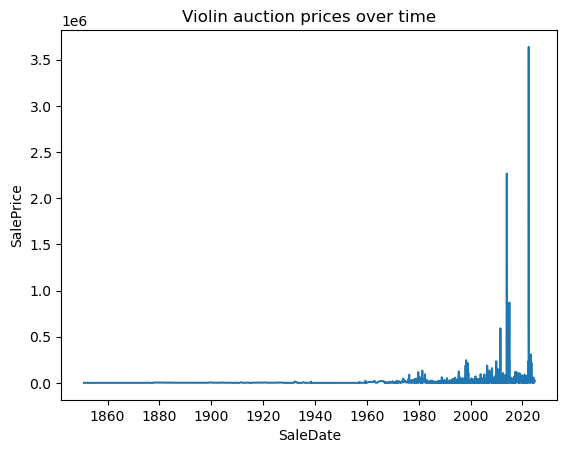

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.lineplot(x = 'SaleDate', y = 'SalePrice', data = violins, errorbar=None).set_title('Violin auction prices over time')
plt.show()

# Violin Sale Prices Before 1960
[Return to Table of Contents](#Contents)

In [77]:
# look more closely at how prices have changed before 1960
violins_b1960 = violins[violins['SaleDate'] < '1960-01-01'].reset_index(drop=True)
violins_b1960

Instrument   SaleDate  SalePrice       AuctionHouse AuctionCity  \
0       Violin 1955-11-17         84  Puttick & Simpson         NaN   
1       Violin 1909-12-08        667  Puttick & Simpson         NaN   
2       Violin 1908-12-10        143  Puttick & Simpson         NaN   
3       Violin 1893-12-06        619  Puttick & Simpson         NaN   
4       Violin 1956-07-26        695  Puttick & Simpson         NaN   
..         ...        ...        ...                ...         ...   
164     Violin 1915-06-29        114  Puttick & Simpson         NaN   
165     Violin 1956-05-24        362  Puttick & Simpson         NaN   
166     Violin 1946-09-26        460  Puttick & Simpson         NaN   
167     Violin 1909-10-27        319   Glendining & Co.         NaN   
168     Violin 1908-04-08        176   Glendining & Co.         NaN   

                         Maker       City Country  
0          Albani, Matthias II    Bolzano   Italy  
1    Amati, Antonio & Girolamo    Cremona   Italy  
2    Amati, Antonio & Girolamo    Cremona   Italy  
3           Amati, Girolamo II    Cremona   Italy  
4                Amati, Nicolò    Cremona   Italy  
..                         ...        ...     ...  
164            Toppani, Angelo       Rome   Italy  
165   Valenzano, Joannes Maria  Barcelona   Spain  
166   Vuillaume, Jean-Baptiste  Mirecourt  France  
167   Vuillaume, Jean-Baptiste  Mirecourt  France  
168   Vuillaume, Jean-Baptiste  Mirecourt  France  

[169 rows x 8 columns]

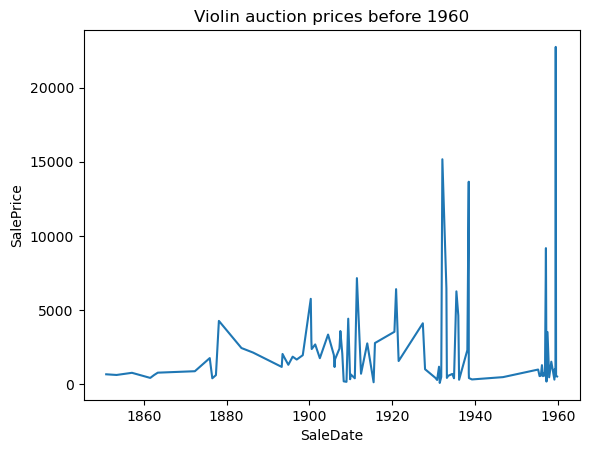

In [79]:
sns.lineplot(x = 'SaleDate', y = 'SalePrice', data = violins_b1960, errorbar=None).set_title('Violin auction prices before 1960')
plt.show()

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude dates after 1960
violins_b1960 = violins[violins['SaleDate'] < '1960-01-01']

# Extract years from SaleDate for grouping
# violins_b1960.loc[:, ('Year')] = violins_b1960['SaleDate'].dt.year
# violins_b1960

violins_b1960['Year'] = violins_b1960['SaleDate'].dt.year
violins_b1960['Year']

/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_50645/1157359694.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violins_b1960['Year'] = violins_b1960['SaleDate'].dt.year


144      1955
301      1909
302      1908
319      1893
381      1956
         ... 
23204    1915
23344    1956
24237    1946
24238    1909
24239    1908
Name: Year, Length: 169, dtype: int32

In [83]:
violins_b1960

Instrument   SaleDate  SalePrice       AuctionHouse AuctionCity  \
144       Violin 1955-11-17         84  Puttick & Simpson         NaN   
301       Violin 1909-12-08        667  Puttick & Simpson         NaN   
302       Violin 1908-12-10        143  Puttick & Simpson         NaN   
319       Violin 1893-12-06        619  Puttick & Simpson         NaN   
381       Violin 1956-07-26        695  Puttick & Simpson         NaN   
...          ...        ...        ...                ...         ...   
23204     Violin 1915-06-29        114  Puttick & Simpson         NaN   
23344     Violin 1956-05-24        362  Puttick & Simpson         NaN   
24237     Violin 1946-09-26        460  Puttick & Simpson         NaN   
24238     Violin 1909-10-27        319   Glendining & Co.         NaN   
24239     Violin 1908-04-08        176   Glendining & Co.         NaN   

                           Maker       City Country  Year  
144          Albani, Matthias II    Bolzano   Italy  1955  
301    Amati, Antonio & Girolamo    Cremona   Italy  1909  
302    Amati, Antonio & Girolamo    Cremona   Italy  1908  
319           Amati, Girolamo II    Cremona   Italy  1893  
381                Amati, Nicolò    Cremona   Italy  1956  
...                          ...        ...     ...   ...  
23204            Toppani, Angelo       Rome   Italy  1915  
23344   Valenzano, Joannes Maria  Barcelona   Spain  1956  
24237   Vuillaume, Jean-Baptiste  Mirecourt  France  1946  
24238   Vuillaume, Jean-Baptiste  Mirecourt  France  1909  
24239   Vuillaume, Jean-Baptiste  Mirecourt  France  1908  

[169 rows x 9 columns]

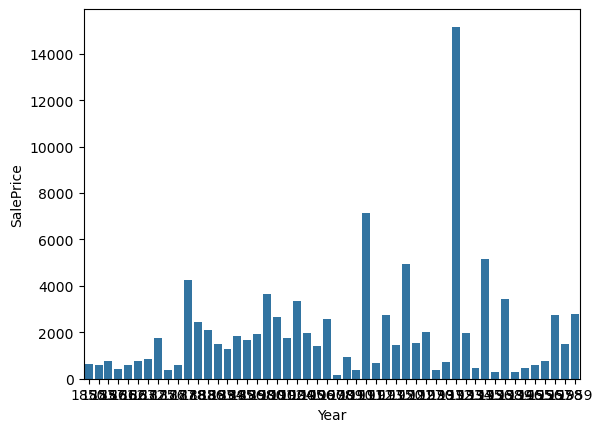

In [85]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data to plot: violins_b1960

# Create year labels for the x-axis
labels = violins_b1960.Year.tolist()

# Define the label locations and width of bars 
x = np.arange(len(labels))  

# Create the figure
sns.barplot(violins_b1960, x='Year', y='SalePrice', errorbar=None) #, width=0.8, label='', color='red')

# Resize the figure   
plt.show()

In [87]:
violins_b1960

Instrument   SaleDate  SalePrice       AuctionHouse AuctionCity  \
144       Violin 1955-11-17         84  Puttick & Simpson         NaN   
301       Violin 1909-12-08        667  Puttick & Simpson         NaN   
302       Violin 1908-12-10        143  Puttick & Simpson         NaN   
319       Violin 1893-12-06        619  Puttick & Simpson         NaN   
381       Violin 1956-07-26        695  Puttick & Simpson         NaN   
...          ...        ...        ...                ...         ...   
23204     Violin 1915-06-29        114  Puttick & Simpson         NaN   
23344     Violin 1956-05-24        362  Puttick & Simpson         NaN   
24237     Violin 1946-09-26        460  Puttick & Simpson         NaN   
24238     Violin 1909-10-27        319   Glendining & Co.         NaN   
24239     Violin 1908-04-08        176   Glendining & Co.         NaN   

                           Maker       City Country  Year  
144          Albani, Matthias II    Bolzano   Italy  1955  
301    Amati, Antonio & Girolamo    Cremona   Italy  1909  
302    Amati, Antonio & Girolamo    Cremona   Italy  1908  
319           Amati, Girolamo II    Cremona   Italy  1893  
381                Amati, Nicolò    Cremona   Italy  1956  
...                          ...        ...     ...   ...  
23204            Toppani, Angelo       Rome   Italy  1915  
23344   Valenzano, Joannes Maria  Barcelona   Spain  1956  
24237   Vuillaume, Jean-Baptiste  Mirecourt  France  1946  
24238   Vuillaume, Jean-Baptiste  Mirecourt  France  1909  
24239   Vuillaume, Jean-Baptiste  Mirecourt  France  1908  

[169 rows x 9 columns]

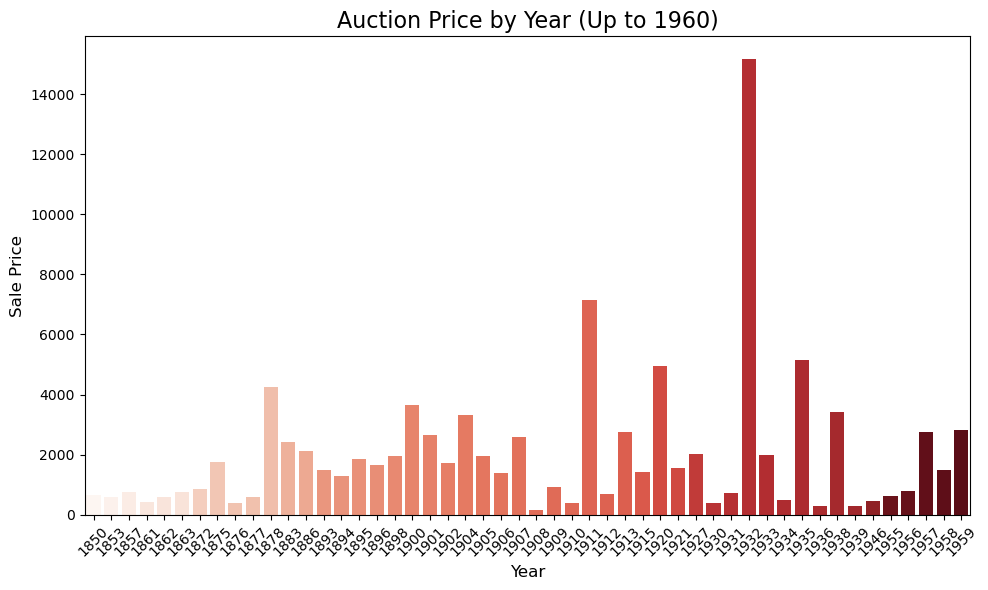

In [89]:
# # Calculate average SalePrice for year
# avg_price_per_year = df_filtered.groupby('Year')['SalePrice'].mean().reset_index()

# Create barplot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='SalePrice', data=violins_b1960, palette='Reds', hue='Year', legend=False, errorbar=None)

# Customize the plot
plt.title('Auction Price by Year (Up to 1960)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [91]:
violins_b1960.groupby('Year').count()

Instrument  SaleDate  SalePrice  AuctionHouse  AuctionCity  Maker  City  \
Year                                                                            
1850           2         2          2             2            0      2     2   
1853           1         1          1             1            0      1     1   
1857           7         7          7             7            0      7     7   
1861           1         1          1             1            0      1     1   
1862           2         2          2             2            0      2     2   
1863           2         2          2             2            0      2     2   
1872           9         9          9             9            0      9     9   
1875           1         1          1             1            0      1     1   
1876           1         1          1             1            0      1     1   
1877           3         3          3             3            0      3     3   
1878           1         1          1             1            0      1     1   
1883           1         1          1             1            0      1     1   
1886           2         2          2             2            0      2     2   
1893           9         9          9             9            0      9     9   
1894           1         1          1             1            0      1     1   
1895           1         1          1             1            0      1     1   
1896           3         3          3             3            0      3     3   
1898           1         1          1             1            0      1     1   
1900           3         3          3             3            0      3     3   
1901           1         1          1             1            0      1     1   
1902           1         1          1             1            0      1     1   
1904           1         1          1             1            0      1     1   
1905           1         1          1             1            0      1     1   
1906           2         2          2             2            0      2     2   
1907           5         5          5             5            0      5     5   
1908           2         2          2             2            0      2     2   
1909          13        13         13            13            0     13    13   
1910           1         1          1             1            0      1     1   
1911           1         1          1             1            0      1     1   
1912           1         1          1             1            0      1     1   
1913           1         1          1             1            0      1     1   
1915           2         2          2             2            0      2     2   
1920           2         2          2             2            0      2     2   
1921           2         2          2             2            0      2     2   
1927           6         6          6             6            0      6     6   
1930           5         5          5             5            0      5     5   
1931           4         4          4             4            0      4     4   
1932           3         3          3             3            0      3     3   
1933           8         8          8             8            0      8     8   
1934           3         3          3             3            0      3     3   
1935           3         3          3             3            0      3     3   
1936           5         5          5             5            0      5     5   
1938           7         7          7             7            0      7     7   
1939           1         1          1             1            0      1     1   
1946           1         1          1             1            0      1     1   
1955           7         7          7             7            0      7     7   
1956          13        13         13            13            0     13    13   
1957           5         5          5

In [93]:
# What instruments sold in 1932? 
violins_b1960[violins_b1960['Year'] == 1932]

Instrument   SaleDate  SalePrice             AuctionHouse AuctionCity  \
11421     Violin 1932-02-05      16000  Anderson Galleries Inc.         NaN   
11422     Violin 1932-02-05      15500  Anderson Galleries Inc.         NaN   
22067     Violin 1932-02-05      14000  Anderson Galleries Inc.         NaN   

                                          Maker     City Country  Year  
11421  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1932  
11422  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1932  
22067                       Stradivari, Antonio  Cremona   Italy  1932

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a column, 'Year', for grouping
violins_b1960['SaleDate'].dt.year

144      1955
301      1909
302      1908
319      1893
381      1956
         ... 
23204    1915
23344    1956
24237    1946
24238    1909
24239    1908
Name: SaleDate, Length: 169, dtype: int32

/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_50645/164159155.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violins_b1960['Year'] = violins_b1960['SaleDate'].dt.year
/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_50645/164159155.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


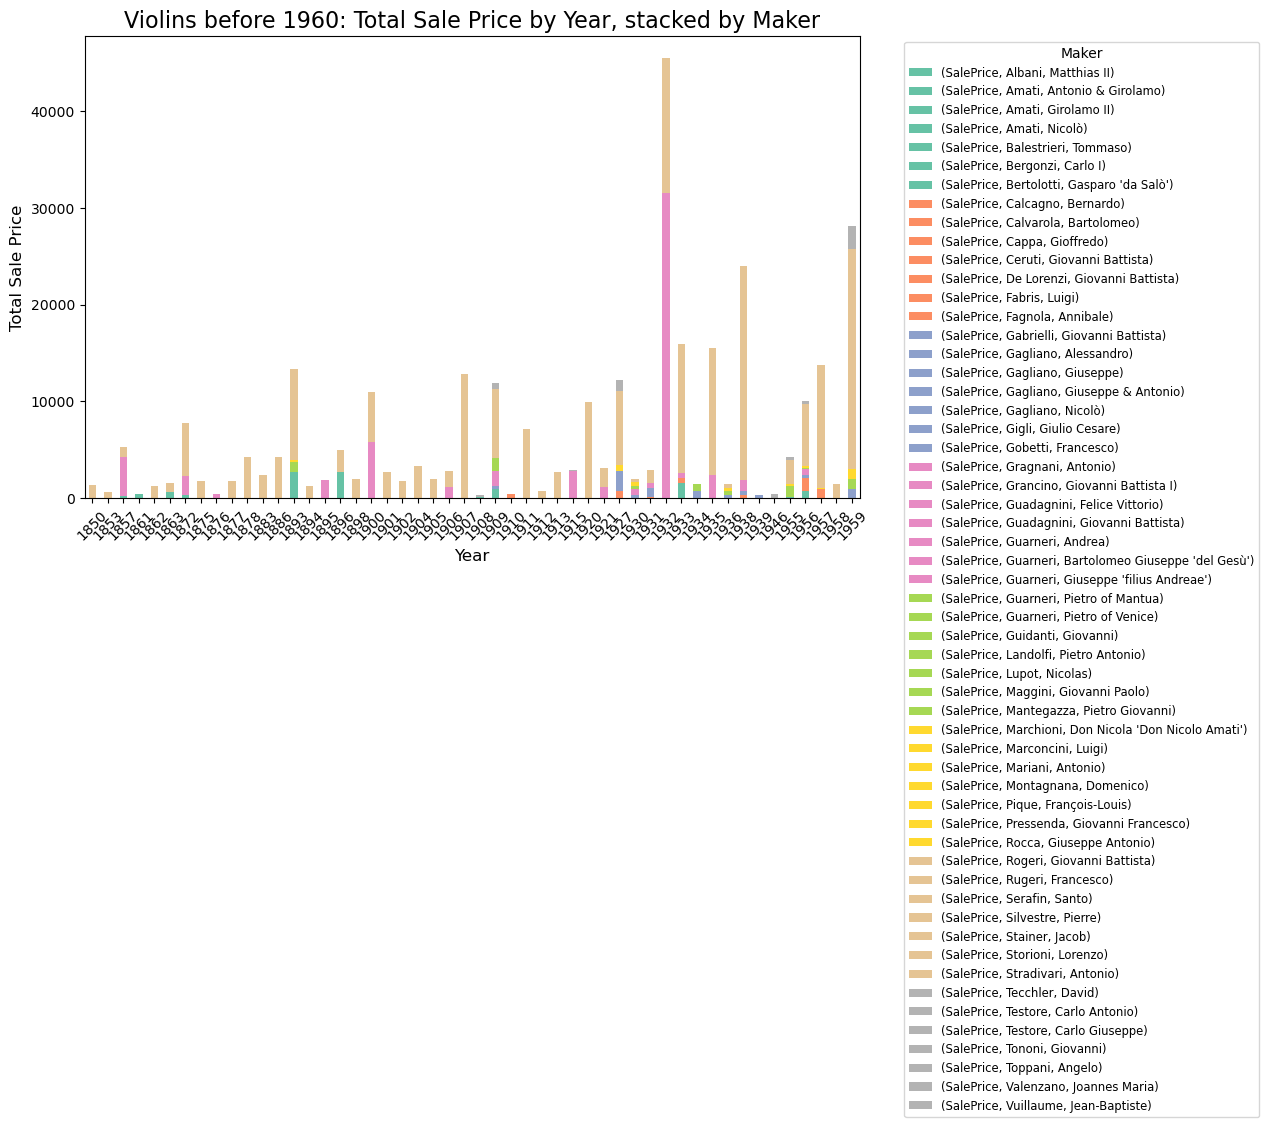

In [97]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
violins_b1960 = violins[violins['SaleDate'] < '1960-01-01']

# Extract years from SaleDate for grouping
violins_b1960['Year'] = violins_b1960['SaleDate'].dt.year

# Group by 'Year' and 'Maker', and compute average SalePrice
df_grouped = violins_b1960.groupby(['Year', 'Maker']).agg({'SalePrice': 'sum'}).unstack().fillna(0)

# Create a stacked bar chart, partitioned by 'Maker'
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Customize the plot
plt.title('Violins before 1960: Total Sale Price by Year, stacked by Maker', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sale Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Move the legend outside the plot area
ax.legend(title='Maker', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='medium')

# Show the plot
plt.show()

In [99]:
df_grouped = violins_b1960.groupby(['Year', 'Maker'])['SalePrice'].count()
df_grouped

Year  Maker                                   
1850  Stradivari, Antonio                         2
1853  Stradivari, Antonio                         1
1857  Amati, Nicolò                               1
      Guarneri, Bartolomeo Giuseppe 'del Gesù'    5
      Stradivari, Antonio                         1
                                                 ..
1959  Marchioni, Don Nicola 'Don Nicolo Amati'    1
      Marconcini, Luigi                           2
      Stradivari, Antonio                         1
      Testore, Carlo Antonio                      2
      Tononi, Giovanni                            1
Name: SalePrice, Length: 135, dtype: int64

In [101]:
df_grouped = violins_b1960.groupby(['Year', 'Maker'])['SalePrice'].sum().unstack(fill_value=0)
df_grouped

Maker  Albani, Matthias II  Amati, Antonio & Girolamo  Amati, Girolamo II  \
Year                                                                        
1850                     0                          0                   0   
1853                     0                          0                   0   
1857                     0                          0                   0   
1861                     0                          0                   0   
1862                     0                          0                   0   
1863                     0                          0                   0   
1872                     0                          0                   0   
1875                     0                          0                   0   
1876                     0                          0                   0   
1877                     0                          0                   0   
1878                     0                          0                   0   
1883                     0                          0                   0   
1886                     0                          0                   0   
1893                     0                          0                 619   
1894                     0                          0                   0   
1895                     0                          0                   0   
1896                     0                          0                   0   
1898                     0                          0                   0   
1900                     0                          0                   0   
1901                     0                          0                   0   
1902                     0                          0                   0   
1904                     0                          0                   0   
1905                     0                          0                   0   
1906                     0                          0                   0   
1907                     0                          0                   0   
1908                     0                        143                   0   
1909                     0                        667                   0   
1910                     0                          0                   0   
1911                     0                          0                   0   
1912                     0                          0                   0   
1913                     0                          0                   0   
1915                     0                          0                   0   
1920                     0                          0                   0   
1921                     0                          0                   0   
1927                     0                          0                   0   
1930                     0                          0                   0   
1931                     0                          0                   0   
1932                     0                          0                   0   
1933                     0                          0                   0   
1934                     0                          0                   0   
1935                     0                          0                   0   
1936                     0                          0                   0   
1938                     0                          0                   0   
1939                     0                          0                   0   
1946                     0                          0                   0   
1955                    84                          0                   0   
1956                     0                          0                   0   
1957                     0                          0                   0   
1958                     0                          0                   0   
1959                     0                          0                   0

/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_50645/3629823850.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


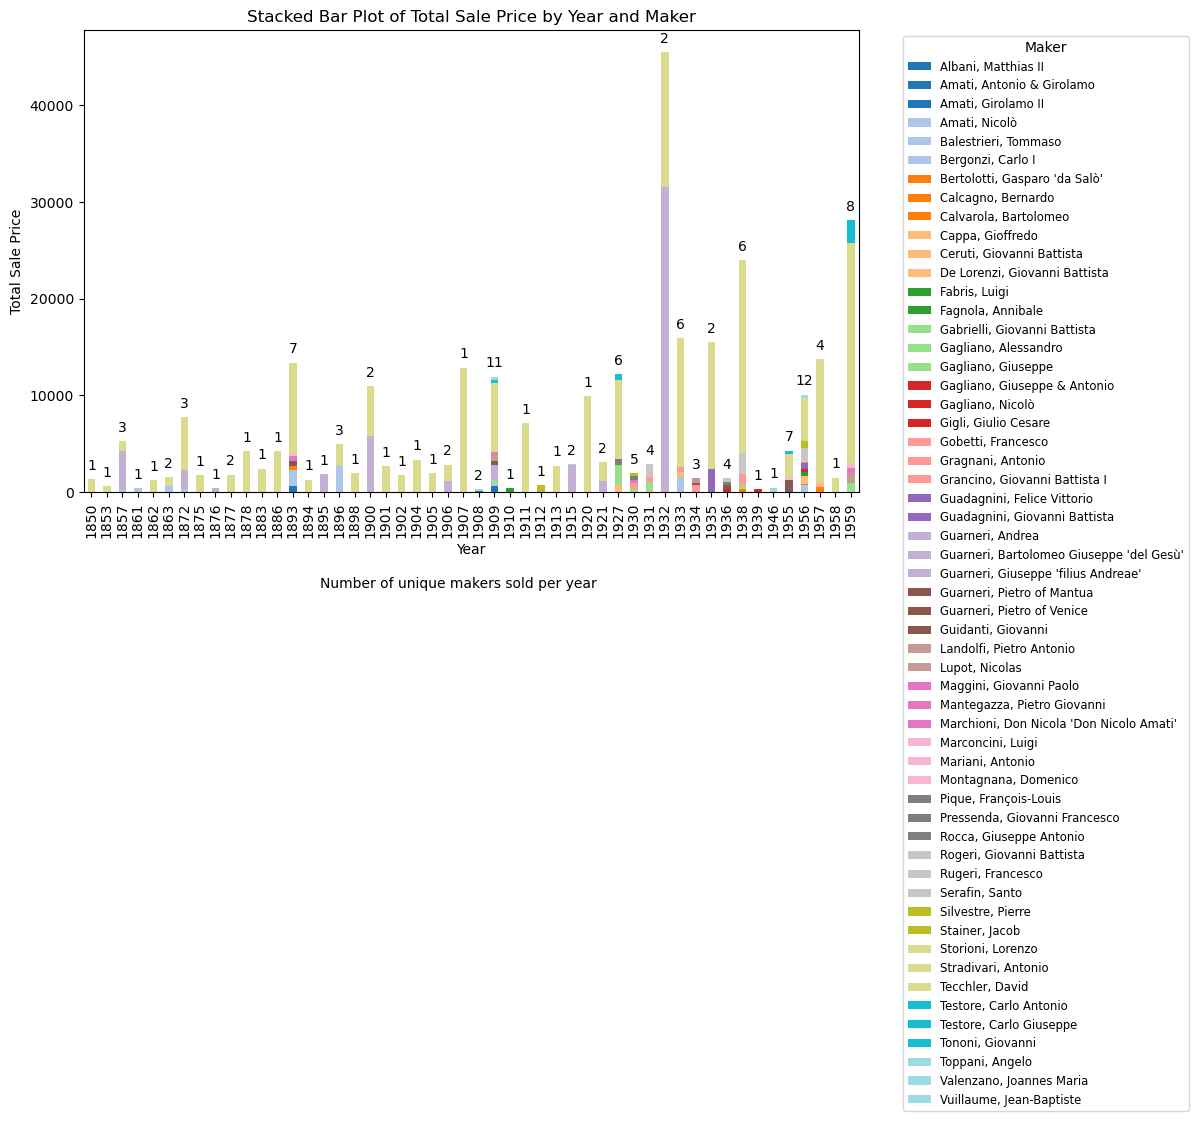

In [103]:
# Group by 'Year' and 'Maker' and sum 'SalePrice' for each maker per year
df_grouped = violins_b1960.groupby(['Year', 'Maker'])['SalePrice'].sum().unstack(fill_value=0)

# Plot stacked bar chart
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="tab20")
plt.xlabel('Year')
plt.ylabel('Total Sale Price')
plt.title('Stacked Bar Plot of Total Sale Price by Year and Maker')
plt.legend(title='Maker')

# Annotate each bar with the count of makers per year
for i, year in enumerate(df_grouped.index):
    total_makers = (df_grouped.loc[year] > 0).sum()
    plt.text(i, df_grouped.loc[year].sum() + 1000, f'{total_makers}', ha='center')

# Move the legend outside the plot area
ax.legend(title='Maker', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='medium')

# Add caption
plt.figtext(0.5, -0.05, "Number of unique makers sold per year", ha="center", fontsize=10)

plt.tight_layout()
plt.show()

In [105]:
violins_b1960

Instrument   SaleDate  SalePrice       AuctionHouse AuctionCity  \
144       Violin 1955-11-17         84  Puttick & Simpson         NaN   
301       Violin 1909-12-08        667  Puttick & Simpson         NaN   
302       Violin 1908-12-10        143  Puttick & Simpson         NaN   
319       Violin 1893-12-06        619  Puttick & Simpson         NaN   
381       Violin 1956-07-26        695  Puttick & Simpson         NaN   
...          ...        ...        ...                ...         ...   
23204     Violin 1915-06-29        114  Puttick & Simpson         NaN   
23344     Violin 1956-05-24        362  Puttick & Simpson         NaN   
24237     Violin 1946-09-26        460  Puttick & Simpson         NaN   
24238     Violin 1909-10-27        319   Glendining & Co.         NaN   
24239     Violin 1908-04-08        176   Glendining & Co.         NaN   

                           Maker       City Country  Year  
144          Albani, Matthias II    Bolzano   Italy  1955  
301    Amati, Antonio & Girolamo    Cremona   Italy  1909  
302    Amati, Antonio & Girolamo    Cremona   Italy  1908  
319           Amati, Girolamo II    Cremona   Italy  1893  
381                Amati, Nicolò    Cremona   Italy  1956  
...                          ...        ...     ...   ...  
23204            Toppani, Angelo       Rome   Italy  1915  
23344   Valenzano, Joannes Maria  Barcelona   Spain  1956  
24237   Vuillaume, Jean-Baptiste  Mirecourt  France  1946  
24238   Vuillaume, Jean-Baptiste  Mirecourt  France  1909  
24239   Vuillaume, Jean-Baptiste  Mirecourt  France  1908  

[169 rows x 9 columns]

/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_50645/2380791056.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


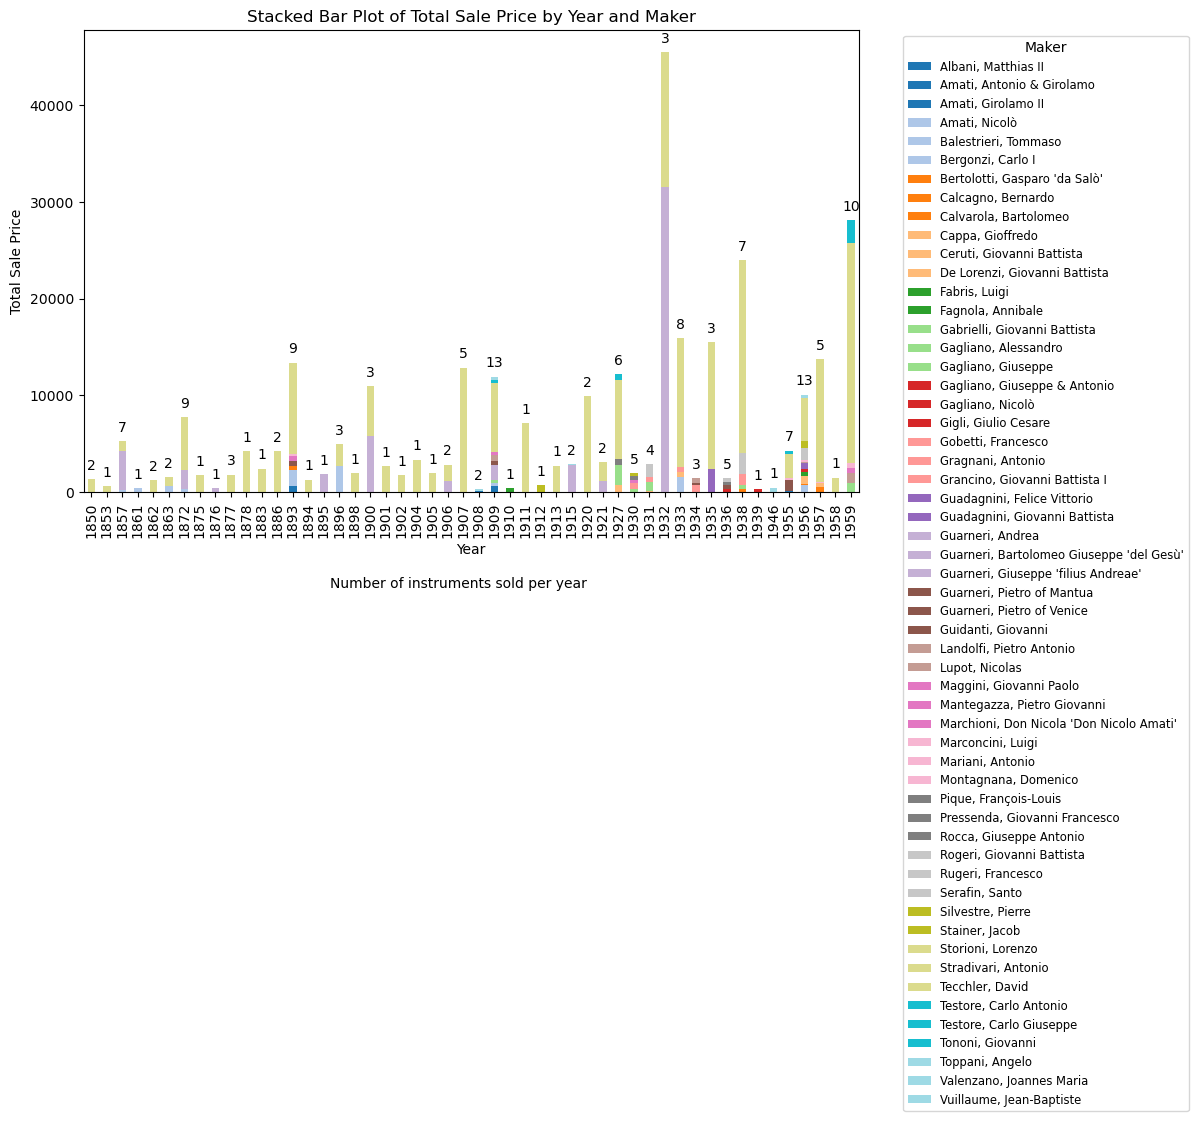

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Year' and 'Maker' and sum 'SalePrice' for each maker per year
df_grouped = violins_b1960.groupby(['Year', 'Maker'])['SalePrice'].sum().unstack(fill_value=0)

# Plot stacked bar chart
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="tab20")
plt.xlabel('Year')
plt.ylabel('Total Sale Price')
plt.title('Stacked Bar Plot of Total Sale Price by Year and Maker')
plt.legend(title='Maker')

# Annotate each bar with the total number of instruments sold per year
for i, year in enumerate(df_grouped.index):
    total_instruments = (violins_b1960['Year'] == year).sum()
    plt.text(i, df_grouped.loc[year].sum() + 1000, f'{total_instruments}', ha='center')

# Move the legend outside the plot area
ax.legend(title='Maker', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='medium')

# Add caption
plt.figtext(0.5, -0.05, "Number of instruments sold per year", ha="center", fontsize=10)

plt.tight_layout()
plt.show()

### Price range EDA for plotly date ranges

In [6]:
Tarisio.head()

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity  MakerID  \
0     Violin 2010-02-20       4200      Tarisio     Wallgau     2919   
1     Violin 1987-04-27       2838   Bongartz's  Mittenwald     2919   
2     Violin 2018-05-17      24000      Tarisio  Mittenwald     2611   
3     Violin 2008-11-15       3884   Bongartz's         NaN     2611   
4     Violin 1990-03-27       2146    Sotheby's  Mittenwald     2611   

             Maker        City  Country  Year  
0  Achner, Michael  Mittenwald  Germany  2010  
1  Achner, Michael  Mittenwald  Germany  1987  
2   Achner, Philip  Mittenwald  Germany  2018  
3   Achner, Philip  Mittenwald  Germany  2008  
4   Achner, Philip  Mittenwald  Germany  1990

In [141]:
decade = Tarisio[(Tarisio['Year']>=1879) & (Tarisio['Year']<1980)]
decade.describe() 

SaleDate      SalePrice      MakerID         Year
count                            926     926.000000   926.000000   926.000000
mean   1965-02-27 11:49:06.868250528   11890.749460   735.387689  1964.595032
min              1883-07-27 00:00:00      69.000000     5.000000  1883.000000
25%              1967-12-23 12:00:00    1324.750000   220.000000  1967.250000
50%              1973-08-22 12:00:00    4033.500000   722.000000  1973.000000
75%              1977-05-12 00:00:00   11895.750000  1025.000000  1977.000000
max              1979-12-15 00:00:00  331202.000000  9091.000000  1979.000000
std                              NaN   27027.709706   646.754010    21.959598

In [143]:
Tarisio['SalePrice'].sort_values(ascending=False)

46384    15821285
46379    15340000
19403     9440000
46375     5900000
19404     3637892
           ...   
36940          24
41747          20
39885           0
11084           0
20758           0
Name: SalePrice, Length: 55283, dtype: int64

In [45]:
Tarisio.iloc[39885]

Instrument                   Violin
SaleDate        1987-04-27 00:00:00
SalePrice                         0
AuctionHouse             Bongartz's
AuctionCity                 Bologna
MakerID                         560
Maker            Pollastri, Augusto
City                        Bologna
Country                       Italy
Year                           1987
Name: 39885, dtype: object

In [47]:
Tarisio.iloc[20758]

Instrument               Violin Bow
SaleDate        1985-11-18 00:00:00
SalePrice                         0
AuctionHouse             Bongartz's
AuctionCity                   Lille
MakerID                        1838
Maker            Hel, Pierre Joseph
City                          Lille
Country                      France
Year                           1985
Name: 20758, dtype: object

In [49]:
Tarisio.iloc[11084]

Instrument                           Violin
SaleDate                1989-11-20 00:00:00
SalePrice                                 0
AuctionHouse                     Bongartz's
AuctionCity                       The Hague
MakerID                                1338
Maker           Cuypers, Johannes Theodorus
City                              The Hague
Country                         Netherlands
Year                                   1989
Name: 11084, dtype: object

In [51]:
Tarisio.iloc[41747]

Instrument                Bass Viol
SaleDate        1877-06-28 00:00:00
SalePrice                        20
AuctionHouse      Puttick & Simpson
AuctionCity                     NaN
MakerID                       12028
Maker                 Rose, John II
City                         London
Country              United Kingdom
Year                           1877
Name: 41747, dtype: object

In [53]:
Tarisio.iloc[36940]

Instrument                                 Violin Bow
SaleDate                          2002-10-21 00:00:00
SalePrice                                          24
AuctionHouse    Millon & Associés (Gilles Chancereul)
AuctionCity                                       NaN
MakerID                                          1093
Maker                                 Pajeot, Étienne
City                                        Mirecourt
Country                                        France
Year                                             2002
Name: 36940, dtype: object

In [57]:
Tarisio[Tarisio['Maker']=='Pajeot, Étienne'].sort_values(by='SalePrice',ascending=True)

Instrument   SaleDate  SalePrice  \
36940  Violin Bow 2002-10-21         24   
36942  Violin Bow 2002-06-11       1492   
36965  Violin Bow 1996-03-19       2291   
36964   Viola Bow 1996-03-19       2820   
36910  Violin Bow 2009-03-11       2976   
...           ...        ...        ...   
36857  Violin Bow 2021-12-02      73108   
36842  Violin Bow 2023-03-28      81237   
36872  Violin Bow 2018-12-05      81435   
36858  Violin Bow 2020-12-03      82933   
36873   Viola Bow 2018-12-05     105304   

                                AuctionHouse AuctionCity  MakerID  \
36940  Millon & Associés (Gilles Chancereul)         NaN     1093   
36942                              Sotheby's       Paris     1093   
36965                              Sotheby's       Paris     1093   
36964                              Sotheby's       Paris     1093   
36910                                Bonhams         NaN     1093   
...                                      ...         ...      ...   
36857                                    NaN         NaN     1093   
36842                                    NaN       Paris     1093   
36872                         Vichy-Enchères         NaN     1093   
36858                         Vichy-Enchères         NaN     1093   
36873                         Vichy-Enchères         NaN     1093   

                 Maker       City Country  Year  
36940  Pajeot, Étienne  Mirecourt  France  2002  
36942  Pajeot, Étienne  Mirecourt  France  2002  
36965  Pajeot, Étienne  Mirecourt  France  1996  
36964  Pajeot, Étienne  Mirecourt  France  1996  
36910  Pajeot, Étienne  Mirecourt  France  2009  
...                ...        ...     ...   ...  
36857  Pajeot, Étienne  Mirecourt  France  2021  
36842  Pajeot, Étienne  Mirecourt  France  2023  
36872  Pajeot, Étienne  Mirecourt  France  2018  
36858  Pajeot, Étienne  Mirecourt  France  2020  
36873  Pajeot, Étienne  Mirecourt  France  2018  

[139 rows x 10 columns]

In [155]:
# Data by decade 

import pandas as pd

start_year = Tarisio['Year'].min()  # First decade start
end_year = Tarisio['Year'].max() # Last decade end

# Initialize an empty list to store results
decade_summary = []

# Loop through each decade
for year in range(start_year, end_year, 10):
    # Filter the data for the current decade
    decade_data = Tarisio[(Tarisio['Year'] >= year) & (Tarisio['Year'] < year + 10)]
    
    # Skip if there's no data for the decade
    if not decade_data.empty:
        # Calculate the required statistics
        min_price = decade_data['SalePrice'].min()
        max_price = decade_data['SalePrice'].max()
        count = decade_data.shape[0]
        
        # Append results to the summary list
        decade_summary.append({
            'Decade': f"{year}-{year + 9}",
            'Min SalePrice': min_price,
            'Max SalePrice': max_price,
            'Count': count
        })

# Convert the results into a DataFrame
summary_df = pd.DataFrame(decade_summary)
summary_df

Decade  Min SalePrice  Max SalePrice  Count
0   1829-1838            357            357      1
1   1849-1858            195           1265     13
2   1859-1868            158           1327      9
3   1869-1878             20           4256     24
4   1879-1888            209           3798      9
5   1889-1898            229           4095     19
6   1899-1908             95           5746     19
7   1909-1918            114           7143     26
8   1919-1928            571           7619     11
9   1929-1938             69          16000     53
10  1939-1948            304           2200      3
11  1949-1958             84           9167     33
12  1959-1968            156          52800     86
13  1969-1978            101         315013    556
14  1979-1988              0        1205571   8641
15  1989-1998              0        1775587  12930
16  1999-2008             24        3544000  13450
17  2009-2018             56       15821285  12202
18  2019-2028            162       15340000   7198

In [177]:
Tarisio[Tarisio['Maker']=='Guadagnini, Giovanni Battista']

Instrument   SaleDate  SalePrice       AuctionHouse AuctionCity  \
19182     Violin 2024-03-15     750000                NaN       Milan   
19183     Violin 2024-02-27     127916                NaN       Parma   
19184     Violin 2023-10-24     732193                NaN    Piacenza   
19185     Violin 2022-11-01     853226                NaN    Piacenza   
19186      Cello 2022-10-25    1196134                NaN       Turin   
...          ...        ...        ...                ...         ...   
19293     Violin 1970-05-28      10086          Sotheby's         NaN   
19294     Violin 1969-07-11       1200          Sotheby's         NaN   
19295     Violin 1968-07-19       1196          Sotheby's         NaN   
19296     Violin 1966-12-05       7840          Sotheby's         NaN   
19297     Violin 1935-12-12       2400  Puttick & Simpson         NaN   

       MakerID                          Maker  City Country  Year  
19182      234  Guadagnini, Giovanni Battista  Como   Italy  2024  
19183      234  Guadagnini, Giovanni Battista  Como   Italy  2024  
19184      234  Guadagnini, Giovanni Battista  Como   Italy  2023  
19185      234  Guadagnini, Giovanni Battista  Como   Italy  2022  
19186      234  Guadagnini, Giovanni Battista  Como   Italy  2022  
...        ...                            ...   ...     ...   ...  
19293      234  Guadagnini, Giovanni Battista  Como   Italy  1970  
19294      234  Guadagnini, Giovanni Battista  Como   Italy  1969  
19295      234  Guadagnini, Giovanni Battista  Como   Italy  1968  
19296      234  Guadagnini, Giovanni Battista  Como   Italy  1966  
19297      234  Guadagnini, Giovanni Battista  Como   Italy  1935  

[116 rows x 10 columns]

In [179]:
116+166+32

314

# Violin Sale Prices Between 1960 and 1980
[Return to Table of Contents](#Contents)

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Include sale dates from 1960 - 1980
violins_6080 = violins[(violins['SaleDate'] >= '1960-01-01') & (violins['SaleDate'] < '1980-01-01')]

# Extract years from SaleDate for grouping
violins_6080['Year'] = violins_6080['SaleDate'].dt.year
violins_6080['Year']

/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_50645/1861267167.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violins_6080['Year'] = violins_6080['SaleDate'].dt.year


170      1976
171      1973
197      1976
254      1978
298      1979
         ... 
24236    1963
24345    1973
24346    1971
24347    1971
24348    1969
Name: Year, Length: 575, dtype: int32

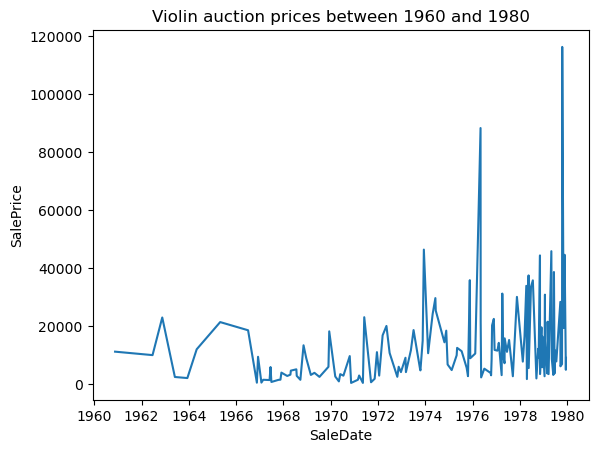

In [112]:
sns.lineplot(x = 'SaleDate', y = 'SalePrice', data = violins_6080, errorbar=None).set_title('Violin auction prices between 1960 and 1980')
plt.show()

# Violin Sale Prices Between 1980 and 2010
[Return to Table of Contents](#Contents)

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Include sale dates from 1980 - 2010
violins_8010 = violins[(violins['SaleDate'] >= '1980-01-01') & (violins['SaleDate'] < '2010-01-01')]

In [117]:
violins_8010

Instrument   SaleDate  SalePrice AuctionHouse   AuctionCity  \
1         Violin 1987-04-27       2838   Bongartz's    Mittenwald   
3         Violin 2008-11-15       3884   Bongartz's           NaN   
4         Violin 1990-03-27       2146    Sotheby's    Mittenwald   
7         Violin 2007-10-25       4388      Tarisio     Mirecourt   
8         Violin 1994-07-19       1365      Bonhams         Paris   
...          ...        ...        ...          ...           ...   
25254     Violin 1987-04-23        540    Phillip's        Passau   
25261     Violin 2009-12-14      15634   Brompton's           NaN   
25262     Violin 2009-12-14      15634   Brompton's           NaN   
25263     Violin 2003-05-08     130000      Tarisio  Brooklyn, NY   
25264     Violin 2003-05-08      83250      Tarisio  Brooklyn, NY   

                           Maker          City  Country  
1                Achner, Michael    Mittenwald  Germany  
3                 Achner, Philip    Mittenwald  Germany  
4                 Achner, Philip    Mittenwald  Germany  
7      Acoulon, Alexandre Alfred     Mirecourt   France  
8      Acoulon, Alexandre Alfred     Mirecourt   France  
...                          ...           ...      ...  
25254          Zwerger, Anton II        Passau  Germany  
25261       Zygmuntowicz, Samuel  Brooklyn, NY       US  
25262       Zygmuntowicz, Samuel  Brooklyn, NY       US  
25263       Zygmuntowicz, Samuel  Brooklyn, NY       US  
25264       Zygmuntowicz, Samuel  Brooklyn, NY       US  

[17531 rows x 8 columns]

In [119]:
# Extract years from SaleDate for grouping
violins_8010['Year'] = violins_8010['SaleDate'].dt.year
violins_8010['Year']

/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_50645/251298398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violins_8010['Year'] = violins_8010['SaleDate'].dt.year


1        1987
3        2008
4        1990
7        2007
8        1994
         ... 
25254    1987
25261    2009
25262    2009
25263    2003
25264    2003
Name: Year, Length: 17531, dtype: int32

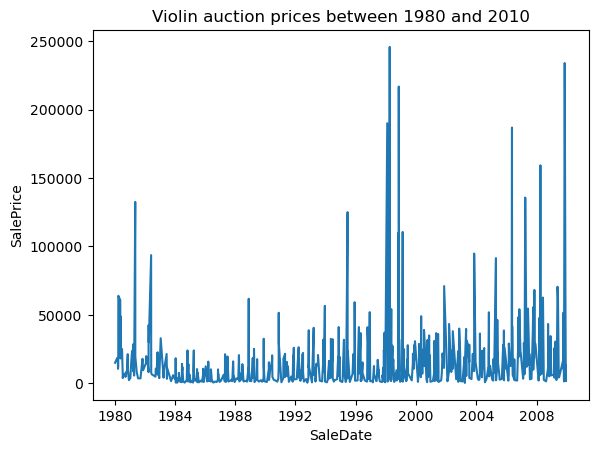

In [121]:
sns.lineplot(x = 'SaleDate', y = 'SalePrice', data = violins_8010, errorbar=None).set_title('Violin auction prices between 1980 and 2010')
plt.show()

# Violin Sale Prices After 2010
[Return to Table of Contents](#Contents)

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sale dates from after 2010
violins_2010 = violins[violins['SaleDate'] >= '2010-01-01']

# Extract years from SaleDate for grouping
violins_2010['Year'] = violins_2010['SaleDate'].dt.year
violins_2010

/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_50645/2437010251.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violins_2010['Year'] = violins_2010['SaleDate'].dt.year


Instrument   SaleDate  SalePrice AuctionHouse   AuctionCity  \
0         Violin 2010-02-20       4200      Tarisio       Wallgau   
2         Violin 2018-05-17      24000      Tarisio    Mittenwald   
5         Violin 2019-11-08       2950      Tarisio           NaN   
6         Violin 2013-10-16       3000      Tarisio         Paris   
23        Violin 2017-06-27       3767      Tarisio    Copenhagen   
...          ...        ...        ...          ...           ...   
25256     Violin 2016-02-26     102000      Tarisio  New York, NY   
25257     Violin 2015-10-24     102000      Tarisio  New York, NY   
25258     Violin 2014-10-17      57000      Tarisio  New York, NY   
25259     Violin 2013-05-03      84000      Tarisio  Brooklyn, NY   
25260     Violin 2012-04-27     108000      Tarisio  Brooklyn, NY   

                           Maker          City  Country  Year  
0                Achner, Michael    Mittenwald  Germany  2010  
2                 Achner, Philip    Mittenwald  Germany  2018  
5      Acoulon, Alexandre Alfred     Mirecourt   France  2019  
6      Acoulon, Alexandre Alfred     Mirecourt   France  2013  
23       Adamsen, Peter Petersen    Copenhagen  Denmark  2017  
...                          ...           ...      ...   ...  
25256       Zygmuntowicz, Samuel  Brooklyn, NY       US  2016  
25257       Zygmuntowicz, Samuel  Brooklyn, NY       US  2015  
25258       Zygmuntowicz, Samuel  Brooklyn, NY       US  2014  
25259       Zygmuntowicz, Samuel  Brooklyn, NY       US  2013  
25260       Zygmuntowicz, Samuel  Brooklyn, NY       US  2012  

[6990 rows x 9 columns]

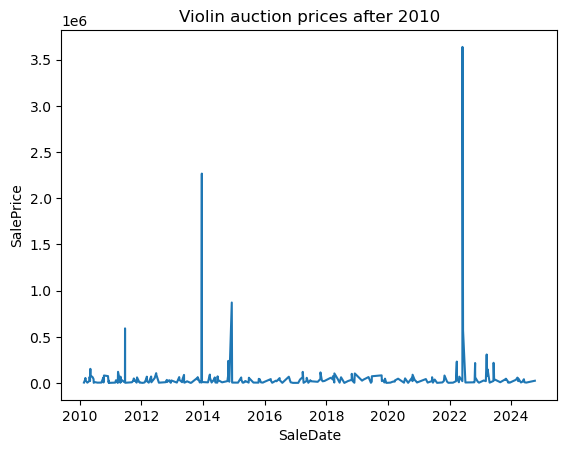

In [126]:
sns.lineplot(x = 'SaleDate', y = 'SalePrice', data = violins_2010, errorbar=None).set_title('Violin auction prices after 2010')
plt.show()

# Price Ranges
[Return to Table of Contents](#Contents)

In [175]:
f = Tarisio[Tarisio['Maker']=='Stradivari, Antonio']
f[f['Year']==1909]

Instrument   SaleDate  SalePrice       AuctionHouse AuctionCity  \
46512     Violin 1909-12-08       2738  Puttick & Simpson         NaN   
46513     Violin 1909-05-12       4405  Puttick & Simpson         NaN   

       MakerID                Maker     City Country  Year  
46512      722  Stradivari, Antonio  Cremona   Italy  1909  
46513      722  Stradivari, Antonio  Cremona   Italy  1909

In [171]:
# Look at extreme outliers
violins = Tarisio[Tarisio['Instrument']=='Violin']

violins_above_million = violins[violins['SalePrice'] >= 1000000]
print(len(violins_above_million))
violins_above_million.sort_values(by='SaleDate')#,ascending=False)

36


Instrument   SaleDate  SalePrice          AuctionHouse AuctionCity  \
19410     Violin 1988-11-23    1050764             Sotheby's     Cremona   
46413     Violin 1990-11-21    1775587            Christie's     Cremona   
46402     Violin 1998-02-03    1017862                 Tajan     Cremona   
46401     Violin 1998-04-01    1586115            Christie's     Cremona   
46399     Violin 1998-11-09    1360222            Bongartz's         NaN   
46397     Violin 2000-05-05    1326000            Christie's     Cremona   
46394     Violin 2001-11-13    1147509             Sotheby's     Cremona   
46392     Violin 2003-11-11    1279076             Sotheby's     Cremona   
46391     Violin 2005-04-22    2032000            Christie's     Cremona   
4069      Violin 2005-11-01    1001384             Sotheby's     Cremona   
46390     Violin 2006-05-16    3544000            Christie's         NaN   
46389     Violin 2006-10-15    1436000               Skinner     Cremona   
46388     Violin 2007-04-02    2728000            Christie's     Cremona   
46387     Violin 2008-04-04    1273000            Christie's     Cremona   
46386     Violin 2010-10-15    3600000               Tarisio     Cremona   
46384     Violin 2011-06-22   15821285               Tarisio     Cremona   
19206     Violin 2011-11-11    1080000               Tarisio       Turin   
46383     Violin 2012-04-27    2592000               Tarisio     Cremona   
19405     Violin 2012-06-25    2333175               Tarisio     Cremona   
19203     Violin 2013-10-16    1390000               Tarisio       Turin   
46382     Violin 2013-12-18    2266663               Tarisio     Cremona   
46381     Violin 2014-10-28    2764767  J & A Beare Auctions     Cremona   
19202     Violin 2014-10-28    1178475  J & A Beare Auctions       Turin   
19199     Violin 2016-10-14    1253000               Tarisio       Milan   
19197     Violin 2017-03-27    1019895               Tarisio       Turin   
46380     Violin 2017-03-28    2410310       Ingles & Hayday     Cremona   
19195     Violin 2018-02-22    1253000               Tarisio       Turin   
19194     Violin 2018-06-25    2106933               Tarisio       Turin   
19192     Violin 2019-05-17    1160000               Tarisio       Milan   
19187     Violin 2021-11-02    1062767                   NaN    Piacenza   
19404     Violin 2022-06-03    3637892                   NaN     Cremona   
46379     Violin 2022-06-10   15340000                   NaN     Cremona   
19403     Violin 2023-03-17    9440000                   NaN     Cremona   
46376     Violin 2023-03-28    2215565                   NaN     Cremona   
46377     Violin 2023-03-28    1452426                   NaN     Cremona   
46375     Violin 2023-06-09    5900000                   NaN     Cremona   

       MakerID                                     Maker     City Country  \
19410      240  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy   
46413      722                       Stradivari, Antonio  Cremona   Italy   
46402      722                       Stradivari, Antonio  Cremona   Italy   
46401      722                       Stradivari, Antonio  Cremona   Italy   
46399      722                       Stradivari, Antonio  Cremona   Italy   
46397      722                       Stradivari, Antonio  Cremona   Italy   
46394      722                       Stradivari, Antonio  Cremona   Italy   
46392      722                       Stradivari, Antonio  Cremona   Italy   
46391      722                       Stradivari, Antonio  Cremona   Italy   
4069        59                         Bergonzi, Carlo I  Cremona   Italy   
46390      722                       Stradivari, Antonio  Cremona   Italy   
46389      722                       Stradivari, Antonio  Cremona   Italy   
46388      722                       Stradivari, Antonio  Cremona   Italy   
46387      722                       Stradivari, Antonio  Cremona   Italy   
46386      722                       S

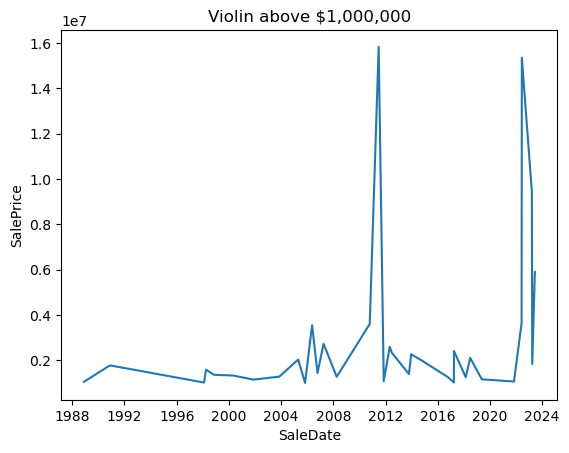

In [131]:
sns.lineplot(x = 'SaleDate', y = 'SalePrice', data = violins_above_million, errorbar=None).set_title('Violin above $1,000,000')
plt.show()

In [133]:
# Violins since 2010 between $500,000 and $1,000,000
print(len(violins_2010[(violins_2010['SalePrice'] > 500000) & (violins_2010['SalePrice'] <= 1000000)]))
violins_2010[(violins_2010['SalePrice'] > 500000) & (violins_2010['SalePrice'] <= 1000000)]

30


Instrument   SaleDate  SalePrice     AuctionHouse AuctionCity  \
309       Violin 2018-10-30     917453  Ingles & Hayday     Cremona   
311       Violin 2013-10-30     507436          Tarisio     Cremona   
326       Violin 2013-05-21     654588  Ingles & Hayday     Cremona   
328       Violin 2010-10-15     576000          Tarisio     Cremona   
1292      Violin 2015-03-30     621575  Ingles & Hayday      Mantua   
11207     Violin 2024-03-15     750000              NaN       Milan   
11209     Violin 2023-10-24     732193              NaN    Piacenza   
11210     Violin 2022-11-01     853226              NaN    Piacenza   
11213     Violin 2021-11-19     540000              NaN       Milan   
11226     Violin 2013-05-03     716000          Tarisio       Milan   
11228     Violin 2011-05-06     755200          Tarisio       Turin   
11229     Violin 2011-04-29     782500       Christie's         NaN   
11230     Violin 2010-04-28     542500       Christie's       Milan   
11349     Violin 2014-10-28     542297  Ingles & Hayday     Cremona   
11434     Violin 2022-04-26     800592              NaN     Cremona   
11436     Violin 2019-10-19     654237  Ingles & Hayday     Cremona   
11437     Violin 2018-03-19     693348          Tarisio     Cremona   
11438     Violin 2014-12-08     870870   Vichy-Enchères     Cremona   
11471     Violin 2023-03-28     561276              NaN      Mantua   
11472     Violin 2020-10-18     892685       Brompton's      Mantua   
11510     Violin 2023-06-06     773574              NaN      Venice   
11511     Violin 2022-11-18     531000              NaN      Venice   
11512     Violin 2017-10-24     662851  Ingles & Hayday      Venice   
16568     Violin 2010-06-14     903924       Brompton's         NaN   
19008     Violin 2019-10-21     527020       Brompton's       Turin   
19827     Violin 2011-10-04     519004        Sotheby's         NaN   
20355     Violin 2011-10-03     502320       Brompton's         NaN   
21893     Violin 2017-03-27     664821       Brompton's     Cremona   
21894     Violin 2017-03-28     542320  Ingles & Hayday     Cremona   
23926     Violin 2021-06-08     542369  Ingles & Hayday       Paris   

                                     Maker       City Country  Year  
309                     Amati, Girolamo II    Cremona   Italy  2018  
311                     Amati, Girolamo II    Cremona   Italy  2013  
326                          Amati, Nicolò    Cremona   Italy  2013  
328                          Amati, Nicolò    Cremona   Italy  2010  
1292                  Balestrieri, Tommaso    Cremona   Italy  2015  
11207        Guadagnini, Giovanni Battista       Como   Italy  2024  
11209        Guadagnini, Giovanni Battista       Como   Italy  2023  
11210        Guadagnini, Giovanni Battista       Como   Italy  2022  
11213        Guadagnini, Giovanni Battista       Como   Italy  2021  
11226        Guadagnini, Giovanni Battista       Como   Italy  2013  
11228        Guadagnini, Giovanni Battista       Como   Italy  2011  
11229        Guadagnini, Giovanni Battista       Como   Italy  2011  
11230        Guadagnini, Giovanni Battista       Como   Italy  2010  
11349                     Guarneri, Andrea    Cremona   Italy  2014  
11434  Guarneri, Giuseppe 'filius Andreae'    Cremona   Italy  2022  
11436  Guarneri, Giuseppe 'filius Andreae'    Cremona   Italy  2019  
11437  Guarneri, Giuseppe 'filius Andreae'    Cremona   Italy  2018  
11438  Guarneri, Giuseppe 'filius Andreae'    Cremona   Italy  2014  
11471           Guarneri, Pietro of Mantua    Cremona   Italy  2023  
11472           Guarneri, Pietro of Mantua    Cremona   Italy  2020  
11510           Guarneri, Pietro of Venice    Cremona   Italy  2023  
11511           Guarneri, Pietro of Venice    Cremona   Italy  2022  
11512           Guarneri, Pietro of Venice    Cremona   Italy  2017  
16568                 Montagnana, Domenico     Venice   Italy  2010  
19008        Pressenda, Giovanni Francesco      Turin 

In [135]:
# Violins between $250,000 and $500,000 since 2010
print(len(violins_2010[(violins_2010['SalePrice'] > 250000) & (violins_2010['SalePrice'] <= 500000)]))
violins_2010[(violins_2010['SalePrice'] > 250000) & (violins_2010['SalePrice'] <= 500000)]

109


Instrument   SaleDate  SalePrice     AuctionHouse AuctionCity  \
257       Violin 2023-06-06     327282              NaN     Cremona   
260       Violin 2023-10-31     320432              NaN     Cremona   
268       Violin 2011-11-11     447200          Tarisio     Cremona   
308       Violin 2023-03-23     369426              NaN     Cremona   
310       Violin 2015-10-24     405500          Tarisio     Cremona   
...          ...        ...        ...              ...         ...   
23942     Violin 2019-05-17     258600          Tarisio       Paris   
23944     Violin 2018-12-05     322932   Vichy-Enchères         NaN   
23950     Violin 2018-03-20     252191  Ingles & Hayday       Paris   
23965     Violin 2015-11-04     251563          Tarisio       Paris   
23981     Violin 2013-10-30     262275          Tarisio       Paris   

                           Maker       City Country  Year  
257                Amati, Andrea    Cremona   Italy  2023  
260    Amati, Antonio & Girolamo    Cremona   Italy  2023  
268    Amati, Antonio & Girolamo    Cremona   Italy  2011  
308           Amati, Girolamo II    Cremona   Italy  2023  
310           Amati, Girolamo II    Cremona   Italy  2015  
...                          ...        ...     ...   ...  
23942   Vuillaume, Jean-Baptiste  Mirecourt  France  2019  
23944   Vuillaume, Jean-Baptiste  Mirecourt  France  2018  
23950   Vuillaume, Jean-Baptiste  Mirecourt  France  2018  
23965   Vuillaume, Jean-Baptiste  Mirecourt  France  2015  
23981   Vuillaume, Jean-Baptiste  Mirecourt  France  2013  

[109 rows x 9 columns]

In [137]:
# Violins between $100,000 and $250,000 since 2010
violins_2010[(violins_2010['SalePrice'] > 100000) & (violins_2010['SalePrice'] <= 250000)]

Instrument   SaleDate  SalePrice     AuctionHouse   AuctionCity  \
262       Violin 2020-10-20     202327  Ingles & Hayday       Cremona   
263       Violin 2019-03-18     190660       Brompton's       Cremona   
264       Violin 2017-11-09     106200          Tarisio       Cremona   
266       Violin 2015-06-30     242999          Tarisio       Cremona   
269       Violin 2011-06-09     114090   Vichy-Enchères           NaN   
...          ...        ...        ...              ...           ...   
24004     Violin 2010-03-09     145904        Sotheby's           NaN   
25255     Violin 2019-03-01     132000          Tarisio  New York, NY   
25256     Violin 2016-02-26     102000          Tarisio  New York, NY   
25257     Violin 2015-10-24     102000          Tarisio  New York, NY   
25260     Violin 2012-04-27     108000          Tarisio  Brooklyn, NY   

                           Maker          City Country  Year  
262    Amati, Antonio & Girolamo       Cremona   Italy  2020  
263    Amati, Antonio & Girolamo       Cremona   Italy  2019  
264    Amati, Antonio & Girolamo       Cremona   Italy  2017  
266    Amati, Antonio & Girolamo       Cremona   Italy  2015  
269    Amati, Antonio & Girolamo       Cremona   Italy  2011  
...                          ...           ...     ...   ...  
24004   Vuillaume, Jean-Baptiste     Mirecourt  France  2010  
25255       Zygmuntowicz, Samuel  Brooklyn, NY      US  2019  
25256       Zygmuntowicz, Samuel  Brooklyn, NY      US  2016  
25257       Zygmuntowicz, Samuel  Brooklyn, NY      US  2015  
25260       Zygmuntowicz, Samuel  Brooklyn, NY      US  2012  

[363 rows x 9 columns]

# Maker Trends
Looking at violins by specific makers

[Return to Table of Contents](#Contents)

### Strads

In [140]:
# Find a single violin maker
Strads = violins[violins['Maker'].str.contains('Strad')]
Strads

Instrument   SaleDate  SalePrice     AuctionHouse AuctionCity  \
21948     Violin 2023-06-09    5900000              NaN     Cremona   
21949     Violin 2023-03-28    2215565              NaN     Cremona   
21950     Violin 2023-03-28    1452426              NaN     Cremona   
21951     Violin 2022-06-10   15340000              NaN     Cremona   
21952     Violin 2017-03-28    2410310  Ingles & Hayday     Cremona   
...          ...        ...        ...              ...         ...   
22115     Violin 1974-04-25      36045        Sotheby's         NaN   
22116     Violin 2016-05-13     156000          Tarisio     Cremona   
22117     Violin 2005-11-04     370000          Tarisio     Cremona   
22118     Violin 1976-05-06      28059        Sotheby's         NaN   
22119     Violin 1968-07-19      14824        Sotheby's         NaN   

                            Maker     City Country  
21948         Stradivari, Antonio  Cremona   Italy  
21949         Stradivari, Antonio  Cremona   Italy  
21950         Stradivari, Antonio  Cremona   Italy  
21951         Stradivari, Antonio  Cremona   Italy  
21952         Stradivari, Antonio  Cremona   Italy  
...                           ...      ...     ...  
22115       Stradivari, Francesco  Cremona   Italy  
22116  Stradivari, Omobono Felice  Cremona   Italy  
22117  Stradivari, Omobono Felice  Cremona   Italy  
22118  Stradivari, Omobono Felice  Cremona   Italy  
22119  Stradivari, Omobono Felice  Cremona   Italy  

[172 rows x 8 columns]

### Strads_Antonio

In [142]:
# Find a single violin maker
Strads_Antonio = violins[(violins['Maker'].str.contains('Strad')) & (violins['Maker'].str.contains('Antonio'))]
Strads_Antonio

Instrument   SaleDate  SalePrice       AuctionHouse AuctionCity  \
21948     Violin 2023-06-09    5900000                NaN     Cremona   
21949     Violin 2023-03-28    2215565                NaN     Cremona   
21950     Violin 2023-03-28    1452426                NaN     Cremona   
21951     Violin 2022-06-10   15340000                NaN     Cremona   
21952     Violin 2017-03-28    2410310    Ingles & Hayday     Cremona   
...          ...        ...        ...                ...         ...   
22109     Violin 1862-06-26        853  Puttick & Simpson         NaN   
22110     Violin 1857-02-18        973  Christie & Manson         NaN   
22111     Violin 1853-05-28        606  Puttick & Simpson         NaN   
22112     Violin 1850-11-28        588  Puttick & Simpson         NaN   
22113     Violin 1850-11-28        715  Puttick & Simpson         NaN   

                     Maker     City Country  
21948  Stradivari, Antonio  Cremona   Italy  
21949  Stradivari, Antonio  Cremona   Italy  
21950  Stradivari, Antonio  Cremona   Italy  
21951  Stradivari, Antonio  Cremona   Italy  
21952  Stradivari, Antonio  Cremona   Italy  
...                    ...      ...     ...  
22109  Stradivari, Antonio  Cremona   Italy  
22110  Stradivari, Antonio  Cremona   Italy  
22111  Stradivari, Antonio  Cremona   Italy  
22112  Stradivari, Antonio  Cremona   Italy  
22113  Stradivari, Antonio  Cremona   Italy  

[166 rows x 8 columns]

In [144]:
Strads_Antonio.sort_values(by=['SalePrice'], ascending=False)

Instrument   SaleDate  SalePrice       AuctionHouse AuctionCity  \
21956     Violin 2011-06-22   15821285            Tarisio     Cremona   
21951     Violin 2022-06-10   15340000                NaN     Cremona   
21948     Violin 2023-06-09    5900000                NaN     Cremona   
21958     Violin 2010-10-15    3600000            Tarisio     Cremona   
21962     Violin 2006-05-16    3544000         Christie's         NaN   
...          ...        ...        ...                ...         ...   
22112     Violin 1850-11-28        588  Puttick & Simpson         NaN   
22102     Violin 1872-04-29        548         Christie's         NaN   
22103     Violin 1872-04-29        416         Christie's         NaN   
22108     Violin 1862-06-26        354  Puttick & Simpson         NaN   
22099     Violin 1877-05-29        347  Puttick & Simpson         NaN   

                     Maker     City Country  
21956  Stradivari, Antonio  Cremona   Italy  
21951  Stradivari, Antonio  Cremona   Italy  
21948  Stradivari, Antonio  Cremona   Italy  
21958  Stradivari, Antonio  Cremona   Italy  
21962  Stradivari, Antonio  Cremona   Italy  
...                    ...      ...     ...  
22112  Stradivari, Antonio  Cremona   Italy  
22102  Stradivari, Antonio  Cremona   Italy  
22103  Stradivari, Antonio  Cremona   Italy  
22108  Stradivari, Antonio  Cremona   Italy  
22099  Stradivari, Antonio  Cremona   Italy  

[166 rows x 8 columns]

In [146]:
Strads_Antonio['SaleDate'].min()

Timestamp('1850-11-28 00:00:00')

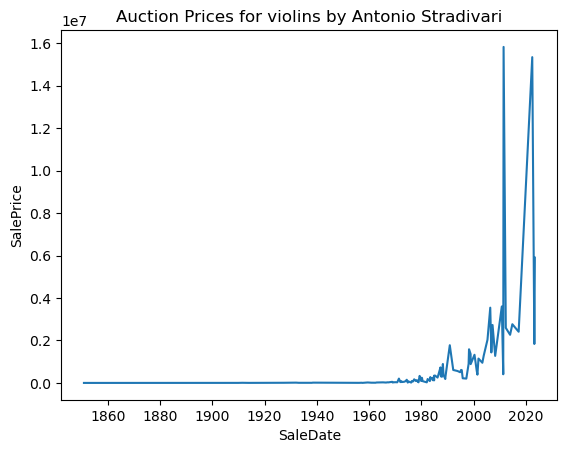

In [148]:
sns.lineplot(x = 'SaleDate', y = 'SalePrice', data = Strads_Antonio, errorbar=None).set_title('Auction Prices for violins by Antonio Stradivari')
plt.show()

In [150]:
# Add a field, 'Year', to violins dataframe
violins['Year'] = violins['SaleDate'].dt.year
violins.head()

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity            Maker  \
0     Violin 2010-02-20       4200      Tarisio     Wallgau  Achner, Michael   
1     Violin 1987-04-27       2838   Bongartz's  Mittenwald  Achner, Michael   
2     Violin 2018-05-17      24000      Tarisio  Mittenwald   Achner, Philip   
3     Violin 2008-11-15       3884   Bongartz's         NaN   Achner, Philip   
4     Violin 1990-03-27       2146    Sotheby's  Mittenwald   Achner, Philip   

         City  Country  Year  
0  Mittenwald  Germany  2010  
1  Mittenwald  Germany  1987  
2  Mittenwald  Germany  2018  
3  Mittenwald  Germany  2008  
4  Mittenwald  Germany  1990

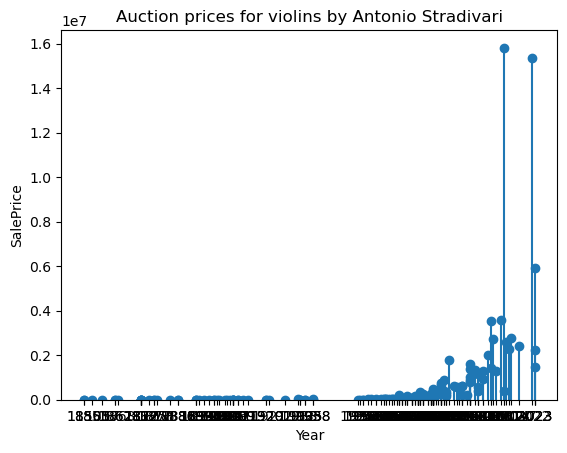

In [152]:
# importing modules 
from pandas import *
import matplotlib.pyplot as plt 

# Maker data
Strads_Antonio = violins[(violins['Maker'].str.contains('Strad')) & (violins['Maker'].str.contains('Antonio'))]

# creating an empty chart 
fig, axes = plt.subplots() 

# plotting using plt.stem 
axes.stem(Strads_Antonio['Year'], Strads_Antonio['SalePrice'], basefmt=' ') 

# starting value of y-axis 
axes.set_ylim(0) 

# details and formatting of chart 
plt.title('Auction prices for violins by Antonio Stradivari') 
plt.xlabel('Year') 
plt.ylabel('SalePrice') 
plt.xticks(Strads_Antonio['Year']) 

plt.show()

In [158]:
violins_above_million.sort_values('SalePrice', ascending=False)

Instrument   SaleDate  SalePrice          AuctionHouse AuctionCity  \
21956     Violin 2011-06-22   15821285               Tarisio     Cremona   
21951     Violin 2022-06-10   15340000                   NaN     Cremona   
11402     Violin 2023-03-17    9440000                   NaN     Cremona   
21948     Violin 2023-06-09    5900000                   NaN     Cremona   
11403     Violin 2022-06-03    3637892                   NaN     Cremona   
21958     Violin 2010-10-15    3600000               Tarisio     Cremona   
21962     Violin 2006-05-16    3544000            Christie's         NaN   
21953     Violin 2014-10-28    2764767  J & A Beare Auctions     Cremona   
21960     Violin 2007-04-02    2728000            Christie's     Cremona   
21955     Violin 2012-04-27    2592000               Tarisio     Cremona   
21952     Violin 2017-03-28    2410310       Ingles & Hayday     Cremona   
11404     Violin 2012-06-25    2333175               Tarisio     Cremona   
21954     Violin 2013-12-18    2266663               Tarisio     Cremona   
21949     Violin 2023-03-28    2215565                   NaN     Cremona   
11217     Violin 2018-06-25    2106933               Tarisio       Turin   
21963     Violin 2005-04-22    2032000            Christie's     Cremona   
21982     Violin 1990-11-21    1775587            Christie's     Cremona   
21972     Violin 1998-04-01    1586115            Christie's     Cremona   
21950     Violin 2023-03-28    1452426                   NaN     Cremona   
21961     Violin 2006-10-15    1436000               Skinner     Cremona   
11225     Violin 2013-10-16    1390000               Tarisio       Turin   
21970     Violin 1998-11-09    1360222            Bongartz's         NaN   
21969     Violin 2000-05-05    1326000            Christie's     Cremona   
21964     Violin 2003-11-11    1279076             Sotheby's     Cremona   
21959     Violin 2008-04-04    1273000            Christie's     Cremona   
11222     Violin 2016-10-14    1253000               Tarisio       Milan   
11218     Violin 2018-02-22    1253000               Tarisio       Turin   
11224     Violin 2014-10-28    1178475  J & A Beare Auctions       Turin   
11216     Violin 2019-05-17    1160000               Tarisio       Milan   
21966     Violin 2001-11-13    1147509             Sotheby's     Cremona   
11227     Violin 2011-11-11    1080000               Tarisio       Turin   
11211     Violin 2021-11-02    1062767                   NaN    Piacenza   
11409     Violin 1988-11-23    1050764             Sotheby's     Cremona   
11220     Violin 2017-03-27    1019895               Tarisio       Turin   
21973     Violin 1998-02-03    1017862                 Tajan     Cremona   
1961      Violin 2005-11-01    1001384             Sotheby's     Cremona   

                                          Maker     City Country  
21956                       Stradivari, Antonio  Cremona   Italy  
21951                       Stradivari, Antonio  Cremona   Italy  
11402  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  
21948                       Stradivari, Antonio  Cremona   Italy  
11403  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  
21958                       Stradivari, Antonio  Cremona   Italy  
21962                       Stradivari, Antonio  Cremona   Italy  
21953                       Stradivari, Antonio  Cremona   Italy  
21960                       Stradivari, Antonio  Cremona   Italy  
21955                       Stradivari, Antonio  Cremona   Italy  
21952                       Stradivari, Antonio  Cremona   Italy  
11404  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  
21954                       Stradivari, Antonio  Cremona   Italy  
21949                       Stradivari, Antonio  Cremona   Italy  
11217             Guadagnini, Giovanni Battista     Como   Italy  
21963                       Stradivari, Antonio  Cremona   Italy  
21982                       Stradivari, Antonio  Cremo

In [162]:
# How many violins auctioned above $1 million?
len(violins_above_million)

36

In [164]:
violins_above_million.count()

Instrument      36
SaleDate        36
SalePrice       36
AuctionHouse    29
AuctionCity     34
Maker           36
City            36
Country         36
dtype: int64

In [166]:
# How many unique makers are above $1 million dollars? 
violins_above_million.groupby('Maker').count()

Instrument  SaleDate  SalePrice  \
Maker                                                                       
Bergonzi, Carlo I                                  1         1          1   
Guadagnini, Giovanni Battista                      9         9          9   
Guarneri, Bartolomeo Giuseppe 'del Gesù'           4         4          4   
Stradivari, Antonio                               22        22         22   

                                          AuctionHouse  AuctionCity  City  \
Maker                                                                       
Bergonzi, Carlo I                                    1            1     1   
Guadagnini, Giovanni Battista                        8            9     9   
Guarneri, Bartolomeo Giuseppe 'del Gesù'             2            4     4   
Stradivari, Antonio                                 18           20    22   

                                          Country  
Maker                                              
Bergonzi, Carlo I                               1  
Guadagnini, Giovanni Battista                   9  
Guarneri, Bartolomeo Giuseppe 'del Gesù'        4  
Stradivari, Antonio                            22

In [168]:
# What are their highest sale prices?
violins_above_million.groupby('Maker').SalePrice.max()

Maker
Bergonzi, Carlo I                            1001384
Guadagnini, Giovanni Battista                2106933
Guarneri, Bartolomeo Giuseppe 'del Gesù'     9440000
Stradivari, Antonio                         15821285
Name: SalePrice, dtype: int64

In [170]:
# Lowest sale prices? 
violins_above_million.groupby('Maker').SalePrice.min()

Maker
Bergonzi, Carlo I                           1001384
Guadagnini, Giovanni Battista               1019895
Guarneri, Bartolomeo Giuseppe 'del Gesù'    1050764
Stradivari, Antonio                         1017862
Name: SalePrice, dtype: int64

In [172]:
# When did the first violin fetch more than $1 million at auction?
violins_above_million['SaleDate'].min()

Timestamp('1988-11-23 00:00:00')

In [174]:
# What instrument? 
violins_above_million.loc[violins_above_million['SaleDate'] == '1988-11-23']

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity  \
11409     Violin 1988-11-23    1050764    Sotheby's     Cremona   

                                          Maker     City Country  
11409  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy

In [176]:
violins_above_million.sort_values('SaleDate')

Instrument   SaleDate  SalePrice          AuctionHouse AuctionCity  \
11409     Violin 1988-11-23    1050764             Sotheby's     Cremona   
21982     Violin 1990-11-21    1775587            Christie's     Cremona   
21973     Violin 1998-02-03    1017862                 Tajan     Cremona   
21972     Violin 1998-04-01    1586115            Christie's     Cremona   
21970     Violin 1998-11-09    1360222            Bongartz's         NaN   
21969     Violin 2000-05-05    1326000            Christie's     Cremona   
21966     Violin 2001-11-13    1147509             Sotheby's     Cremona   
21964     Violin 2003-11-11    1279076             Sotheby's     Cremona   
21963     Violin 2005-04-22    2032000            Christie's     Cremona   
1961      Violin 2005-11-01    1001384             Sotheby's     Cremona   
21962     Violin 2006-05-16    3544000            Christie's         NaN   
21961     Violin 2006-10-15    1436000               Skinner     Cremona   
21960     Violin 2007-04-02    2728000            Christie's     Cremona   
21959     Violin 2008-04-04    1273000            Christie's     Cremona   
21958     Violin 2010-10-15    3600000               Tarisio     Cremona   
21956     Violin 2011-06-22   15821285               Tarisio     Cremona   
11227     Violin 2011-11-11    1080000               Tarisio       Turin   
21955     Violin 2012-04-27    2592000               Tarisio     Cremona   
11404     Violin 2012-06-25    2333175               Tarisio     Cremona   
11225     Violin 2013-10-16    1390000               Tarisio       Turin   
21954     Violin 2013-12-18    2266663               Tarisio     Cremona   
21953     Violin 2014-10-28    2764767  J & A Beare Auctions     Cremona   
11224     Violin 2014-10-28    1178475  J & A Beare Auctions       Turin   
11222     Violin 2016-10-14    1253000               Tarisio       Milan   
11220     Violin 2017-03-27    1019895               Tarisio       Turin   
21952     Violin 2017-03-28    2410310       Ingles & Hayday     Cremona   
11218     Violin 2018-02-22    1253000               Tarisio       Turin   
11217     Violin 2018-06-25    2106933               Tarisio       Turin   
11216     Violin 2019-05-17    1160000               Tarisio       Milan   
11211     Violin 2021-11-02    1062767                   NaN    Piacenza   
11403     Violin 2022-06-03    3637892                   NaN     Cremona   
21951     Violin 2022-06-10   15340000                   NaN     Cremona   
11402     Violin 2023-03-17    9440000                   NaN     Cremona   
21949     Violin 2023-03-28    2215565                   NaN     Cremona   
21950     Violin 2023-03-28    1452426                   NaN     Cremona   
21948     Violin 2023-06-09    5900000                   NaN     Cremona   

                                          Maker     City Country  
11409  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  
21982                       Stradivari, Antonio  Cremona   Italy  
21973                       Stradivari, Antonio  Cremona   Italy  
21972                       Stradivari, Antonio  Cremona   Italy  
21970                       Stradivari, Antonio  Cremona   Italy  
21969                       Stradivari, Antonio  Cremona   Italy  
21966                       Stradivari, Antonio  Cremona   Italy  
21964                       Stradivari, Antonio  Cremona   Italy  
21963                       Stradivari, Antonio  Cremona   Italy  
1961                          Bergonzi, Carlo I  Cremona   Italy  
21962                       Stradivari, Antonio  Cremona   Italy  
21961                       Stradivari, Antonio  Cremona   Italy  
21960                       Stradivari, Antonio  Cremona   Italy  
21959                       Stradivari, Antonio  Cremona   Italy  
21958                       Stradivari, Antonio  Cremona   Italy  
21956                       Stradivari, Antonio  Cremona   Italy  
11227             Guadagnini, Giovanni Battista     Co

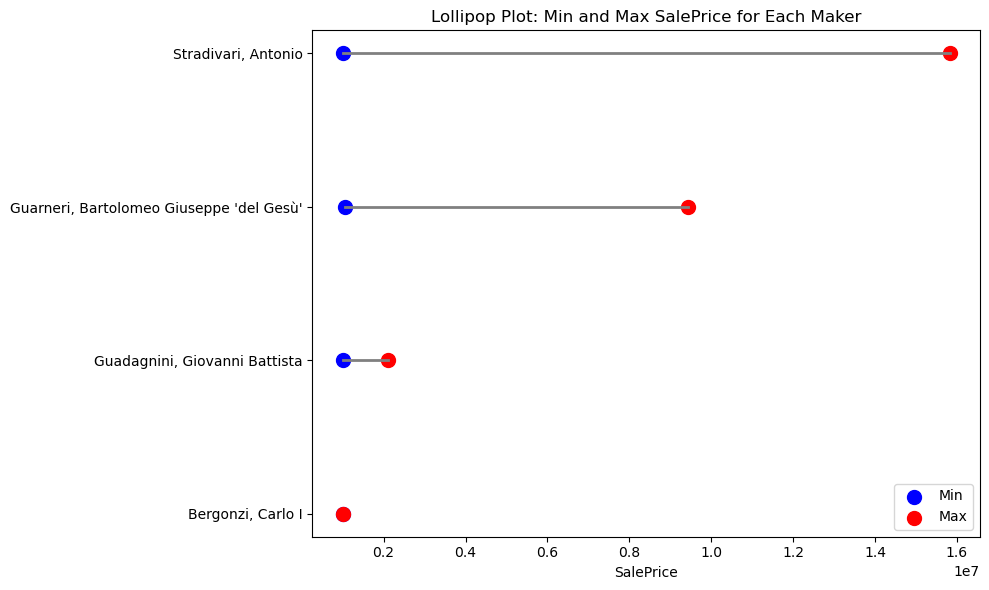

In [178]:
# Data for plot
violins_above_million = violins[violins['SalePrice'] >= 1000000]

# Group by 'Maker' and calculate min and max SalePrice
min_max_prices = violins_above_million.groupby('Maker')['SalePrice'].agg(['min', 'max']).reset_index()

# Plotting a lollipop plot using matplotlib
plt.figure(figsize=(10, 6))

# Loop through each maker to create a lollipop
for idx, row in min_max_prices.iterrows():
    plt.plot([row['min'], row['max']], [idx, idx], color='grey', linewidth=2)  # Line between min and max
    plt.scatter(row['min'], idx, color='blue', s=100, label='Min' if idx == 0 else "")  # Min point
    plt.scatter(row['max'], idx, color='red', s=100, label='Max' if idx == 0 else "")  # Max point

# Customize the plot
plt.yticks(range(len(min_max_prices)), min_max_prices['Maker'])
plt.xlabel('SalePrice')
plt.title('Lollipop Plot: Min and Max SalePrice for Each Maker')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

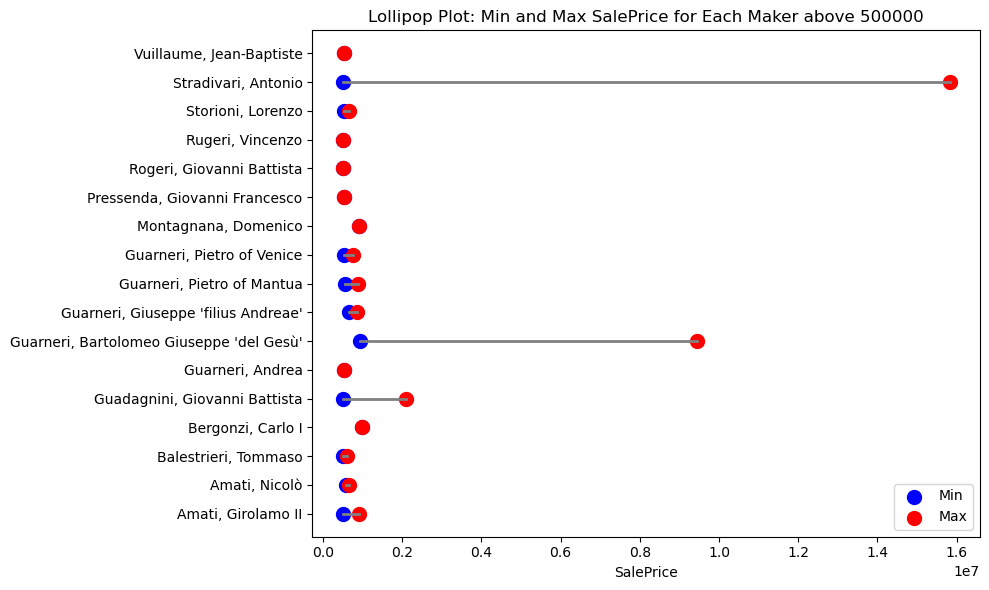

In [180]:
# Data for plot
violins_above = violins[violins['SalePrice'] >= 500000]

# Group by 'Maker' and calculate min and max SalePrice
min_max_prices = violins_above.groupby('Maker')['SalePrice'].agg(['min', 'max']).reset_index()

# Plotting a lollipop plot using matplotlib
plt.figure(figsize=(10, 6))

# Loop through each maker to create a lollipop
for idx, row in min_max_prices.iterrows():
    plt.plot([row['min'], row['max']], [idx, idx], color='grey', linewidth=2)  # Line between min and max
    plt.scatter(row['min'], idx, color='blue', s=100, label='Min' if idx == 0 else "")  # Min point
    plt.scatter(row['max'], idx, color='red', s=100, label='Max' if idx == 0 else "")  # Max point

# Customize the plot
plt.yticks(range(len(min_max_prices)), min_max_prices['Maker'])
plt.xlabel('SalePrice')
plt.title('Lollipop Plot: Min and Max SalePrice for Each Maker above 500000')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

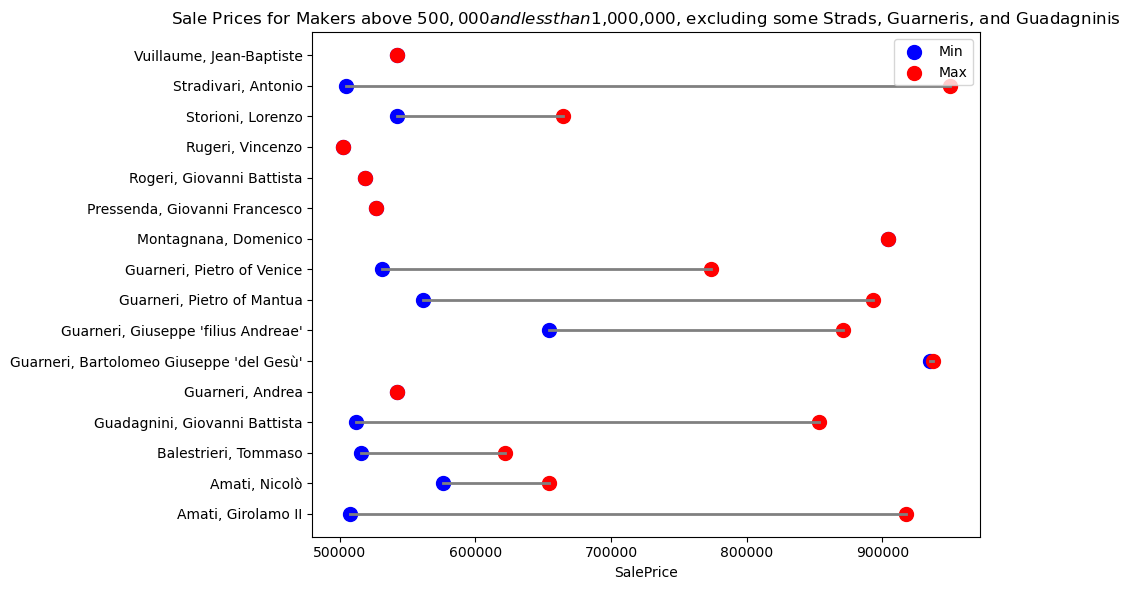

In [182]:
# Remove Strads (Antonio), Guarneris, and Guadagninis
# Violins between $500,000 and $1,000,0000
violins_above = violins[(violins['SalePrice'] >= 500000) & (violins['SalePrice'] < 1000000)]

# Group by 'Maker' and calculate min and max SalePrice
min_max_prices = violins_above.groupby('Maker')['SalePrice'].agg(['min', 'max']).reset_index()

# Plotting a lollipop plot using matplotlib
plt.figure(figsize=(10, 6))

# Loop through each maker to create a lollipop
for idx, row in min_max_prices.iterrows():
    plt.plot([row['min'], row['max']], [idx, idx], color='grey', linewidth=2)  # Line between min and max
    plt.scatter(row['min'], idx, color='blue', s=100, label='Min' if idx == 0 else "")  # Min point
    plt.scatter(row['max'], idx, color='red', s=100, label='Max' if idx == 0 else "")  # Max point

# Customize the plot
plt.yticks(range(len(min_max_prices)), min_max_prices['Maker'])
plt.xlabel('SalePrice')
plt.title('Sale Prices for Makers above $500,000 and less than $1,000,000, excluding some Strads, Guarneris, and Guadagninis')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

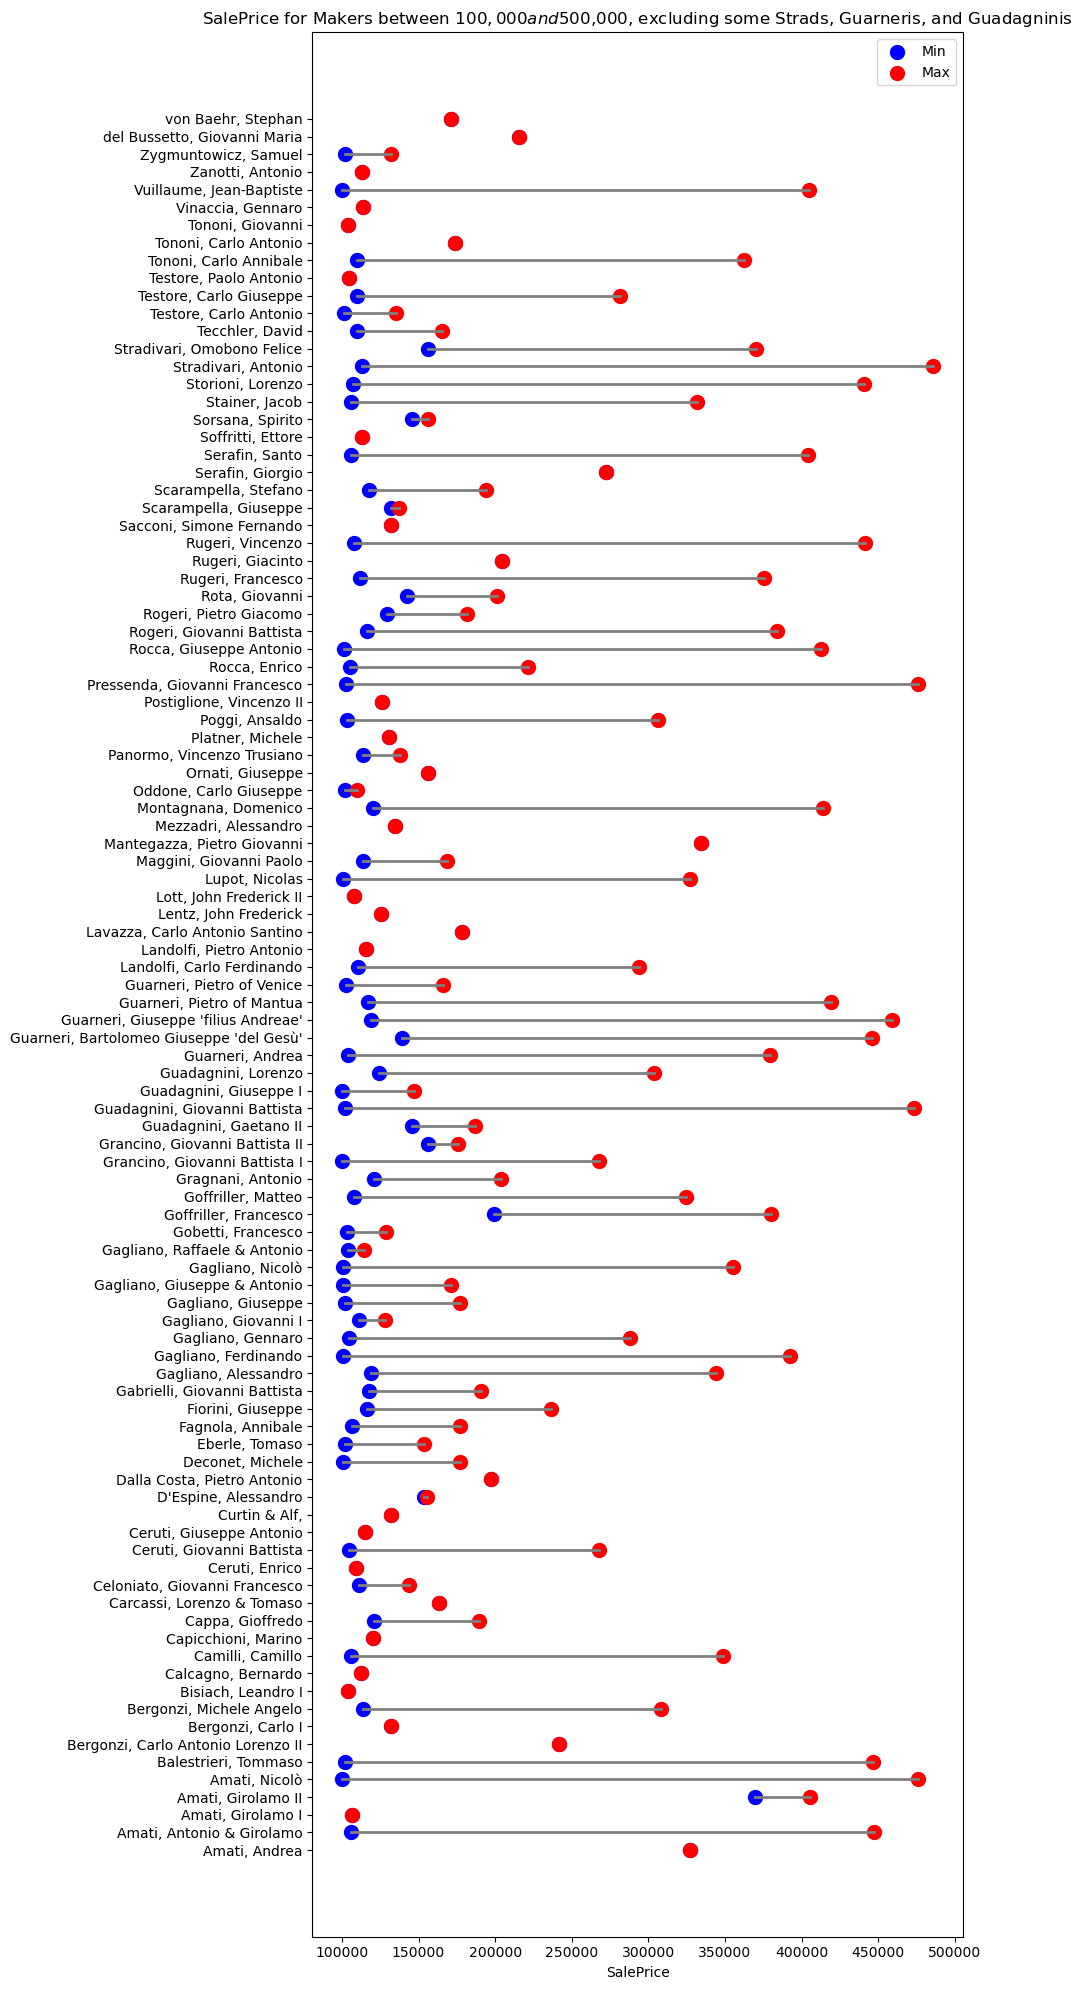

In [184]:
# Consider violins between $100,000 and $500,000, excluding some Strads (Antonio), Guarneris, and Guadagninis
# Violins above $500000
violins_mid = violins[(violins['SalePrice'] >= 100000) & (violins['SalePrice'] < 500000)]

# Group by 'Maker' and calculate min and max SalePrice
min_max_prices = violins_mid.groupby('Maker')['SalePrice'].agg(['min', 'max']).reset_index()

# Plotting a lollipop plot using matplotlib
plt.figure(figsize=(10, 20))

# Loop through each maker to create a lollipop
for idx, row in min_max_prices.iterrows():
    plt.plot([row['min'], row['max']], [idx, idx], color='grey', linewidth=2)  # Line between min and max
    plt.scatter(row['min'], idx, color='blue', s=100, label='Min' if idx == 0 else "")  # Min point
    plt.scatter(row['max'], idx, color='red', s=100, label='Max' if idx == 0 else "")  # Max point

# Customize the plot
plt.yticks(range(len(min_max_prices)), min_max_prices['Maker'])
plt.xlabel('SalePrice')
plt.title('SalePrice for Makers between $100,000 and $500,000, excluding some Strads, Guarneris, and Guadagninis')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

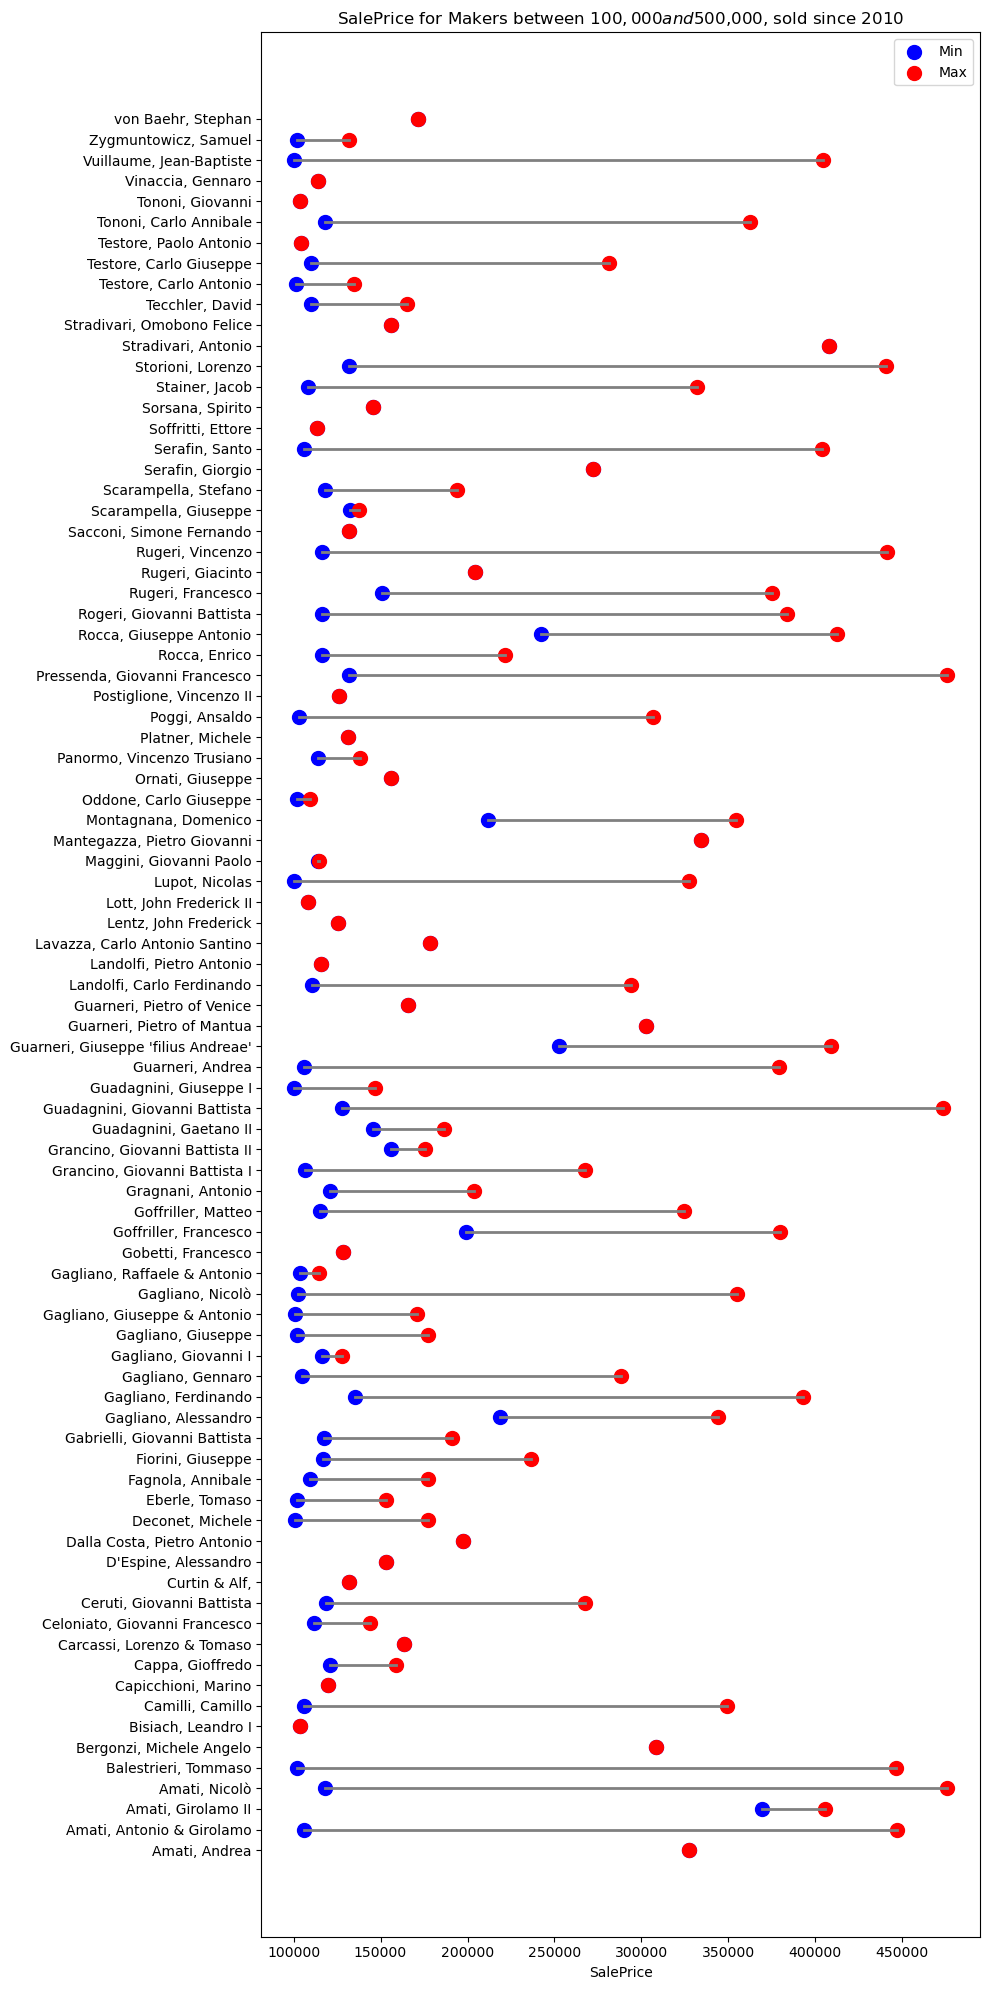

In [185]:
# Consider violins between $100,000 and $500,000, sold since 2010, 
# excluding violins above $1,000,000
vlns = violins_2010[(violins_2010['SalePrice'] >= 100000) & (violins_2010['SalePrice'] < 500000)]

# Group by 'Maker' and calculate min and max SalePrice
min_max_prices = vlns.groupby('Maker')['SalePrice'].agg(['min', 'max']).reset_index()

# Plotting a lollipop plot using matplotlib
plt.figure(figsize=(10, 20))

# Loop through each maker to create a lollipop
for idx, row in min_max_prices.iterrows():
    plt.plot([row['min'], row['max']], [idx, idx], color='grey', linewidth=2)  # Line between min and max
    plt.scatter(row['min'], idx, color='blue', s=100, label='Min' if idx == 0 else "")  # Min point
    plt.scatter(row['max'], idx, color='red', s=100, label='Max' if idx == 0 else "")  # Max point

# Customize the plot
plt.yticks(range(len(min_max_prices)), min_max_prices['Maker'])
plt.xlabel('SalePrice')
plt.title('SalePrice for Makers between $100,000 and $500,000, sold since 2010')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

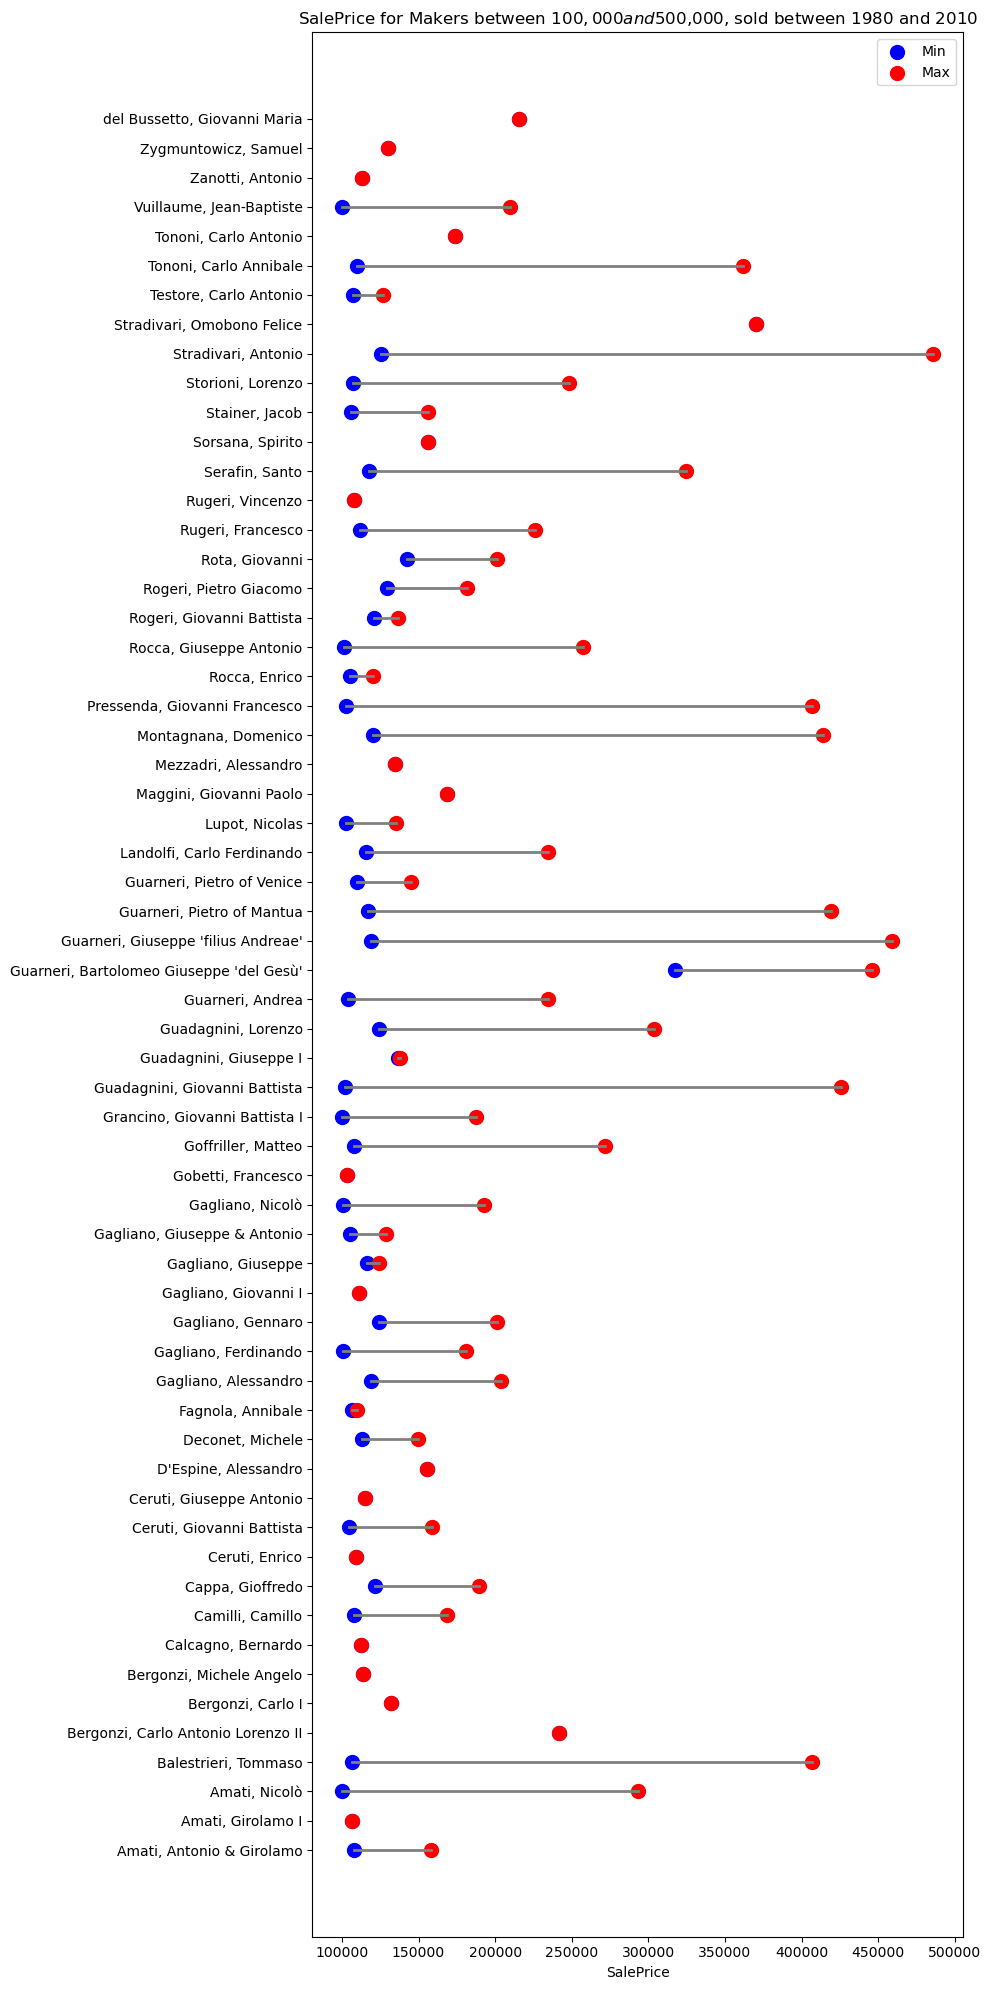

In [187]:
# Consider violins between $100,000 and $500,000, sold since between 1980 and 2010, 
# excluding violins above $1,000,000
vlns = violins_8010[(violins_8010['SalePrice'] >= 100000) & (violins_8010['SalePrice'] < 500000)]

# Group by 'Maker' and calculate min and max SalePrice
min_max_prices = vlns.groupby('Maker')['SalePrice'].agg(['min', 'max']).reset_index()

# Plotting a lollipop plot using matplotlib
plt.figure(figsize=(10, 20))

# Loop through each maker to create a lollipop
for idx, row in min_max_prices.iterrows():
    plt.plot([row['min'], row['max']], [idx, idx], color='grey', linewidth=2)  # Line between min and max
    plt.scatter(row['min'], idx, color='blue', s=100, label='Min' if idx == 0 else "")  # Min point
    plt.scatter(row['max'], idx, color='red', s=100, label='Max' if idx == 0 else "")  # Max point

# Customize the plot
plt.yticks(range(len(min_max_prices)), min_max_prices['Maker'])
plt.xlabel('SalePrice')
plt.title('SalePrice for Makers between $100,000 and $500,000, sold between 1980 and 2010')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

Interactive by decade
Interactive by Maker (select makers)

Also, select instrument (violin, viola, bow, etc)

# Regional Trends
[Return to Table of Contents](#Contents)

In [308]:
by_region = Tarisio.groupby(['Country', 'Maker'])['SalePrice'].sum()
by_region = pd.DataFrame(by_region).reset_index()
by_region

Country               Maker  SalePrice
0           Algeria         Bauer, Jean     124833
1           Algeria      Peyrot, Alfred        583
2         Argentina      Baldoni, Dante      59190
3         Argentina        Bruni, Mateo      30396
4         Argentina   Capalbo, Giovanni       6900
...             ...                 ...        ...
3075  United States      Smart, Winfred       2070
3076  United States  Watson, William D.     440258
3077  United States      Woodward, C.F.       6436
3078        Uruguay    Fulquet, Annibal       6703
3079      Venezuela    Peresson, Sergio     761168

[3080 rows x 3 columns]

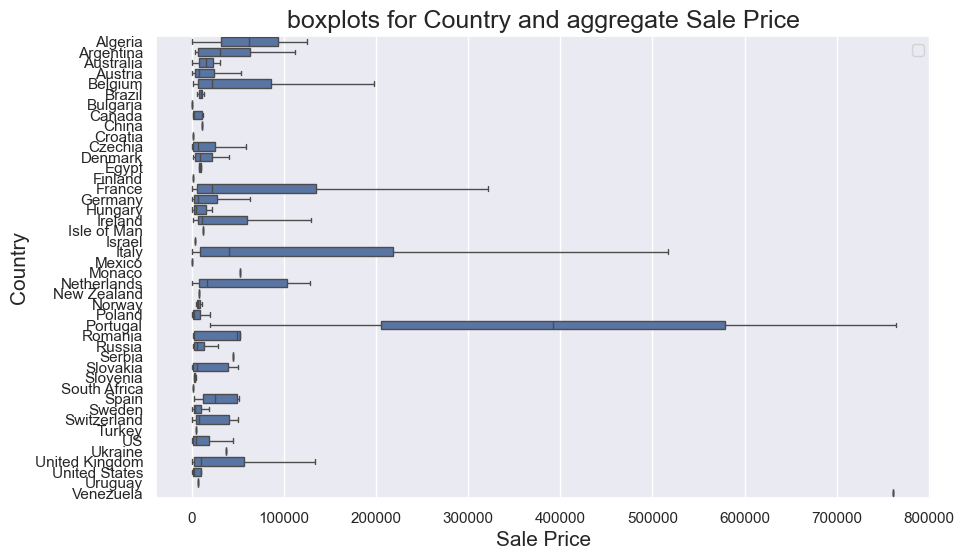

In [935]:
# Look at the aggregate sale prices for all the makers in a give country

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.boxplot(x=by_region['SalePrice'], y=by_region['Country'], showfliers=False)
plt.title('boxplots for Country and aggregate Sale Price', fontsize=18)
plt.ylabel('Country', fontsize=15)
plt.xlabel('Sale Price', fontsize=15)
plt.legend('')

plt.show()

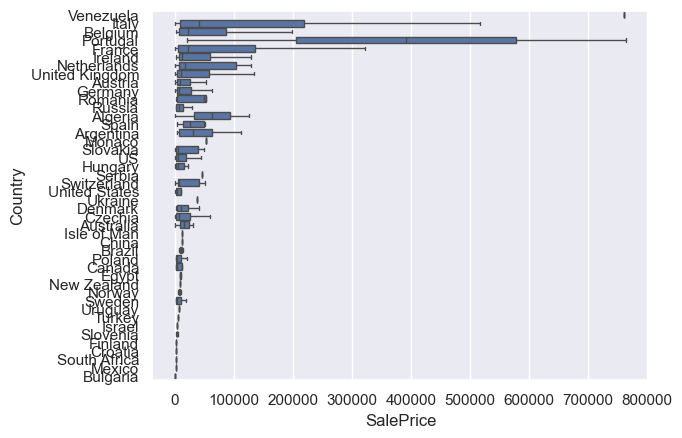

In [937]:
# Look at the mean sale prices for all the makers in a given country. 

# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.set_theme(style="darkgrid")
df = by_region
 
# Using pandas methods and slicing to determine the order by decreasing median
my_order = df.groupby(by=['Country'])['SalePrice'].mean().sort_values().iloc[::-1].index
 
# Specifying the 'order' parameter with my_order and plotting
sns.boxplot(x='SalePrice', y='Country', data=df, order=my_order, showfliers=False)
plt.show()

In [622]:
by_region[by_region['Country'] == 'Venezuela']

Country             Maker  SalePrice
3079  Venezuela  Peresson, Sergio     761168

In [326]:
means = df.groupby('Country')['SalePrice'].mean().rename('Country_mean')
means.sort_values(ascending=False)

Country
Venezuela         761168.000000
Italy             623497.035176
Belgium           497342.234043
Portugal          392087.000000
France            304265.738739
Ireland           249451.846154
Netherlands       163890.935484
United Kingdom    122123.247500
Austria            78897.081633
Germany            75200.186090
Romania            71815.000000
Russia             69615.250000
Algeria            62708.000000
Spain              59663.052632
Argentina          53348.466667
Monaco             52328.000000
Slovakia           51224.750000
US                 50622.324484
Hungary            45080.313725
Serbia             45079.000000
Switzerland        42002.000000
United States      40940.545455
Ukraine            37813.000000
Denmark            35129.388889
Czechia            24422.934211
Australia          15874.500000
Isle of Man        12702.000000
China              11826.000000
Brazil              9930.000000
Poland              9483.692308
Canada              9252.428571


In [328]:
by_region

Country               Maker  SalePrice
0           Algeria         Bauer, Jean     124833
1           Algeria      Peyrot, Alfred        583
2         Argentina      Baldoni, Dante      59190
3         Argentina        Bruni, Mateo      30396
4         Argentina   Capalbo, Giovanni       6900
...             ...                 ...        ...
3075  United States      Smart, Winfred       2070
3076  United States  Watson, William D.     440258
3077  United States      Woodward, C.F.       6436
3078        Uruguay    Fulquet, Annibal       6703
3079      Venezuela    Peresson, Sergio     761168

[3080 rows x 3 columns]

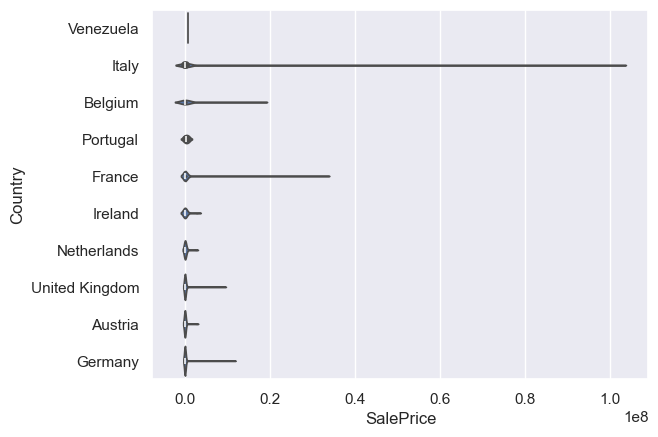

In [630]:
# Look at the top 10 groups from by_region: 10 countries with the top highest sale price means

# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.set_theme(style="darkgrid")
df = by_region
 
# Using pandas methods and slicing to determine the order by decreasing median
my_order = df.groupby(by=['Country'])['SalePrice'].mean().sort_values(ascending=False).iloc[::-1]
top_groups = my_order.nlargest(10).index
 
# Specifying the 'order' parameter with my_order and plotting
sns.violinplot(x='SalePrice', y='Country', data=df, order=top_groups)
plt.show()

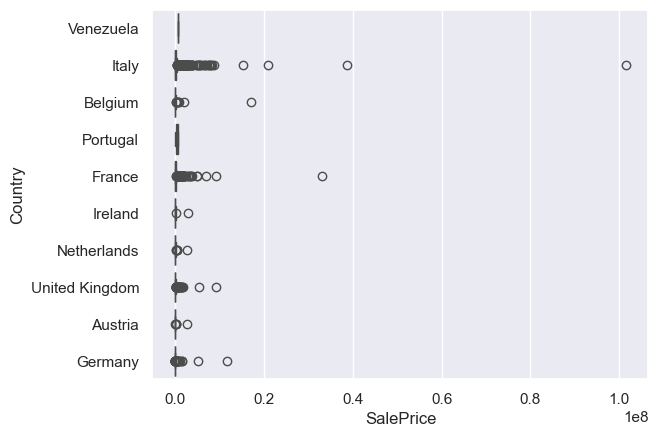

In [356]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.set_theme(style="darkgrid")
df = by_region
 
# Using pandas methods and slicing to determine the order by decreasing median
my_order = df.groupby(by=['Country'])['SalePrice'].mean().sort_values(ascending=False).iloc[::-1]
top_groups = my_order.nlargest(10).index
 
# Specifying the 'order' parameter with my_order and plotting
sns.boxplot(x='SalePrice', y='Country', data=df, order=top_groups)
plt.show()

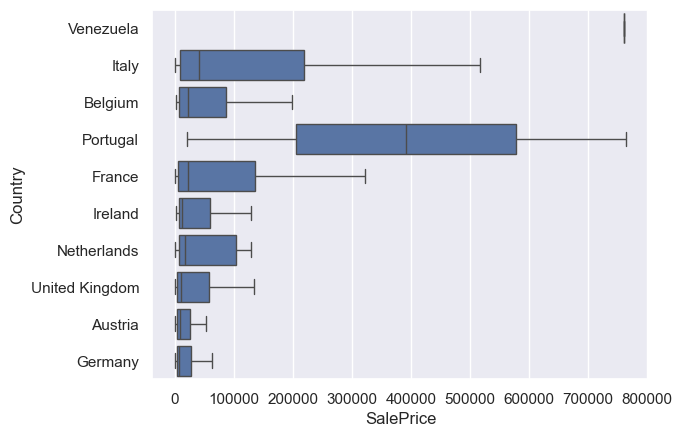

In [354]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.set_theme(style="darkgrid")
df = by_region
 
# Using pandas methods and slicing to determine the order by decreasing median
my_order = df.groupby(by=['Country'])['SalePrice'].mean().sort_values(ascending=False).iloc[::-1]
top_groups = my_order.nlargest(10).index
 
# Specifying the 'order' parameter with my_order and plotting
sns.boxplot(x='SalePrice', y='Country', data=df, order=top_groups, showfliers=False)
plt.show()

In [606]:
by_region[by_region['Country'] == 'Venezuela']

Country             Maker  SalePrice
3079  Venezuela  Peresson, Sergio     761168

In [632]:
Tarisio[Tarisio['Country'] == 'Venezuela'].sort_values(by=['SalePrice'])

Instrument   SaleDate  SalePrice AuctionHouse       AuctionCity  \
38178     Violin 2006-07-15       4025      Tarisio   Haddonfield, NJ   
38165      Viola 2017-03-27      11332      Tarisio   Haddonfield, NJ   
38171      Viola 2013-10-16      12000      Tarisio   Haddonfield, NJ   
38179      Viola 2005-05-12      13800      Tarisio   Haddonfield, NJ   
38185      Viola 2001-11-09      14000      Tarisio   Haddonfield, NJ   
38186     Violin 2001-10-04      18000    Sotheby's               NaN   
38172      Viola 2011-11-11      18000      Tarisio   Haddonfield, NJ   
38187     Violin 1997-11-18      18523      Bonhams               NaN   
38176      Viola 2009-10-18      19200      Tarisio   Haddonfield, NJ   
38166      Viola 2017-02-24      20650      Tarisio   Haddonfield, NJ   
38162     Violin 2020-03-24      20715      Tarisio             Udine   
38163      Viola 2019-03-01      21600      Tarisio   Haddonfield, NJ   
38189     Violin 1995-10-31      21814    Sotheby's               NaN   
38160      Viola 2024-03-15      22800          NaN   Haddonfield, NJ   
38188     Violin 1996-11-20      23156   Christie's               NaN   
38175      Viola 2011-05-06      24000      Tarisio   Haddonfield, NJ   
38168     Violin 2017-02-24      24000      Tarisio  Philadelphia, PA   
38180     Violin 2005-04-22      24000   Christie's               NaN   
38170     Violin 2014-10-17      27600      Tarisio   Haddonfield, NJ   
38182     Violin 2004-05-06      28750      Tarisio   Haddonfield, NJ   
38183     Violin 2003-05-08      28750      Tarisio   Haddonfield, NJ   
38184      Viola 2003-05-08      28750      Tarisio   Haddonfield, NJ   
38177     Violin 2008-10-22      30278      Tarisio   Haddonfield, NJ   
38181      Cello 2004-10-22      31625      Tarisio   Haddonfield, NJ   
38174     Violin 2011-10-14      32500   Christie's               NaN   
38164      Viola 2018-11-08      33000      Tarisio  Philadelphia, PA   
38161     Violin 2024-03-15      33000          NaN   Haddonfield, NJ   
38167      Cello 2017-02-24      41300      Tarisio   Haddonfield, NJ   
38169     Violin 2016-10-14      42000      Tarisio               NaN   
38173      Viola 2011-11-11      72000      Tarisio   Haddonfield, NJ   

       MakerID             Maker     City    Country  
38178      531  Peresson, Sergio  Caracas  Venezuela  
38165      531  Peresson, Sergio  Caracas  Venezuela  
38171      531  Peresson, Sergio  Caracas  Venezuela  
38179      531  Peresson, Sergio  Caracas  Venezuela  
38185      531  Peresson, Sergio  Caracas  Venezuela  
38186      531  Peresson, Sergio  Caracas  Venezuela  
38172      531  Peresson, Sergio  Caracas  Venezuela  
38187      531  Peresson, Sergio  Caracas  Venezuela  
38176      531  Peresson, Sergio  Caracas  Venezuela  
38166      531  Peresson, Sergio  Caracas  Venezuela  
38162      531  Peresson, Sergio  Caracas  Venezuela  
38163      531  Peresson, Sergio  Caracas  Venezuela  
38189      531  Peresson, Sergio  Caracas  Venezuela  
38160      531  Peresson, Sergio  Caracas  Venezuela  
38188      531  Peresson, Sergio  Caracas  Venezuela  
38175      531  Peresson, Sergio  Caracas  Venezuela  
38168      531  Peresson, Sergio  Caracas  Venezuela  
38180      531  Peresson, Sergio  Caracas  Venezuela  
38170      531  Peresson, Sergio  Caracas  Venezuela  
38182      531  Peresson, Sergio  Caracas  Venezuela  
38183      531  Peresson, Sergio  Caracas  Venezuela  
38184      531  Peresson, Sergio  Caracas  Venezuela  
38177      531  Peresson, Sergio  Caracas  Venezuela  
38181      531  Peresson, Sergio  Caracas  Venezuela  
38174      531  Peresson, Sergio  Caracas  Venezuela  
38164      531  Peresson, Sergio  Caracas  Venezuela  
38161      531  Peresson, Sergio  Caracas  Venezuela  
38167      531  Peresson, Sergio  Caracas  Venezuela  
38169      531  Peresson, Sergio  Caracas  Venezuela  
38173      531  Peresson, Sergio  Caracas  Venezuela

# 

In [639]:
# Does this make sense? What is the mean sale price for Strads (Antonio)?
Strads1 = Tarisio[Tarisio['Maker'] == 'Stradivari, Antonio']
Strads1['SalePrice'].mean()

531500.554973822

In [661]:
(Strads1['SalePrice'].sum()) / (Strads1['SalePrice'].count())

531500.554973822

In [677]:
It = Tarisio[Tarisio['Country'] == 'Italy']
(It['SalePrice'].sum()) / (It['SalePrice'].count())

50345.26678839521

In [671]:
It['SalePrice'].count()

9858

<Axes: xlabel='SalePrice', ylabel='Count'>

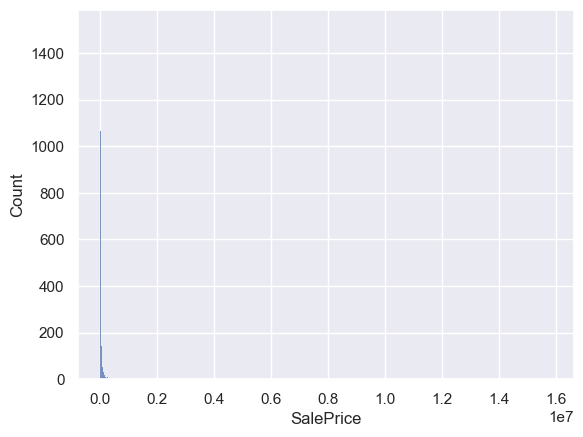

In [673]:
# Visualize Italian violin prices
import seaborn as sns

sns.histplot(data=It, x='SalePrice')

In [665]:
Peresson = Tarisio[Tarisio['Maker'] == 'Peresson, Sergio']
Peresson['SalePrice'].mean()

25372.266666666666

In [679]:
Peresson['SalePrice'].count()

30

In [659]:
(Peresson['SalePrice'].sum()) / (Peresson['SalePrice'].count())

25372.266666666666

### vln_top_regions

violins from Tarisio

these are the top 11 countries with the highest aggregate sales of violins (see above)

In [940]:
Italy_df   = violins[violins['Country'] == 'Italy']
France_df  = violins[violins['Country'] == 'France']
UK_df      = violins[violins['Country'] == 'United Kingdom']
Germany_df = violins[violins['Country'] == 'Germany']
US_df      = violins[violins['Country'] == 'US']
Belgium_df = violins[violins['Country'] == 'Belgium']
Nlands_df  = violins[violins['Country'] == 'Netherlands']
Austria_df = violins[violins['Country'] == 'Austria']
Ireland_df = violins[violins['Country'] == 'Ireland']
Hungary_df = violins[violins['Country'] == 'Hungary']
Czechia_df = violins[violins['Country'] == 'Czechia']

import pandas as pd
vln_top_regions = pd.concat(
    [Italy_df, France_df, UK_df, Germany_df, US_df, 
     Belgium_df, Nlands_df, Austria_df, Ireland_df, 
     Hungary_df, Czechia_df ]
)
vln_top_regions

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity  \
33        Violin 2019-11-08       4130      Tarisio       Milan   
34        Violin 2018-06-25       3603      Tarisio       Milan   
35        Violin 2017-10-23       5934      Tarisio       Turin   
36        Violin 2013-10-16       4800      Tarisio       Milan   
37        Violin 2005-10-16       4700      Skinner       Milan   
...          ...        ...        ...          ...         ...   
24450     Violin 2019-10-21       4054   Brompton's      Znojmo   
24451     Violin 2008-03-31       3706    Dorotheum         NaN   
24452     Violin 1990-03-27       5366    Sotheby's         NaN   
24758     Violin 1995-05-11        143    Phillip's    Rochdale   
25241     Violin 2019-11-08       3000      Tarisio        Luby   

                    Maker    City  Country  Year  
33     Agostinelli, Luigi  Gubbio    Italy  2019  
34     Agostinelli, Luigi  Gubbio    Italy  2018  
35     Agostinelli, Luigi  Gubbio    Italy  2017  
36     Agostinelli, Luigi  Gubbio    Italy  2013  
37     Agostinelli, Luigi  Gubbio    Italy  2005  
...                   ...     ...      ...   ...  
24450  Wassermann, Joseph  Znojmo  Czechia  2019  
24451  Wassermann, Joseph  Znojmo  Czechia  2008  
24452  Wassermann, Joseph  Znojmo  Czechia  1990  
24758   Wild, Franz Anton    Brno  Czechia  1995  
25241   Zucker, Frantisek    Luby  Czechia  2019  

[23685 rows x 9 columns]

<Figure size 1000x600 with 0 Axes>

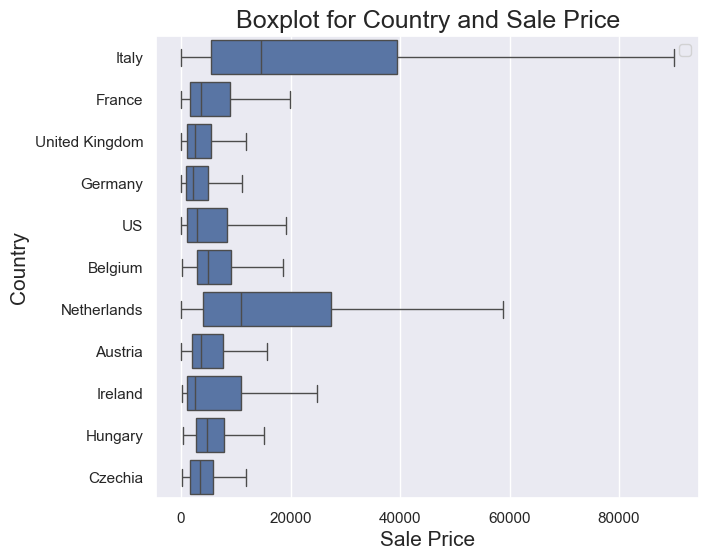

In [948]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(figsize=(7, 6))
# ax.set_xscale('log')

sns.boxplot(x=vln_top_regions['SalePrice'], y=vln_top_regions['Country'], showfliers=False)
plt.title('Boxplot for Country and Sale Price', fontsize=18)
plt.ylabel('Country', fontsize=15)
plt.xlabel('Sale Price', fontsize=15)
plt.legend('')

plt.show()

<Figure size 1000x600 with 0 Axes>

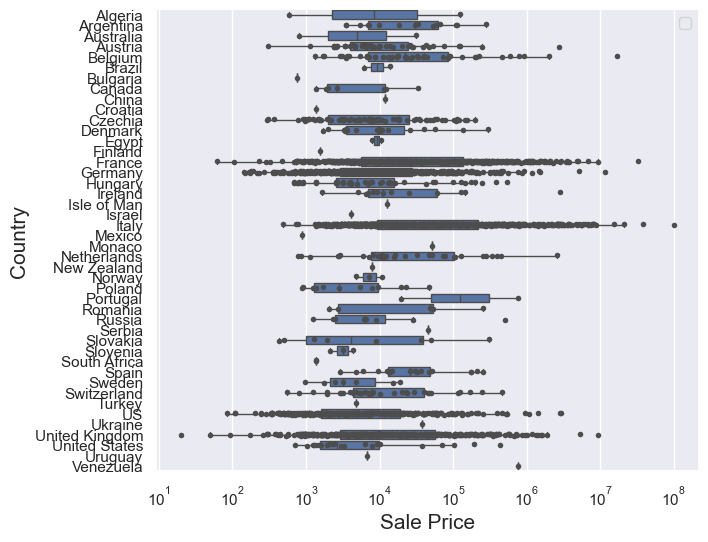

In [956]:
# This was more useful when looking at only 4 countries
# This is looking at all the regions

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale('log')

sns.boxplot(x=by_region['SalePrice'], y=by_region['Country'], showfliers=False)

# Add in points to show each observation
sns.stripplot(by_region, x=by_region['SalePrice'], y=by_region['Country'], size=4, color=".3")

plt.title('', fontsize=18)
plt.ylabel('Country', fontsize=15)
plt.xlabel('Sale Price', fontsize=15)
plt.legend('')

plt.show()

### Looking at the top 4 regions, in by_region

In [958]:
by_region1 = Tarisio.groupby(['Country'])['SalePrice'].sum()
by_region1 = pd.DataFrame(by_region1).reset_index()
by_region1.sort_values(by=['SalePrice'], ascending=False)

Country  SalePrice
20           Italy  496303640
14          France  168867485
40  United Kingdom   48848838
15         Germany   40006499
4          Belgium   23375085
38              US   17160968
23     Netherlands    5080619
3          Austria    3865957
17         Ireland    3242874
16         Hungary    2299096
10         Czechia    1878403
36     Switzerland    1554074
34           Spain    1133598
41   United States     900692
1        Argentina     800227
27        Portugal     784174
43       Venezuela     761168
11         Denmark     632329
29          Russia     556922
31        Slovakia     409798
28         Romania     359075
0          Algeria     125416
26          Poland     123288
7           Canada      64767
22          Monaco      52328
35          Sweden      47671
30          Serbia      45079
39         Ukraine      37813
2        Australia      31749
25          Norway      22857
5           Brazil      19860
12           Egypt      18466
18     Isle of Man      12702
8            China      11826
32        Slovenia       9676
24     New Zealand       7790
42         Uruguay       6703
37          Turkey       4720
19          Israel       4130
33    South Africa       2760
13         Finland       1534
9          Croatia       1380
21          Mexico        878
6         Bulgaria        761

In [960]:
Tarisio[Tarisio['Country'] == 'Italy'].count()

Instrument      9858
SaleDate        9858
SalePrice       9858
AuctionHouse    9194
AuctionCity     7224
MakerID         9858
Maker           9858
City            9858
Country         9858
dtype: int64

In [962]:
Tarisio.groupby('Country').count()

Instrument  SaleDate  SalePrice  AuctionHouse  AuctionCity  \
Country                                                                      
Algeria                 21        21         21            16           14   
Argentina               90        90         90            80           82   
Australia                6         6          6             6            6   
Austria                280       280        280           269          210   
Belgium               2061      2061       2061          1875         1523   
Brazil                   5         5          5             5            3   
Bulgaria                 1         1          1             1            1   
Canada                  36        36         36            31           29   
China                    2         2          2             1            2   
Croatia                  1         1          1             1            1   
Czechia                439       439        439           424          331   
Denmark                 91        91         91            76           83   
Egypt                    6         6          6             5            4   
Finland                  1         1          1             0            1   
France               17942     17942      17942         15536        10945   
Germany               8031      8031       8031          7597         4959   
Hungary                318       318        318           312          263   
Ireland                221       221        221           214          185   
Isle of Man              6         6          6             6            6   
Israel                   1         1          1             0            1   
Italy                 9858      9858       9858          9194         7224   
Mexico                   1         1          1             1            1   
Monaco                   4         4          4             3            2   
Netherlands            356       356        356           339          260   
New Zealand              3         3          3             3            1   
Norway                   6         6          6             6            4   
Poland                  42        42         42            40           19   
Portugal               102       102        102            90           66   
Romania                 32        32         32            32           21   
Russia                  41        41         41            37           28   
Serbia                  10        10         10             7            1   
Slovakia                68        68         68            63           41   
Slovenia                 4         4          4             3            2   
South Africa             2         2          2             2            2   
Spain                   76        76         76            73           47   
Sweden                   9         9          9             7            7   
Switzerland            466       466        466           423          226   
Turkey                   1         1          1             0            0   
US                    2212      2212       2212          2019         1139   
Ukraine                  4         4          4             4            4   
United Kingdom       10161     10161      10161          9806         7151   
United States          230       230        230           206          163   
Uruguay                  2         2          2             2            2   
Venezuela               30        30         30            28           23   

                MakerID  Maker   City  
Country                                
Algeria              21     21     21  
Argentina            90     90     90  
Australia             6      6      6  
Austria             280    280    280  
Belgium            2061   2061   2061  
Brazil                5      5      5  
Bulgaria              1      1      1  
Canada               36     36     36  
China                 2    

In [965]:
Italy_df   = Tarisio[Tarisio['Country'] == 'Italy']
France_df  = Tarisio[Tarisio['Country'] == 'France']
UK_df      = Tarisio[Tarisio['Country'] == 'United Kingdom']
Germany_df = Tarisio[Tarisio['Country'] == 'Germany']

import pandas as pd
top4_regions = pd.concat([Italy_df, France_df, UK_df, Germany_df])
top4_regions

Instrument   SaleDate  SalePrice AuctionHouse     AuctionCity  MakerID  \
152       Violin 2019-11-08       4130      Tarisio           Milan     2665   
153       Violin 2018-06-25       3603      Tarisio           Milan     2665   
154       Violin 2017-10-23       5934      Tarisio           Turin     2665   
155       Violin 2013-10-16       4800      Tarisio           Milan     2665   
156        Viola 2012-11-27       8180      Tarisio           Milan     2665   
...          ...        ...        ...          ...             ...      ...   
55234     Violin 1985-03-14        250    Phillip's  Markneukirchen     1394   
55266     Violin 2002-10-24       2138      Tarisio             NaN    15204   
55267     Violin 1997-11-18       2633      Bonhams          Passau    15204   
55268      Viola 1991-09-19       1520    Phillip's          Passau    15204   
55269     Violin 1987-04-23        540    Phillip's          Passau    15204   

                             Maker            City  Country  
152             Agostinelli, Luigi          Gubbio    Italy  
153             Agostinelli, Luigi          Gubbio    Italy  
154             Agostinelli, Luigi          Gubbio    Italy  
155             Agostinelli, Luigi          Gubbio    Italy  
156             Agostinelli, Luigi          Gubbio    Italy  
...                            ...             ...      ...  
55234  Zimmermann, Julius Heinrich  Markneukirchen  Germany  
55266            Zwerger, Anton II          Passau  Germany  
55267            Zwerger, Anton II          Passau  Germany  
55268            Zwerger, Anton II          Passau  Germany  
55269            Zwerger, Anton II          Passau  Germany  

[45992 rows x 9 columns]

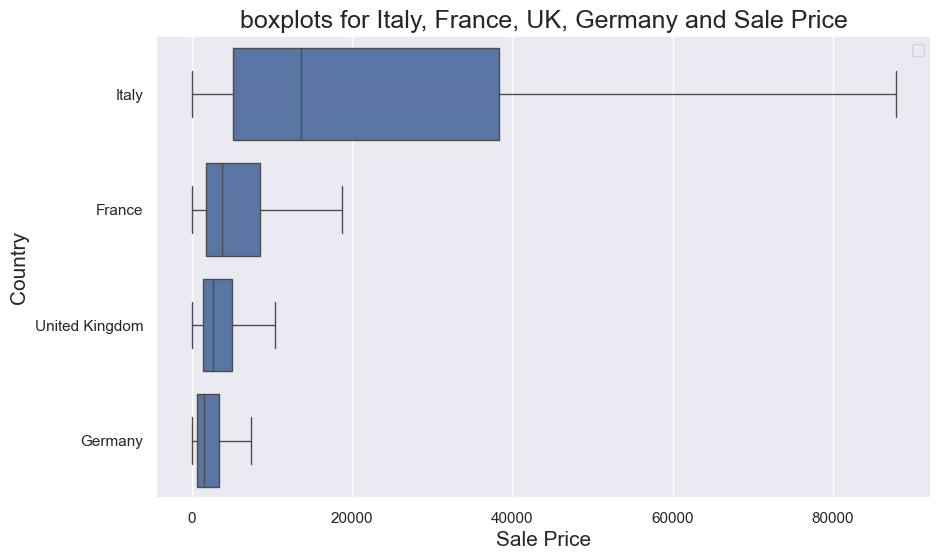

In [975]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.boxplot(x=top4_regions['SalePrice'], y=top4_regions['Country'], showfliers=False)
plt.title('boxplots for Italy, France, UK, Germany and Sale Price', fontsize=18)
plt.ylabel('Country', fontsize=15)
plt.xlabel('Sale Price', fontsize=15)
plt.legend('')

plt.show()

<Figure size 1000x600 with 0 Axes>

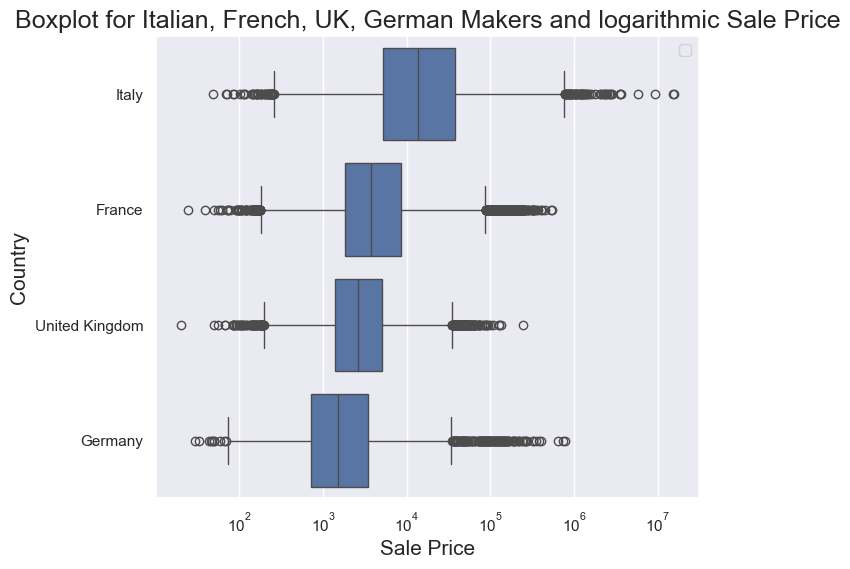

In [977]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale('log')

sns.boxplot(x=top4_regions['SalePrice'], y=top4_regions['Country'])
plt.title('Boxplot for Italian, French, UK, German Makers and logarithmic Sale Price', fontsize=18)
plt.ylabel('Country', fontsize=15)
plt.xlabel('Sale Price', fontsize=15)
plt.legend('')

plt.show()

<Figure size 1000x600 with 0 Axes>

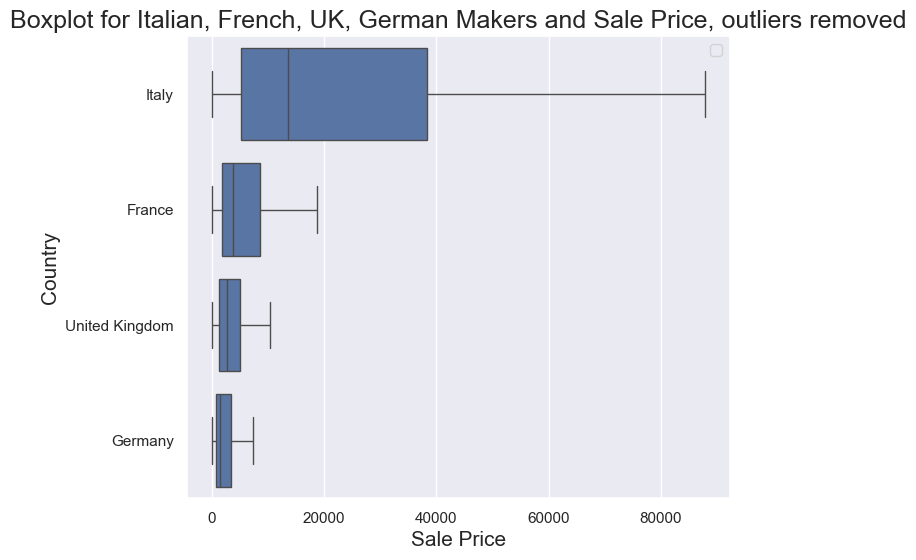

In [979]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(figsize=(7, 6))
# 

sns.boxplot(x=top4_regions['SalePrice'], y=top4_regions['Country'], showfliers = False)
plt.title('Boxplot for Italian, French, UK, German Makers and Sale Price, outliers removed', fontsize=18)
plt.ylabel('Country', fontsize=15)
plt.xlabel('Sale Price', fontsize=15)
plt.legend('')

plt.show()

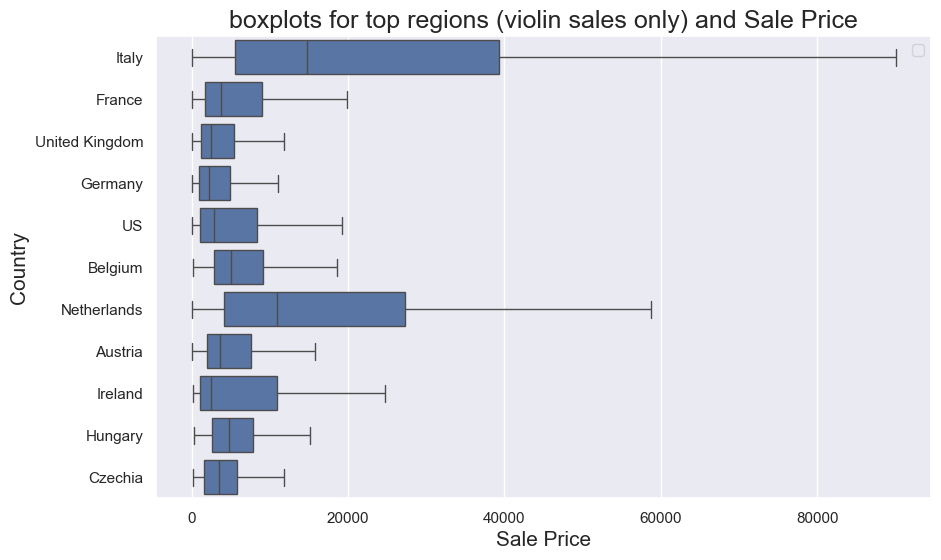

In [983]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.boxplot(x=vln_top_regions['SalePrice'], y=vln_top_regions['Country'], showfliers=False)
plt.title('boxplots for top regions (violin sales only) and Sale Price', fontsize=18)
plt.ylabel('Country', fontsize=15)
plt.xlabel('Sale Price', fontsize=15)
plt.legend('')

plt.show()

<Figure size 1000x600 with 0 Axes>

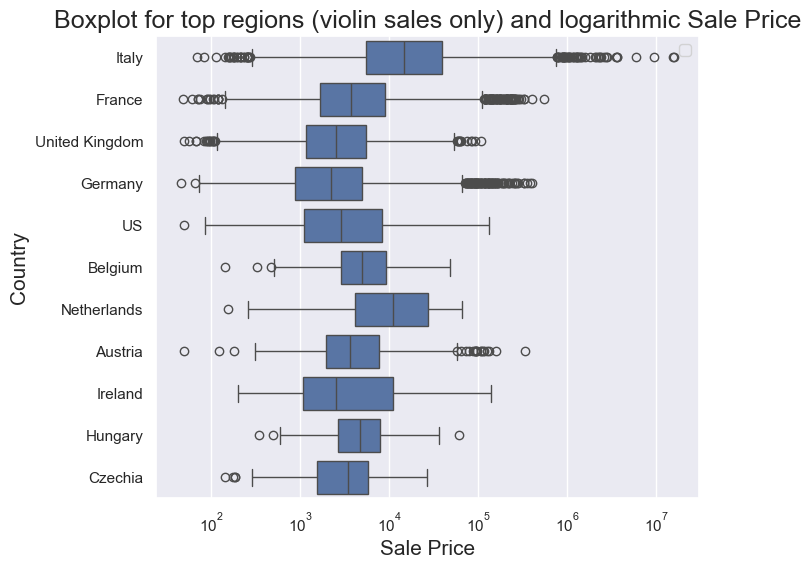

In [706]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale('log')

sns.boxplot(x=vln_top_regions['SalePrice'], y=vln_top_regions['Country'])
plt.title('Boxplot for top regions (violin sales only) and logarithmic Sale Price', fontsize=18)
plt.ylabel('Country', fontsize=15)
plt.xlabel('Sale Price', fontsize=15)
plt.legend('')

plt.show()

<Figure size 1000x600 with 0 Axes>

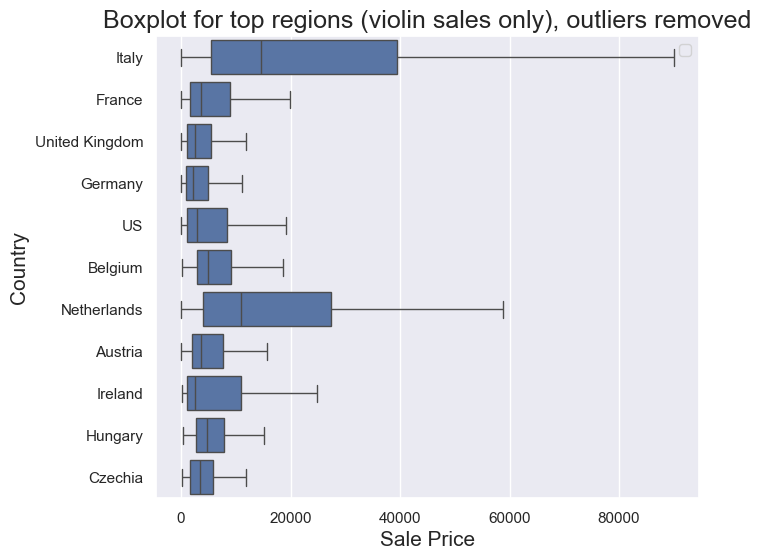

In [708]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x=vln_top_regions['SalePrice'], y=vln_top_regions['Country'], showfliers=False)
plt.title('Boxplot for top regions (violin sales only), outliers removed', fontsize=18)
plt.ylabel('Country', fontsize=15)
plt.xlabel('Sale Price', fontsize=15)
plt.legend('')

plt.show()

# More Maker Trends

[Return to Table of Contents](#Contents)

Looking at violin sales by individual makers and fitting trends with linear, quadratic, and cubic regression lines.

In [359]:
# Find a single violin maker
Strads_Antonio = violins[(violins['Maker'].str.contains('Strad')) & (violins['Maker'].str.contains('Antonio'))]
Strads_Antonio

Instrument   SaleDate  SalePrice       AuctionHouse AuctionCity  \
21948     Violin 2023-06-09    5900000                NaN     Cremona   
21949     Violin 2023-03-28    2215565                NaN     Cremona   
21950     Violin 2023-03-28    1452426                NaN     Cremona   
21951     Violin 2022-06-10   15340000                NaN     Cremona   
21952     Violin 2017-03-28    2410310    Ingles & Hayday     Cremona   
...          ...        ...        ...                ...         ...   
22109     Violin 1862-06-26        853  Puttick & Simpson         NaN   
22110     Violin 1857-02-18        973  Christie & Manson         NaN   
22111     Violin 1853-05-28        606  Puttick & Simpson         NaN   
22112     Violin 1850-11-28        588  Puttick & Simpson         NaN   
22113     Violin 1850-11-28        715  Puttick & Simpson         NaN   

                     Maker     City Country  Year  
21948  Stradivari, Antonio  Cremona   Italy  2023  
21949  Stradivari, Antonio  Cremona   Italy  2023  
21950  Stradivari, Antonio  Cremona   Italy  2023  
21951  Stradivari, Antonio  Cremona   Italy  2022  
21952  Stradivari, Antonio  Cremona   Italy  2017  
...                    ...      ...     ...   ...  
22109  Stradivari, Antonio  Cremona   Italy  1862  
22110  Stradivari, Antonio  Cremona   Italy  1857  
22111  Stradivari, Antonio  Cremona   Italy  1853  
22112  Stradivari, Antonio  Cremona   Italy  1850  
22113  Stradivari, Antonio  Cremona   Italy  1850  

[166 rows x 9 columns]

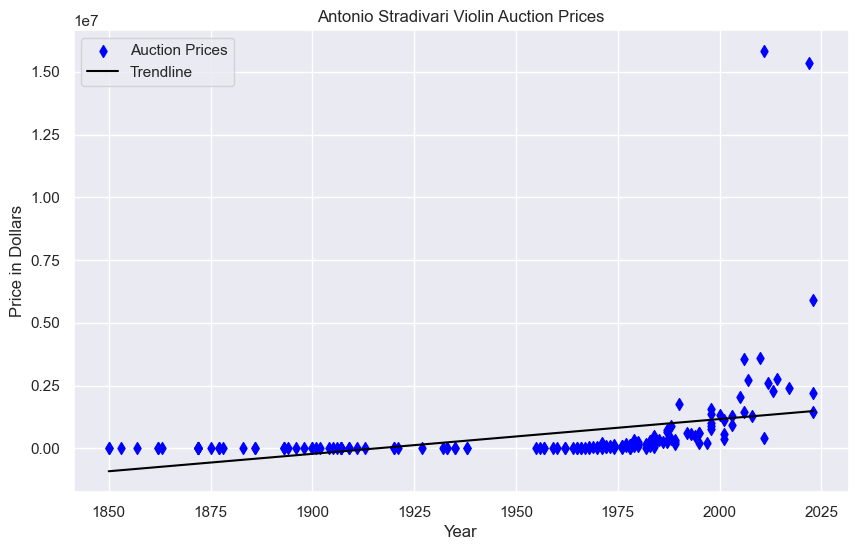

In [501]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(Strads_Antonio['Year'], Strads_Antonio['SalePrice'], color='blue', label='Auction Prices', marker='d')

# Fit a trendline
slope, intercept, _, _, _ = linregress(Strads_Antonio['Year'], Strads_Antonio['SalePrice'])
plt.plot(Strads_Antonio['Year'], slope * Strads_Antonio['Year'] + intercept, color='black', label='Trendline')

# Adding labels and title
plt.title('Antonio Stradivari Violin Auction Prices')
plt.xlabel('Year')
plt.ylabel('Price in Dollars')
plt.legend()
plt.show()

### Linear regression fit:

R^2 Score: 0.11844653865530319
Coefficients: [    0.         13862.39098137]
Intercept: -26557275.727682862
5-Fold Cross-Validation R^2 Scores for 2nd degree Polynomial Regression: [-3.63103469e-01 -7.54435916e+00 -1.89748773e+02 -3.10855176e+03
 -4.28339825e+06]
Average R^2 Score: -857340.8911936956


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


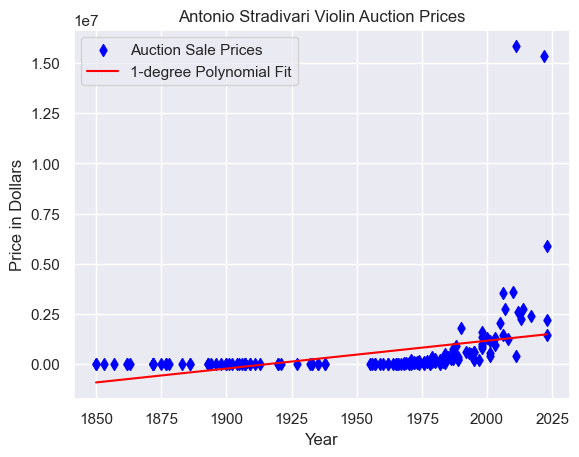

In [738]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

# Assuming X and y are your data points:
# Replace X and y with the actual Year and Price data from your dataset.
X = Strads_Antonio[['Year']]
y = Strads_Antonio['SalePrice']
    # X = np.array([your_year_data]).reshape(-1, 1)
    # y = np.array([your_price_data])

# Define the degree of the polynomial (e.g., 2 for quadratic, 3 for cubic)
degree = 1
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Calculate R^2, coefficients and intercept
r_squared = model.score(X_poly, y)
coefficients = model.coef_
intercept = model.intercept_

# Print results
print("R^2 Score:", r_squared)
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring='r2')

# Output the results
print("5-Fold Cross-Validation R^2 Scores for 2nd degree Polynomial Regression:", cv_scores)
print("Average R^2 Score:", cv_scores.mean())

# Generate predictions for plotting
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_poly_pred = model.predict(X_range_poly)

# Plot the original data and the polynomial regression line
plt.scatter(X, y, color='blue', label='Auction Sale Prices', marker='d')
plt.plot(X_range, y_poly_pred, color='red', label=f'{degree}-degree Polynomial Fit')
plt.xlabel('Year')
plt.ylabel('Price in Dollars')
plt.title('Antonio Stradivari Violin Auction Prices')
plt.legend()
plt.show()

### Quadratic fit

R^2 Score: 0.29951311868972885
Coefficients: [ 0.00000000e+00 -1.64475346e+06  4.27748898e+02]
Intercept: 1580253551.9867961
5-Fold Cross-Validation R^2 Scores for 2nd degree Polynomial Regression: [-2.74399264e-01 -4.77350778e+00 -2.87440964e+01 -1.72563100e+04
 -1.48636782e+07]
Average R^2 Score: -2976193.668102987


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


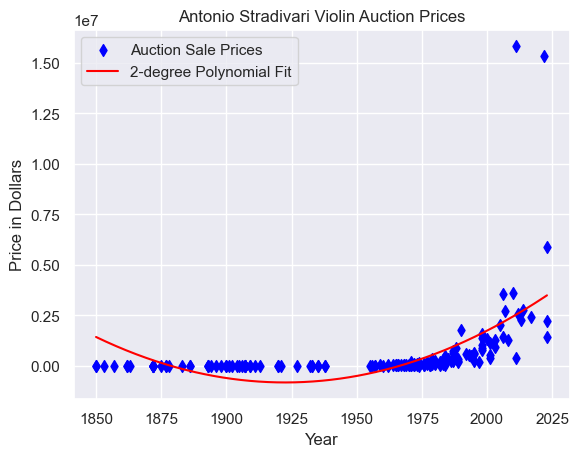

In [736]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

# Assuming X and y are your data points:
# Replace X and y with the actual Year and Price data from your dataset.
X = Strads_Antonio[['Year']]
y = Strads_Antonio['SalePrice']
    # X = np.array([your_year_data]).reshape(-1, 1)
    # y = np.array([your_price_data])

# Define the degree of the polynomial (e.g., 2 for quadratic, 3 for cubic)
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Calculate R^2, coefficients and intercept
r_squared = model.score(X_poly, y)
coefficients = model.coef_
intercept = model.intercept_

# Print results
print("R^2 Score:", r_squared)
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring='r2')

# Output the results
print("5-Fold Cross-Validation R^2 Scores for 2nd degree Polynomial Regression:", cv_scores)
print("Average R^2 Score:", cv_scores.mean())

# Generate predictions for plotting
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_poly_pred = model.predict(X_range_poly)

# Plot the original data and the polynomial regression line
plt.scatter(X, y, color='blue', label='Auction Sale Prices', marker='d')
plt.plot(X_range, y_poly_pred, color='red', label=f'{degree}-degree Polynomial Fit')
plt.xlabel('Year')
plt.ylabel('Price in Dollars')
plt.title('Antonio Stradivari Violin Auction Prices')
plt.legend()
plt.show()

### Cubic regression fit:

R^2 Score: 0.40813662552435104
Coefficients: [ 0.00000000e+00  7.00318012e+07 -3.65254727e+04  6.34821617e+00]
Intercept: -44745659297.46479
5-Fold Cross-Validation R^2 Scores for Cubic Regression: [-8.33362435e-02 -2.55659412e-01 -1.62224911e+01 -4.47995576e+03
 -3.04129066e+07]
Average R^2 Score: -6083480.613488029


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


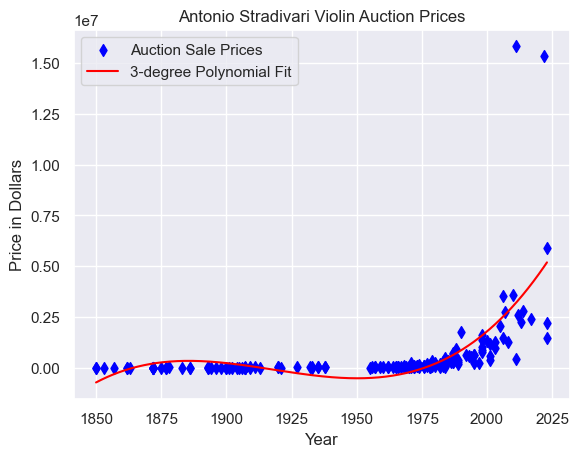

In [742]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

# Assuming X and y are your data points:
# Replace X and y with the actual Year and Price data from your dataset.
X = Strads_Antonio[['Year']]
y = Strads_Antonio['SalePrice']
    # X = np.array([your_year_data]).reshape(-1, 1)
    # y = np.array([your_price_data])

# Define the degree of the polynomial (e.g., 2 for quadratic, 3 for cubic)
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Calculate R^2, coefficients and intercept
r_squared = model.score(X_poly, y)
coefficients = model.coef_
intercept = model.intercept_

# Print results
print("R^2 Score:", r_squared)
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring='r2')

# Output the results
print("5-Fold Cross-Validation R^2 Scores for Cubic Regression:", cv_scores)
print("Average R^2 Score:", cv_scores.mean())

# Generate predictions for plotting
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_poly_pred = model.predict(X_range_poly)

# Plot the original data and the polynomial regression line
plt.scatter(X, y, color='blue', label='Auction Sale Prices', marker='d')
plt.plot(X_range, y_poly_pred, color='red', label=f'{degree}-degree Polynomial Fit')
plt.xlabel('Year')
plt.ylabel('Price in Dollars')
plt.title('Antonio Stradivari Violin Auction Prices')
plt.legend()
plt.show()

### Find top 6 makers (by aggregate sales) and plot each of their trend lines

In [427]:
m_df = violins.groupby(['Maker'])[['SalePrice']].sum()
m_df

SalePrice
Maker                               
Achner, Michael                 7038
Achner, Philip                 30030
Acoulon, Alexandre Alfred      19823
Acton, William John             2053
Adams, Henry T.                 4976
...                              ...
van Soelen, Jacobus             1380
van Vessem, J.                  4938
van de Geest, Jacob             7486
van der Meer, Karel            29854
von Baehr, Stephan            216524

[2828 rows x 1 columns]

In [429]:
m_df.sort_values(by=['SalePrice'], ascending=False)

SalePrice
Maker                                              
Stradivari, Antonio                        93927508
Guadagnini, Giovanni Battista              30313631
Vuillaume, Jean-Baptiste                   25217048
Guarneri, Bartolomeo Giuseppe 'del Gesù'   20893372
Pressenda, Giovanni Francesco              13973764
...                                             ...
Roberts, A. J.                                   92
Awalt, George Woodrow                            85
Howe, Arthur W.                                  62
Bourbon, Nicolas                                 61
Hone, P. A.                                      50

[2828 rows x 1 columns]

In [431]:
m_df = m_df.sort_values(by=['SalePrice'], ascending=False)
m_df.nlargest(10, 'SalePrice')

SalePrice
Maker                                              
Stradivari, Antonio                        93927508
Guadagnini, Giovanni Battista              30313631
Vuillaume, Jean-Baptiste                   25217048
Guarneri, Bartolomeo Giuseppe 'del Gesù'   20893372
Pressenda, Giovanni Francesco              13973764
Gagliano, Nicolò                           10699066
Amati, Nicolò                               8272810
Guarneri, Giuseppe 'filius Andreae'         7680943
Fagnola, Annibale                           6497514
Guarneri, Andrea                            6212684

### Look at makers whose aggregate sales exceed $10 million
There are 6 makers. Amati is not in there! Crazy! (not so crazy - see note) 

In [457]:
Strads_Antonio   = violins[(violins['Maker'].str.contains('Stradivari, Antonio'))]
Guad_Battista    = violins[(violins['Maker'].str.contains('Guadagnini, Giovanni Battista'))]
Vuillaume        = violins[(violins['Maker'].str.contains('Vuillaume, Jean-Baptiste'))]
Guarneri_delGesu = violins[(violins['Maker'].str.contains("Guarneri, Bartolomeo Giuseppe 'del Gesù'"))]
Pressenda        = violins[(violins['Maker'].str.contains('Pressenda, Giovanni Francesco'))]
Gagliano_Nicolo  = violins[(violins['Maker'].str.contains('Gagliano, Nicolò'))]
Guarneri_delGesu

Instrument   SaleDate  SalePrice             AuctionHouse AuctionCity  \
11402     Violin 2023-03-17    9440000                      NaN     Cremona   
11403     Violin 2022-06-03    3637892                      NaN     Cremona   
11404     Violin 2012-06-25    2333175                  Tarisio     Cremona   
11405     Violin 2007-10-12     937000               Christie's     Cremona   
11406     Violin 2000-11-14     445632                Sotheby's     Cremona   
11407     Violin 1997-11-18     935068                Sotheby's     Cremona   
11408     Violin 1989-06-15     384434                Sotheby's     Cremona   
11409     Violin 1988-11-23    1050764                Sotheby's     Cremona   
11410     Violin 1988-11-23     444554               Christie's     Cremona   
11411     Violin 1986-03-19     317245                Sotheby's     Cremona   
11412     Violin 1980-11-12      92607               Bongartz's         NaN   
11413     Violin 1978-11-08     243320                Sotheby's         NaN   
11414     Violin 1977-11-17     230066                Sotheby's         NaN   
11415     Violin 1976-11-25      95555                Sotheby's         NaN   
11416     Violin 1974-04-25     139374                Sotheby's         NaN   
11417     Violin 1972-05-11      32660                Sotheby's         NaN   
11418     Violin 1966-12-05      24640                Sotheby's         NaN   
11419     Violin 1966-07-04      36118                Sotheby's         NaN   
11420     Violin 1962-11-16      25000                Sotheby's         NaN   
11421     Violin 1932-02-05      16000  Anderson Galleries Inc.         NaN   
11422     Violin 1932-02-05      15500  Anderson Galleries Inc.         NaN   
11423     Violin 1915-10-26       2762        Puttick & Simpson         NaN   
11424     Violin 1900-04-25       5746             Hôtel Drouot         NaN   
11425     Violin 1895-12-10       1841        Puttick & Simpson         NaN   
11426     Violin 1876-07-13        382     Foster Auction House         NaN   
11427     Violin 1872-04-29       1369               Christie's         NaN   
11428     Violin 1872-04-29        575               Christie's         NaN   
11429     Violin 1857-02-18       1265        Christie & Manson         NaN   
11430     Violin 1857-02-18        492        Christie & Manson         NaN   
11431     Violin 1857-02-18       1168        Christie & Manson         NaN   
11432     Violin 1857-02-18        511        Christie & Manson         NaN   
11433     Violin 1857-02-18        657        Christie & Manson         NaN   

                                          Maker     City Country  Year  
11402  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  2023  
11403  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  2022  
11404  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  2012  
11405  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  2007  
11406  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  2000  
11407  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1997  
11408  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1989  
11409  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1988  
11410  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1988  
11411  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1986  
11412  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1980  
11413  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1978  
11414  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1977  
11415  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1976  
11416  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1974  
11417  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1972  
11418  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1966  
11419  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1966  
11420  Guar

In [439]:
makers_above10 = pd.concat([Strads_Antonio, Guad_Battista, Vuillaume, Guarneri_delGesu, Pressenda, Gagliano_Nicolo])
makers_above10

Instrument   SaleDate  SalePrice       AuctionHouse AuctionCity  \
21948     Violin 2023-06-09    5900000                NaN     Cremona   
21949     Violin 2023-03-28    2215565                NaN     Cremona   
21950     Violin 2023-03-28    1452426                NaN     Cremona   
21951     Violin 2022-06-10   15340000                NaN     Cremona   
21952     Violin 2017-03-28    2410310    Ingles & Hayday     Cremona   
...          ...        ...        ...                ...         ...   
9835      Violin 1969-11-27       4800          Sotheby's         NaN   
9836      Violin 1969-04-24       6240          Sotheby's         NaN   
9837      Violin 1968-07-19       2104          Sotheby's         NaN   
9838      Violin 1968-04-18       2883          Sotheby's         NaN   
9839      Violin 1956-05-24        320  Puttick & Simpson         NaN   

                     Maker     City  Country  Year  
21948  Stradivari, Antonio  Cremona    Italy  2023  
21949  Stradivari, Antonio  Cremona    Italy  2023  
21950  Stradivari, Antonio  Cremona    Italy  2023  
21951  Stradivari, Antonio  Cremona    Italy  2022  
21952  Stradivari, Antonio  Cremona    Italy  2017  
...                    ...      ...      ...   ...  
9835      Gagliano, Nicolò   Aachen  Germany  1969  
9836      Gagliano, Nicolò   Aachen  Germany  1969  
9837      Gagliano, Nicolò   Aachen  Germany  1968  
9838      Gagliano, Nicolò   Aachen  Germany  1968  
9839      Gagliano, Nicolò   Aachen  Germany  1956  

[944 rows x 9 columns]

In [463]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the list of makers
makers_above10 = pd.concat([Strads_Antonio, Guad_Battista, Vuillaume, Guarneri_delGesu, Pressenda, Gagliano_Nicolo])
makers = [
    'Stradivari, Antonio', 'Guadagnini, Giovanni Battista', 'Vuillaume, Jean-Baptiste', 
    "Guarneri, Bartolomeo Giuseppe 'del Gesù'", 'Pressenda, Giovanni Francesco', 'Gagliano, Nicolò'
         ]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

In [463]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the list of makers
makers_above10 = pd.concat([Strads_Antonio, Guad_Battista, Vuillaume, Guarneri_delGesu, Pressenda, Gagliano_Nicolo])
makers = [
    'Stradivari, Antonio', 'Guadagnini, Giovanni Battista', 'Vuillaume, Jean-Baptiste', 
    "Guarneri, Bartolomeo Giuseppe 'del Gesù'", 'Pressenda, Giovanni Francesco', 'Gagliano, Nicolò'
         ]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

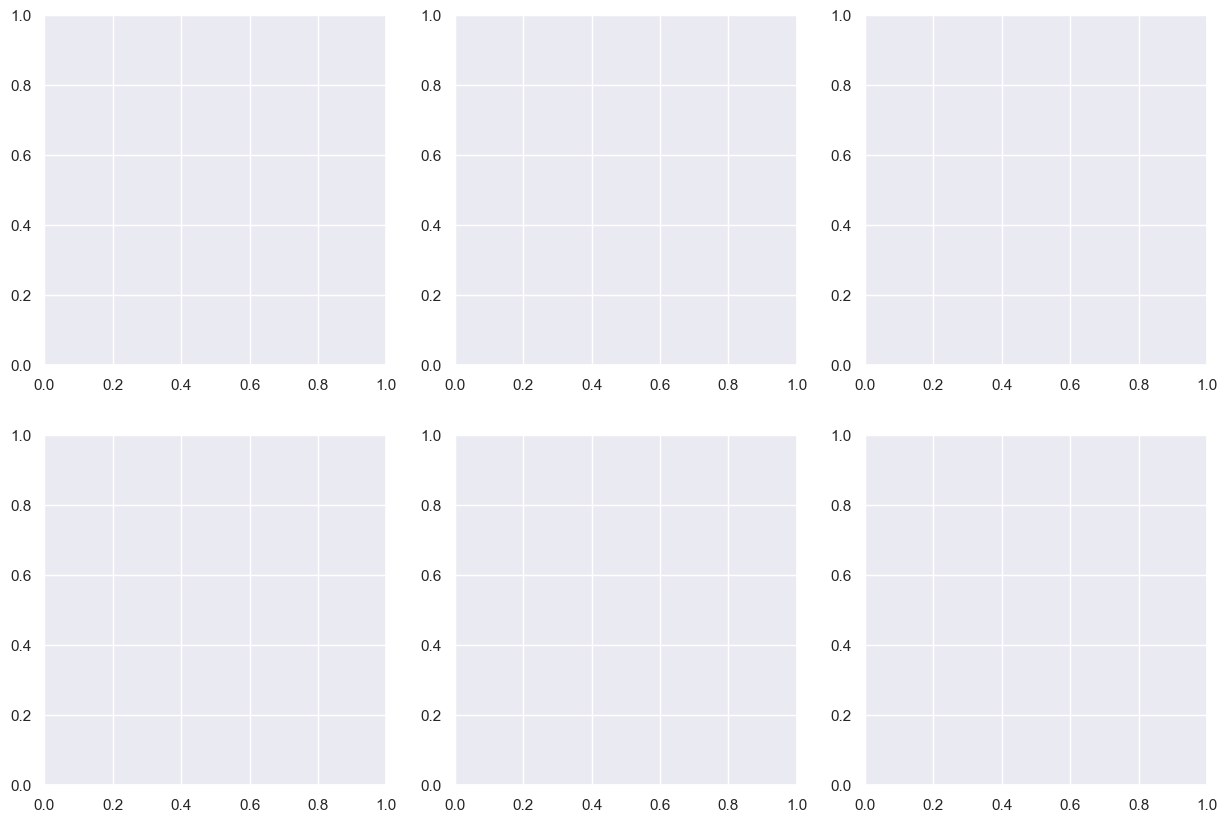

In [447]:
# Set up the layout for a 2x3 grid (or change to (3, 2) for a 3x2 layout)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

In [467]:
# Loop through each maker and plot their data in each subplot
for i, maker in enumerate(makers):
    # Filter for each maker
    maker_df = makers_above10[makers_above10['Maker'] == maker]
    maker_df = makers_above10[makers_above10['Year'] == year]

maker_df

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity  \
22056     Violin 1959-06-23      22750   Christie's         NaN   

                     Maker     City Country  Year  
22056  Stradivari, Antonio  Cremona   Italy  1959

In [461]:
makers_above10.head()

Instrument   SaleDate  SalePrice     AuctionHouse AuctionCity  \
21948     Violin 2023-06-09    5900000              NaN     Cremona   
21949     Violin 2023-03-28    2215565              NaN     Cremona   
21950     Violin 2023-03-28    1452426              NaN     Cremona   
21951     Violin 2022-06-10   15340000              NaN     Cremona   
21952     Violin 2017-03-28    2410310  Ingles & Hayday     Cremona   

                     Maker     City Country  Year  
21948  Stradivari, Antonio  Cremona   Italy  2023  
21949  Stradivari, Antonio  Cremona   Italy  2023  
21950  Stradivari, Antonio  Cremona   Italy  2023  
21951  Stradivari, Antonio  Cremona   Italy  2022  
21952  Stradivari, Antonio  Cremona   Italy  2017

### Make a grid of makers, and fit each with a linear regression line

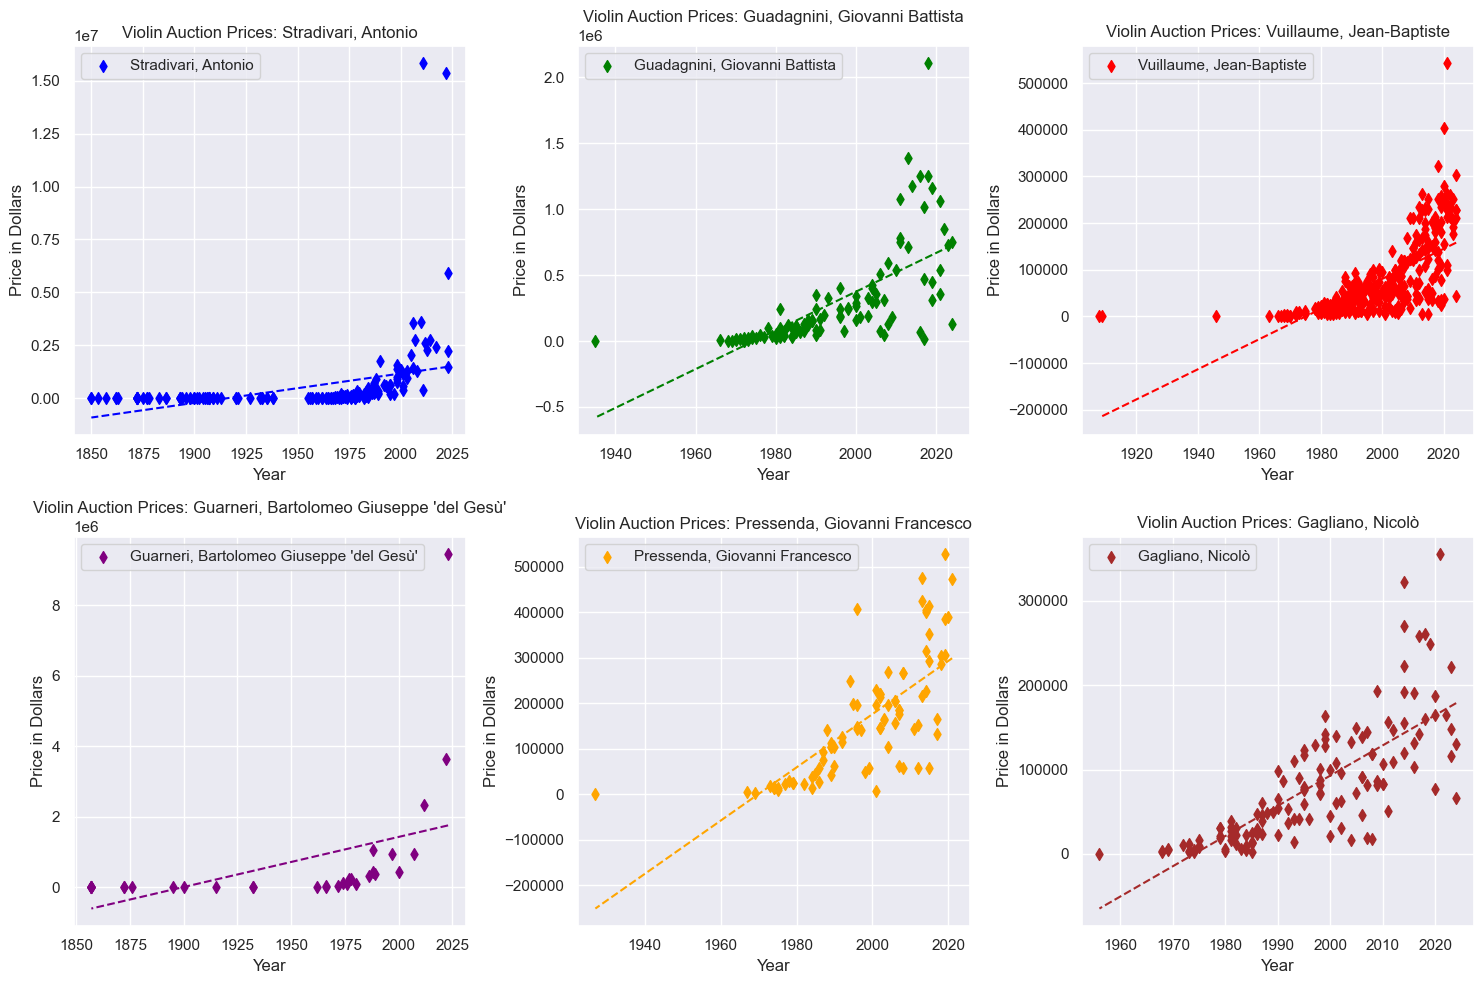

In [509]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the list of makers
makers_above10 = pd.concat([Strads_Antonio, Guad_Battista, Vuillaume, Guarneri_delGesu, Pressenda, Gagliano_Nicolo])
makers = [
    'Stradivari, Antonio', 'Guadagnini, Giovanni Battista', 'Vuillaume, Jean-Baptiste', 
    "Guarneri, Bartolomeo Giuseppe 'del Gesù'", 'Pressenda, Giovanni Francesco', 'Gagliano, Nicolò'
         ]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Set up the layout for a 2x3 grid (or change to (3, 2) for a 3x2 layout)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the 2D array of axes for easy indexing
axes = axes.flatten()  

# Loop through each maker and plot their data in each subplot
for i, maker in enumerate(makers):
    # Filter for each maker
    maker_df = makers_above10[makers_above10['Maker'] == maker]

# Plot on the ith subplot
    ax = axes[i]
    ax.scatter(maker_df['Year'], maker_df['SalePrice'], color=colors[i], label=maker, marker='d')
    
# Fit and plot a trendline if there's enough data
    if len(maker_df) > 1:
        slope, intercept, _, _, _ = linregress(maker_df['Year'], maker_df['SalePrice'])
        ax.plot(maker_df['Year'], slope * maker_df['Year'] + intercept, color=colors[i], linestyle='--')
    
    # Set title and labels for each subplot
    ax.set_title(f'Violin Auction Prices: {maker}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Price in Dollars')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

### Look at the same data from 1970 on

Zoom in on when big changes of price begin, and look at a similar time period for each maker.

In [522]:
vlns_1970_on = violins[violins['Year'] >= 1970]
vlns_1970_on

Instrument   SaleDate  SalePrice AuctionHouse   AuctionCity  \
0         Violin 2010-02-20       4200      Tarisio       Wallgau   
1         Violin 1987-04-27       2838   Bongartz's    Mittenwald   
2         Violin 2018-05-17      24000      Tarisio    Mittenwald   
3         Violin 2008-11-15       3884   Bongartz's           NaN   
4         Violin 1990-03-27       2146    Sotheby's    Mittenwald   
...          ...        ...        ...          ...           ...   
25260     Violin 2012-04-27     108000      Tarisio  Brooklyn, NY   
25261     Violin 2009-12-14      15634   Brompton's           NaN   
25262     Violin 2009-12-14      15634   Brompton's           NaN   
25263     Violin 2003-05-08     130000      Tarisio  Brooklyn, NY   
25264     Violin 2003-05-08      83250      Tarisio  Brooklyn, NY   

                      Maker          City  Country  Year  
0           Achner, Michael    Mittenwald  Germany  2010  
1           Achner, Michael    Mittenwald  Germany  1987  
2            Achner, Philip    Mittenwald  Germany  2018  
3            Achner, Philip    Mittenwald  Germany  2008  
4            Achner, Philip    Mittenwald  Germany  1990  
...                     ...           ...      ...   ...  
25260  Zygmuntowicz, Samuel  Brooklyn, NY       US  2012  
25261  Zygmuntowicz, Samuel  Brooklyn, NY       US  2009  
25262  Zygmuntowicz, Samuel  Brooklyn, NY       US  2009  
25263  Zygmuntowicz, Samuel  Brooklyn, NY       US  2003  
25264  Zygmuntowicz, Samuel  Brooklyn, NY       US  2003  

[25003 rows x 9 columns]

In [524]:
vlns_1970_on['Year'].min()

1970

In [526]:
Strads_Antonio1   = vlns_1970_on[(vlns_1970_on['Maker'].str.contains('Stradivari, Antonio'))]
Guad_Battista1    = vlns_1970_on[(vlns_1970_on['Maker'].str.contains('Guadagnini, Giovanni Battista'))]
Vuillaume1        = vlns_1970_on[(vlns_1970_on['Maker'].str.contains('Vuillaume, Jean-Baptiste'))]
Guarneri_delGesu1 = vlns_1970_on[(vlns_1970_on['Maker'].str.contains("Guarneri, Bartolomeo Giuseppe 'del Gesù'"))]
Pressenda1        = vlns_1970_on[(vlns_1970_on['Maker'].str.contains('Pressenda, Giovanni Francesco'))]
Gagliano_Nicolo1  = vlns_1970_on[(vlns_1970_on['Maker'].str.contains('Gagliano, Nicolò'))]
Guarneri_delGesu1

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity  \
11402     Violin 2023-03-17    9440000          NaN     Cremona   
11403     Violin 2022-06-03    3637892          NaN     Cremona   
11404     Violin 2012-06-25    2333175      Tarisio     Cremona   
11405     Violin 2007-10-12     937000   Christie's     Cremona   
11406     Violin 2000-11-14     445632    Sotheby's     Cremona   
11407     Violin 1997-11-18     935068    Sotheby's     Cremona   
11408     Violin 1989-06-15     384434    Sotheby's     Cremona   
11409     Violin 1988-11-23    1050764    Sotheby's     Cremona   
11410     Violin 1988-11-23     444554   Christie's     Cremona   
11411     Violin 1986-03-19     317245    Sotheby's     Cremona   
11412     Violin 1980-11-12      92607   Bongartz's         NaN   
11413     Violin 1978-11-08     243320    Sotheby's         NaN   
11414     Violin 1977-11-17     230066    Sotheby's         NaN   
11415     Violin 1976-11-25      95555    Sotheby's         NaN   
11416     Violin 1974-04-25     139374    Sotheby's         NaN   
11417     Violin 1972-05-11      32660    Sotheby's         NaN   

                                          Maker     City Country  Year  
11402  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  2023  
11403  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  2022  
11404  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  2012  
11405  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  2007  
11406  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  2000  
11407  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1997  
11408  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1989  
11409  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1988  
11410  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1988  
11411  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1986  
11412  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1980  
11413  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1978  
11414  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1977  
11415  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1976  
11416  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1974  
11417  Guarneri, Bartolomeo Giuseppe 'del Gesù'  Cremona   Italy  1972

In [528]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the list of makers
makers_above10_1970 = pd.concat([Strads_Antonio1, Guad_Battista1, Vuillaume1, Guarneri_delGesu1, Pressenda1, Gagliano_Nicolo1])
makers = [
    'Stradivari, Antonio', 'Guadagnini, Giovanni Battista', 'Vuillaume, Jean-Baptiste', 
    "Guarneri, Bartolomeo Giuseppe 'del Gesù'", 'Pressenda, Giovanni Francesco', 'Gagliano, Nicolò'
         ]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

In [530]:
makers_above10_1970['Year'].min()

1970

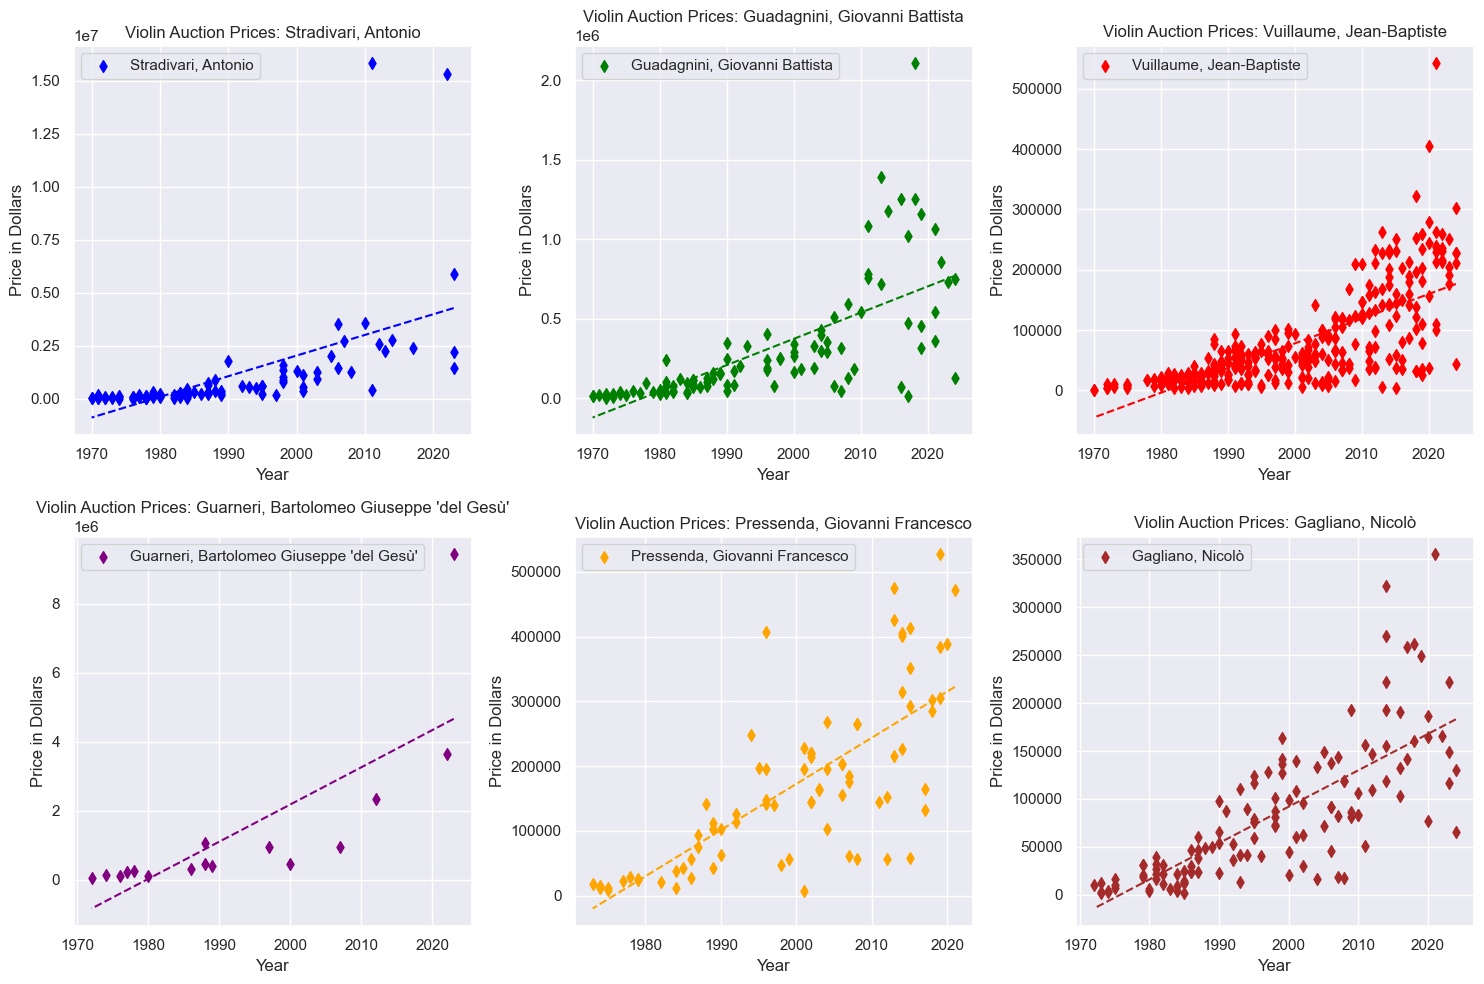

In [853]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the list of makers
makers_above10_1970 = pd.concat([Strads_Antonio1, Guad_Battista1, Vuillaume1, Guarneri_delGesu1, Pressenda1, Gagliano_Nicolo1])
makers = [
    'Stradivari, Antonio', 'Guadagnini, Giovanni Battista', 'Vuillaume, Jean-Baptiste', 
    "Guarneri, Bartolomeo Giuseppe 'del Gesù'", 'Pressenda, Giovanni Francesco', 'Gagliano, Nicolò'
         ]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Set up the layout for a 2x3 grid (or change to (3, 2) for a 3x2 layout)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the 2D array of axes for easy indexing
axes = axes.flatten()  

# Loop through each maker and plot their data in each subplot
for i, maker in enumerate(makers):
    # Filter for each maker
    maker_df = makers_above10_1970[makers_above10_1970['Maker'] == maker]

# Plot on the ith subplot
    ax = axes[i]
    ax.scatter(maker_df['Year'], maker_df['SalePrice'], color=colors[i], label=maker, marker='d')
    
# Fit and plot a trendline if there's enough data
    if len(maker_df) > 1:
        slope, intercept, _, _, _ = linregress(maker_df['Year'], maker_df['SalePrice'])
        ax.plot(maker_df['Year'], slope * maker_df['Year'] + intercept, color=colors[i], linestyle='--')  
    
    # Set title and labels for each subplot
    ax.set_title(f'Violin Auction Prices: {maker}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Price in Dollars')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

### Fit the data with an n-degree polynomial

Set degree = 1, 2, or 3

makers_above10_1970 is a small dataframe of violin makers whose aggregate sales exceed $10 million

and includes violin sales starting in 1970.

Stradivari, Antonio
R^2 Score: 0.3986879122175335
Coefficients: [ 0.00000000e+00 -1.18597437e+07  2.99769459e+03]
Intercept: 11730189477.840666
5-Fold Cross-Validation R^2 Scores for 2 -degree Polynomial Regression: [ -0.05460605  -0.56022852  -0.30228281  -1.33133095 -27.25081717]
Average R^2 Score: -5.899853097678752
#####################
Guadagnini, Giovanni Battista
R^2 Score: 0.49125259311917135
Coefficients: [ 0.00000000e+00 -9.89610180e+05  2.51901292e+02]
Intercept: 971928241.6936089
5-Fold Cross-Validation R^2 Scores for 2 -degree Polynomial Regression: [-0.15314473  0.1243916   0.15261134  0.05360331 -3.0392387 ]
Average R^2 Score: -0.5723554362799204
#####################
Vuillaume, Jean-Baptiste
R^2 Score: 0.5698075683655567
Coefficients: [ 0.00000000e+00 -4.24252630e+05  1.07097661e+02]
Intercept: 420172654.30421996
5-Fold Cross-Validation R^2 Scores for 2 -degree Polynomial Regression: [  0.08926494   0.1927565   -0.17354435  -0.66982476 -27.49743337]
Average R^2 Score: -

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarnin

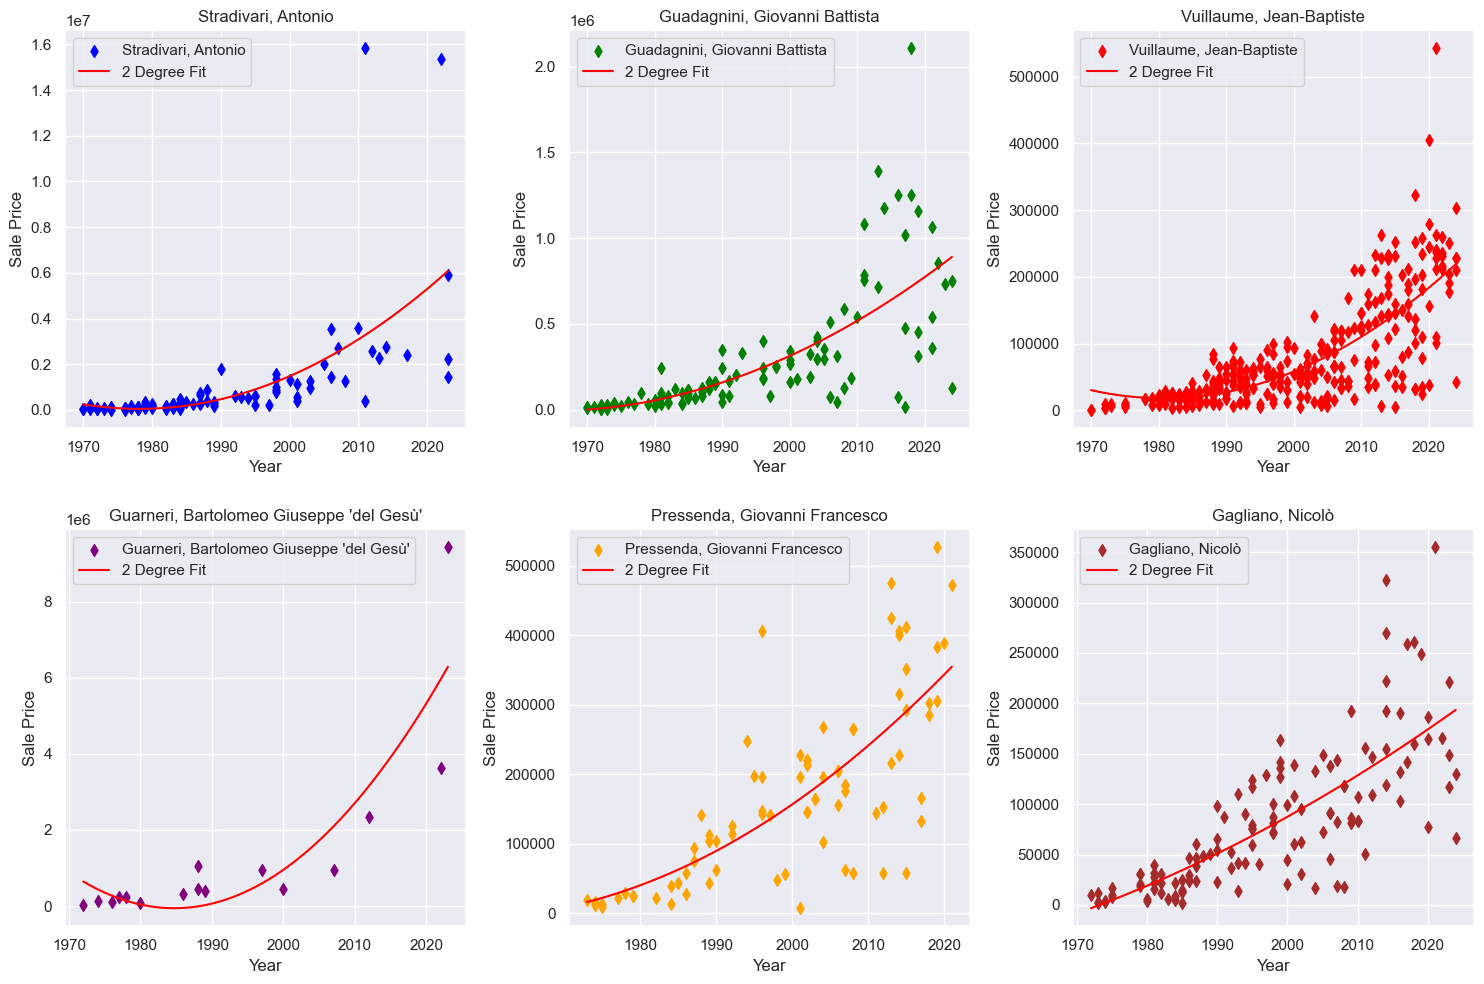

In [817]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the list of makers
makers_above10_1970 = pd.concat([Strads_Antonio1, Guad_Battista1, Vuillaume1, Guarneri_delGesu1, Pressenda1, Gagliano_Nicolo1])
makers = [
    'Stradivari, Antonio', 'Guadagnini, Giovanni Battista', 'Vuillaume, Jean-Baptiste', 
    "Guarneri, Bartolomeo Giuseppe 'del Gesù'", 'Pressenda, Giovanni Francesco', 'Gagliano, Nicolò'
         ]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Set up the layout for a 2x3 grid (or change to (3, 2) for a 3x2 layout)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the 2D array of axes for easy indexing
axes = axes.flatten()  

# Loop through each maker and plot their data in each subplot
for i, maker in enumerate(makers):
    # Filter for each maker
    maker_df = makers_above10_1970[makers_above10_1970['Maker'] == maker]

    # Assign data points
    X = maker_df[['Year']]
    y = maker_df['SalePrice']
 
    # Define the degree of the polynomial (e.g., 1 for linear, 2 for quadratic, 3 for cubic)
    degree = 2
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)
   
    # Calculate R^2, coefficients and intercept
    r_squared = model.score(X_poly, y)
    coefficients = model.coef_
    intercept = model.intercept_
    
    # Print results
    print(maker)
    print("R^2 Score:", r_squared)
    print("Coefficients:", coefficients)
    print("Intercept:", intercept)
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring='r2')
    
    # Output the results
    print("5-Fold Cross-Validation R^2 Scores for", degree, "-degree Polynomial Regression:", cv_scores)
    print("Average R^2 Score:", cv_scores.mean())
    print("#####################")

    # Generate predictions for plotting
    X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_poly_pred = model.predict(X_range_poly)
  
    # Plot the original data and the polynomial regression line on the ith subplot
    axes[i].scatter(X, y, color=colors[i], label=maker, marker='d')
    axes[i].plot(X_range, y_poly_pred, color='red', label=f'{degree} Degree Fit')
    axes[i].set_title(f'{maker}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Sale Price')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show() 


### Violins under $1 million, by region

vlns_by_region

In [985]:
vlns_by_region

Country  SalePrice
0          Algeria      66067
1        Argentina     568209
2        Australia      30024
3          Austria    3166358
4          Belgium    4289968
5           Brazil      19860
6           Canada      27301
7            China      11826
8          Czechia    1469075
9          Denmark     465537
10           Egypt      15541
11          France   64765254
12         Germany   27250915
13         Hungary    1786836
14         Ireland    2812910
15     Isle of Man       5962
16          Israel       4130
17           Italy  413129498
18          Mexico        878
19          Monaco      21236
20     Netherlands    3729736
21     New Zealand       7790
22          Norway      18080
23          Poland      87957
24        Portugal     498962
25         Romania     342622
26          Russia      25185
27        Slovakia     169698
28        Slovenia       9676
29    South Africa       1380
30           Spain     904272
31          Sweden       6672
32     Switzerland     555701
33          Turkey       4720
34              US   10057400
35         Ukraine      37813
36  United Kingdom   15400014
37   United States     197466
38         Uruguay       6703
39       Venezuela     377111

In [859]:
# violins_under_mill = by_region[by_region['SalePrice'] < 1000000]
# violins_under_mill.count()

Country      2942
Maker        2942
SalePrice    2942
dtype: int64

In [896]:
violins_under_mill1 = violins[violins['SalePrice'] < 1000000]
violins_under_mill1.count()

Instrument      25229
SaleDate        25229
SalePrice       25229
AuctionHouse    23690
AuctionCity     18860
Maker           25229
City            24342
Country         24333
Year            25229
dtype: int64

In [904]:
vlns_by_region

Country  SalePrice
0          Algeria      66067
1        Argentina     568209
2        Australia      30024
3          Austria    3166358
4          Belgium    4289968
5           Brazil      19860
6           Canada      27301
7            China      11826
8          Czechia    1469075
9          Denmark     465537
10           Egypt      15541
11          France   64765254
12         Germany   27250915
13         Hungary    1786836
14         Ireland    2812910
15     Isle of Man       5962
16          Israel       4130
17           Italy  413129498
18          Mexico        878
19          Monaco      21236
20     Netherlands    3729736
21     New Zealand       7790
22          Norway      18080
23          Poland      87957
24        Portugal     498962
25         Romania     342622
26          Russia      25185
27        Slovakia     169698
28        Slovenia       9676
29    South Africa       1380
30           Spain     904272
31          Sweden       6672
32     Switzerland     555701
33          Turkey       4720
34              US   10057400
35         Ukraine      37813
36  United Kingdom   15400014
37   United States     197466
38         Uruguay       6703
39       Venezuela     377111

In [988]:
violins.head()

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity            Maker  \
0     Violin 2010-02-20       4200      Tarisio     Wallgau  Achner, Michael   
1     Violin 1987-04-27       2838   Bongartz's  Mittenwald  Achner, Michael   
2     Violin 2018-05-17      24000      Tarisio  Mittenwald   Achner, Philip   
3     Violin 2008-11-15       3884   Bongartz's         NaN   Achner, Philip   
4     Violin 1990-03-27       2146    Sotheby's  Mittenwald   Achner, Philip   

         City  Country  Year  
0  Mittenwald  Germany  2010  
1  Mittenwald  Germany  1987  
2  Mittenwald  Germany  2018  
3  Mittenwald  Germany  2008  
4  Mittenwald  Germany  1990

In [990]:
vlns_by_region1 = violins.groupby(['Country', 'Maker'])['SalePrice'].sum()
vlns_by_region1 = pd.DataFrame(by_region).reset_index()
vlns_by_region1

index        Country               Maker  SalePrice
0         0        Algeria         Bauer, Jean     124833
1         1        Algeria      Peyrot, Alfred        583
2         2      Argentina      Baldoni, Dante      59190
3         3      Argentina        Bruni, Mateo      30396
4         4      Argentina   Capalbo, Giovanni       6900
...     ...            ...                 ...        ...
3075   3075  United States      Smart, Winfred       2070
3076   3076  United States  Watson, William D.     440258
3077   3077  United States      Woodward, C.F.       6436
3078   3078        Uruguay    Fulquet, Annibal       6703
3079   3079      Venezuela    Peresson, Sergio     761168

[3080 rows x 4 columns]

### Visualize mean sale prices for violins under $1 million dollars, by country 

In [992]:
violins_under_mill1 = violins[violins['SalePrice'] < 1000000]
violins_under_mill1

Instrument   SaleDate  SalePrice AuctionHouse   AuctionCity  \
0         Violin 2010-02-20       4200      Tarisio       Wallgau   
1         Violin 1987-04-27       2838   Bongartz's    Mittenwald   
2         Violin 2018-05-17      24000      Tarisio    Mittenwald   
3         Violin 2008-11-15       3884   Bongartz's           NaN   
4         Violin 1990-03-27       2146    Sotheby's    Mittenwald   
...          ...        ...        ...          ...           ...   
25260     Violin 2012-04-27     108000      Tarisio  Brooklyn, NY   
25261     Violin 2009-12-14      15634   Brompton's           NaN   
25262     Violin 2009-12-14      15634   Brompton's           NaN   
25263     Violin 2003-05-08     130000      Tarisio  Brooklyn, NY   
25264     Violin 2003-05-08      83250      Tarisio  Brooklyn, NY   

                      Maker          City  Country  Year  
0           Achner, Michael    Mittenwald  Germany  2010  
1           Achner, Michael    Mittenwald  Germany  1987  
2            Achner, Philip    Mittenwald  Germany  2018  
3            Achner, Philip    Mittenwald  Germany  2008  
4            Achner, Philip    Mittenwald  Germany  1990  
...                     ...           ...      ...   ...  
25260  Zygmuntowicz, Samuel  Brooklyn, NY       US  2012  
25261  Zygmuntowicz, Samuel  Brooklyn, NY       US  2009  
25262  Zygmuntowicz, Samuel  Brooklyn, NY       US  2009  
25263  Zygmuntowicz, Samuel  Brooklyn, NY       US  2003  
25264  Zygmuntowicz, Samuel  Brooklyn, NY       US  2003  

[25229 rows x 9 columns]

In [1000]:
violins_under_mill1.groupby('Country')[['SalePrice']].mean()

SalePrice
Country                     
Algeria          4719.071429
Argentina        8002.943662
Australia        6004.800000
Austria         14524.577982
Belgium          6986.918567
Brazil           3972.000000
Canada           2730.100000
China            5913.000000
Czechia          4295.540936
Denmark          6291.040541
Egypt            3108.200000
France          10832.121425
Germany          7901.106118
Hungary          6569.250000
Ireland         14425.179487
Isle of Man      1490.500000
Israel           4130.000000
Italy           39161.031400
Mexico            878.000000
Monaco          10618.000000
Netherlands     16953.345455
New Zealand      2596.666667
Norway           4520.000000
Poland           2513.057143
Portugal         7920.031746
Romania         12236.500000
Russia           2798.333333
Slovakia         4242.450000
Slovenia         2419.000000
South Africa     1380.000000
Spain           14353.523810
Sweden           2224.000000
Switzerland      3969.292857
Turkey           4720.000000
US               8715.251300
Ukraine          9453.250000
United Kingdom   4655.385127
United States    2632.880000
Uruguay          3351.500000
Venezuela       25140.733333

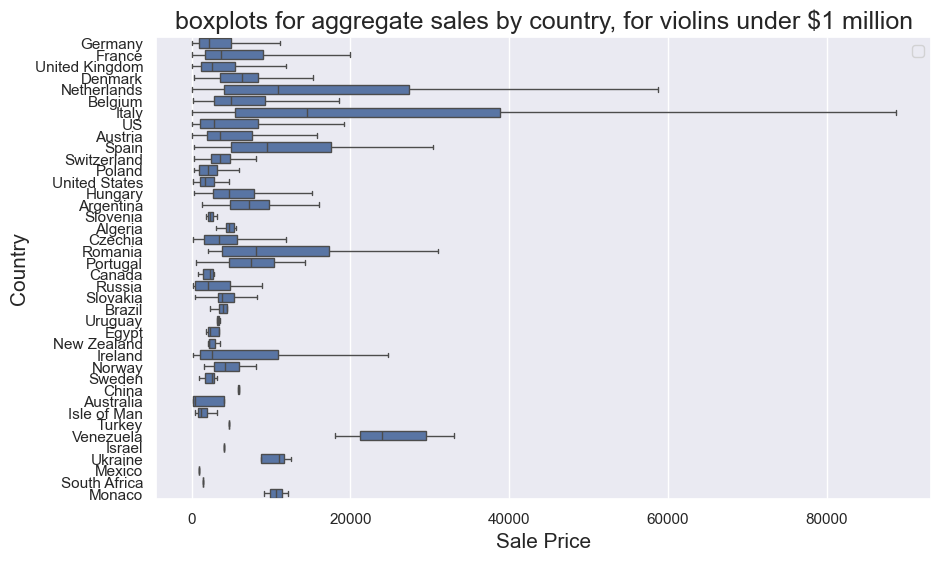

In [1002]:
# Visualize instruments under $1 million by region
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.boxplot(x=violins_under_mill1['SalePrice'], y=violins_under_mill1['Country'], showfliers=False)
plt.title('boxplots for aggregate sales by country, for violins under $1 million', fontsize=18)
plt.ylabel('Country', fontsize=15)
plt.xlabel('Sale Price', fontsize=15)
plt.legend('')

plt.show()

In [1010]:
violins_under_mill1[violins_under_mill1['Country'] == 'Venezuela']

Instrument   SaleDate  SalePrice AuctionHouse       AuctionCity  \
18278     Violin 2024-03-15      33000          NaN   Haddonfield, NJ   
18279     Violin 2020-03-24      20715      Tarisio             Udine   
18280     Violin 2017-02-24      24000      Tarisio  Philadelphia, PA   
18281     Violin 2016-10-14      42000      Tarisio               NaN   
18282     Violin 2014-10-17      27600      Tarisio   Haddonfield, NJ   
18283     Violin 2011-10-14      32500   Christie's               NaN   
18284     Violin 2008-10-22      30278      Tarisio   Haddonfield, NJ   
18285     Violin 2006-07-15       4025      Tarisio   Haddonfield, NJ   
18286     Violin 2005-04-22      24000   Christie's               NaN   
18287     Violin 2004-05-06      28750      Tarisio   Haddonfield, NJ   
18288     Violin 2003-05-08      28750      Tarisio   Haddonfield, NJ   
18289     Violin 2001-10-04      18000    Sotheby's               NaN   
18290     Violin 1997-11-18      18523      Bonhams               NaN   
18291     Violin 1996-11-20      23156   Christie's               NaN   
18292     Violin 1995-10-31      21814    Sotheby's               NaN   

                  Maker     City    Country  Year  
18278  Peresson, Sergio  Caracas  Venezuela  2024  
18279  Peresson, Sergio  Caracas  Venezuela  2020  
18280  Peresson, Sergio  Caracas  Venezuela  2017  
18281  Peresson, Sergio  Caracas  Venezuela  2016  
18282  Peresson, Sergio  Caracas  Venezuela  2014  
18283  Peresson, Sergio  Caracas  Venezuela  2011  
18284  Peresson, Sergio  Caracas  Venezuela  2008  
18285  Peresson, Sergio  Caracas  Venezuela  2006  
18286  Peresson, Sergio  Caracas  Venezuela  2005  
18287  Peresson, Sergio  Caracas  Venezuela  2004  
18288  Peresson, Sergio  Caracas  Venezuela  2003  
18289  Peresson, Sergio  Caracas  Venezuela  2001  
18290  Peresson, Sergio  Caracas  Venezuela  1997  
18291  Peresson, Sergio  Caracas  Venezuela  1996  
18292  Peresson, Sergio  Caracas  Venezuela  1995

In [1006]:
violins[violins['Country'] == 'Venezuela']

Instrument   SaleDate  SalePrice AuctionHouse       AuctionCity  \
18278     Violin 2024-03-15      33000          NaN   Haddonfield, NJ   
18279     Violin 2020-03-24      20715      Tarisio             Udine   
18280     Violin 2017-02-24      24000      Tarisio  Philadelphia, PA   
18281     Violin 2016-10-14      42000      Tarisio               NaN   
18282     Violin 2014-10-17      27600      Tarisio   Haddonfield, NJ   
18283     Violin 2011-10-14      32500   Christie's               NaN   
18284     Violin 2008-10-22      30278      Tarisio   Haddonfield, NJ   
18285     Violin 2006-07-15       4025      Tarisio   Haddonfield, NJ   
18286     Violin 2005-04-22      24000   Christie's               NaN   
18287     Violin 2004-05-06      28750      Tarisio   Haddonfield, NJ   
18288     Violin 2003-05-08      28750      Tarisio   Haddonfield, NJ   
18289     Violin 2001-10-04      18000    Sotheby's               NaN   
18290     Violin 1997-11-18      18523      Bonhams               NaN   
18291     Violin 1996-11-20      23156   Christie's               NaN   
18292     Violin 1995-10-31      21814    Sotheby's               NaN   

                  Maker     City    Country  Year  
18278  Peresson, Sergio  Caracas  Venezuela  2024  
18279  Peresson, Sergio  Caracas  Venezuela  2020  
18280  Peresson, Sergio  Caracas  Venezuela  2017  
18281  Peresson, Sergio  Caracas  Venezuela  2016  
18282  Peresson, Sergio  Caracas  Venezuela  2014  
18283  Peresson, Sergio  Caracas  Venezuela  2011  
18284  Peresson, Sergio  Caracas  Venezuela  2008  
18285  Peresson, Sergio  Caracas  Venezuela  2006  
18286  Peresson, Sergio  Caracas  Venezuela  2005  
18287  Peresson, Sergio  Caracas  Venezuela  2004  
18288  Peresson, Sergio  Caracas  Venezuela  2003  
18289  Peresson, Sergio  Caracas  Venezuela  2001  
18290  Peresson, Sergio  Caracas  Venezuela  1997  
18291  Peresson, Sergio  Caracas  Venezuela  1996  
18292  Peresson, Sergio  Caracas  Venezuela  1995

In [1012]:
violins_under_mill1.groupby('Country').count()

Instrument  SaleDate  SalePrice  AuctionHouse  AuctionCity  \
Country                                                                      
Algeria                 14        14         14            11           10   
Argentina               71        71         71            65           65   
Australia                5         5          5             5            5   
Austria                218       218        218           211          174   
Belgium                614       614        614           547          495   
Brazil                   5         5          5             5            3   
Canada                  10        10         10             9           10   
China                    2         2          2             1            2   
Czechia                342       342        342           330          258   
Denmark                 74        74         74            61           68   
Egypt                    5         5          5             4            3   
France                5979      5979       5979          5407         4677   
Germany               3449      3449       3449          3306         2697   
Hungary                272       272        272           268          228   
Ireland                195       195        195           191          169   
Isle of Man              4         4          4             4            4   
Israel                   1         1          1             0            1   
Italy                 7898      7898       7898          7377         5809   
Mexico                   1         1          1             1            1   
Monaco                   2         2          2             1            2   
Netherlands            220       220        220           209          162   
New Zealand              3         3          3             3            1   
Norway                   4         4          4             4            3   
Poland                  35        35         35            34           15   
Portugal                63        63         63            52           44   
Romania                 28        28         28            28           18   
Russia                   9         9          9             7            6   
Slovakia                40        40         40            40           25   
Slovenia                 4         4          4             3            2   
South Africa             1         1          1             1            1   
Spain                   63        63         63            60           39   
Sweden                   3         3          3             2            2   
Switzerland            140       140        140           125          105   
Turkey                   1         1          1             0            0   
US                    1154      1154       1154          1107          740   
Ukraine                  4         4          4             4            4   
United Kingdom        3308      3308       3308          3237         2559   
United States           75        75         75            75           51   
Uruguay                  2         2          2             2            2   
Venezuela               15        15         15            14            8   

                Maker  City  Year  
Country                            
Algeria            14    14    14  
Argentina          71    71    71  
Australia           5     5     5  
Austria           218   218   218  
Belgium           614   614   614  
Brazil              5     5     5  
Canada             10    10    10  
China               2     2     2  
Czechia           342   342   342  
Denmark            74    74    74  
Egypt               5     5     5  
France           5979  5979  5979  
Germany          3449  3449  3449  
Hungary           272   272   272  
Ireland           195   195   195  
Isle of Man         4     4     4  
Israel              1     1     1  
Italy            7898  7898  7898  
Mexico             

In [886]:
violins.groupby('Country').count()

Instrument  SaleDate  SalePrice  AuctionHouse  AuctionCity  \
Country                                                                      
Algeria                 14        14         14            11           10   
Argentina               71        71         71            65           65   
Australia                5         5          5             5            5   
Austria                218       218        218           211          174   
Belgium                614       614        614           547          495   
Brazil                   5         5          5             5            3   
Canada                  10        10         10             9           10   
China                    2         2          2             1            2   
Czechia                342       342        342           330          258   
Denmark                 74        74         74            61           68   
Egypt                    5         5          5             4            3   
France                5979      5979       5979          5407         4677   
Germany               3449      3449       3449          3306         2697   
Hungary                272       272        272           268          228   
Ireland                195       195        195           191          169   
Isle of Man              4         4          4             4            4   
Israel                   1         1          1             0            1   
Italy                 7934      7934       7934          7406         5843   
Mexico                   1         1          1             1            1   
Monaco                   2         2          2             1            2   
Netherlands            220       220        220           209          162   
New Zealand              3         3          3             3            1   
Norway                   4         4          4             4            3   
Poland                  35        35         35            34           15   
Portugal                63        63         63            52           44   
Romania                 28        28         28            28           18   
Russia                   9         9          9             7            6   
Slovakia                40        40         40            40           25   
Slovenia                 4         4          4             3            2   
South Africa             1         1          1             1            1   
Spain                   63        63         63            60           39   
Sweden                   3         3          3             2            2   
Switzerland            140       140        140           125          105   
Turkey                   1         1          1             0            0   
US                    1154      1154       1154          1107          740   
Ukraine                  4         4          4             4            4   
United Kingdom        3308      3308       3308          3237         2559   
United States           75        75         75            75           51   
Uruguay                  2         2          2             2            2   
Venezuela               15        15         15            14            8   

                Maker  City  Year  
Country                            
Algeria            14    14    14  
Argentina          71    71    71  
Australia           5     5     5  
Austria           218   218   218  
Belgium           614   614   614  
Brazil              5     5     5  
Canada             10    10    10  
China               2     2     2  
Czechia           342   342   342  
Denmark            74    74    74  
Egypt               5     5     5  
France           5979  5979  5979  
Germany          3449  3449  3449  
Hungary           272   272   272  
Ireland           195   195   195  
Isle of Man         4     4     4  
Israel              1     1     1  
Italy            7934  7934  7934  
Mexico             

In [1014]:
vlns_france = violins[violins['Country'] == 'France']
vlns_france[vlns_france['SalePrice'] <= 1000000]

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity  \
5         Violin 2019-11-08       2950      Tarisio         NaN   
6         Violin 2013-10-16       3000      Tarisio       Paris   
7         Violin 2007-10-25       4388      Tarisio   Mirecourt   
8         Violin 1994-07-19       1365      Bonhams       Paris   
9         Violin 1989-06-22        874    Phillip's   Mirecourt   
...          ...        ...        ...          ...         ...   
24348     Violin 1969-02-28        408    Sotheby's         NaN   
24356     Violin 2014-11-09        375      Skinner       Tyrol   
24357     Violin 2011-11-11       3900      Tarisio       Paris   
24358     Violin 2005-11-04       4025      Tarisio       Paris   
24359     Violin 1985-02-14        324    Phillip's       Paris   

                                                   Maker       City Country  \
5                              Acoulon, Alexandre Alfred  Mirecourt  France   
6                              Acoulon, Alexandre Alfred  Mirecourt  France   
7                              Acoulon, Alexandre Alfred  Mirecourt  France   
8                              Acoulon, Alexandre Alfred  Mirecourt  France   
9                              Acoulon, Alexandre Alfred  Mirecourt  France   
...                                                  ...        ...     ...   
24348  Vuillaume (St. Cecile mark), Jean-Baptiste & N...  Mirecourt  France   
24356                                         Wagner, H.      Paris  France   
24357                                         Wagner, H.      Paris  France   
24358                                         Wagner, H.      Paris  France   
24359                                         Wagner, H.      Paris  France   

       Year  
5      2019  
6      2013  
7      2007  
8      1994  
9      1989  
...     ...  
24348  1969  
24356  2014  
24357  2011  
24358  2005  
24359  1985  

[5979 rows x 9 columns]

# ISN'T THIS FOR ALL INSTRUMENTS!? 

In [1022]:
by_region

Country               Maker  SalePrice
0           Algeria         Bauer, Jean     124833
1           Algeria      Peyrot, Alfred        583
2         Argentina      Baldoni, Dante      59190
3         Argentina        Bruni, Mateo      30396
4         Argentina   Capalbo, Giovanni       6900
...             ...                 ...        ...
3075  United States      Smart, Winfred       2070
3076  United States  Watson, William D.     440258
3077  United States      Woodward, C.F.       6436
3078        Uruguay    Fulquet, Annibal       6703
3079      Venezuela    Peresson, Sergio     761168

[3080 rows x 3 columns]

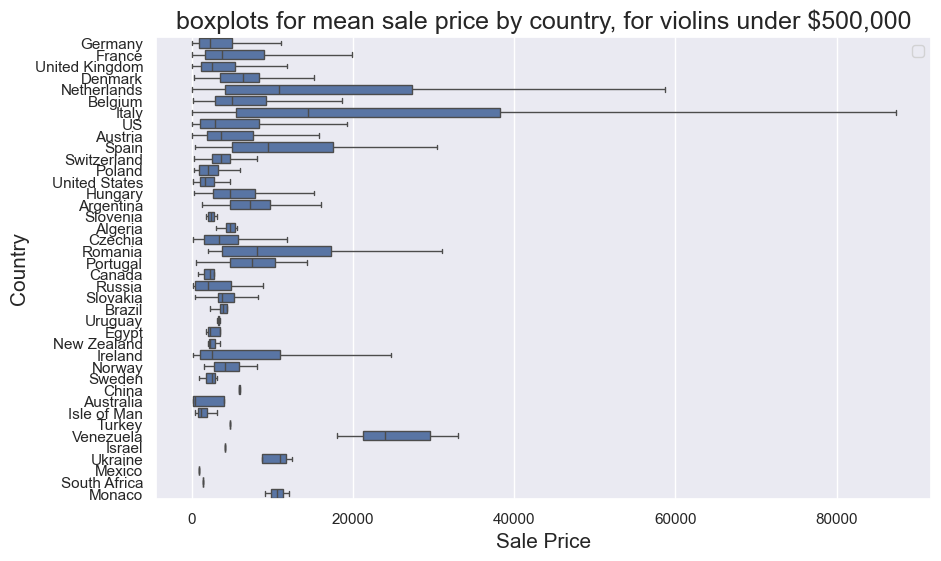

In [1031]:
# Visualize instruments under $500,000 by region
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Data for instruments under $500,000
violins_under_500 = violins[violins['SalePrice'] < 500000]

sns.boxplot(x=violins_under_500['SalePrice'], y=violins_under_500['Country'], showfliers=False)
plt.title('boxplots for mean sale price by country, for violins under $500,000', fontsize=18)
plt.ylabel('Country', fontsize=15)
plt.xlabel('Sale Price', fontsize=15)
plt.legend('')

plt.show()

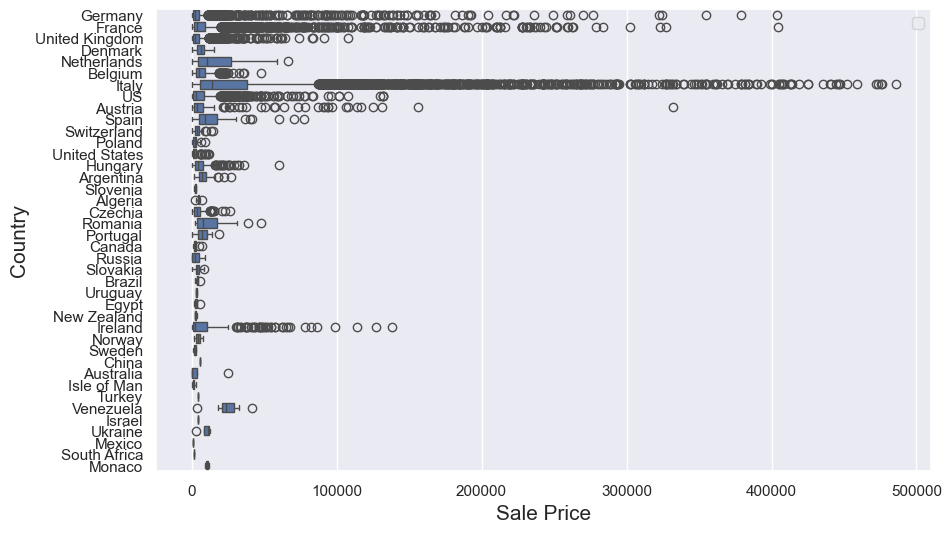

In [1033]:
# Visualize instruments under $500,000 by region
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Data for instruments under $500,000
violins_under_500 = violins[violins['SalePrice'] < 500000]

sns.boxplot(x=violins_under_500['SalePrice'], y=violins_under_500['Country'])
plt.title('', fontsize=18)
plt.ylabel('Country', fontsize=15)
plt.xlabel('Sale Price', fontsize=15)
plt.legend('')

plt.show()

### Box Plot by Decade to Show Distribution Changes

In [1036]:
vln_top_regions['Country'].unique()

array(['Italy', 'France', 'United Kingdom', 'Germany', 'US', 'Belgium',
       'Netherlands', 'Austria', 'Ireland', 'Hungary', 'Czechia'],
      dtype=object)

In [288]:
vln_top_regions

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity  \
33        Violin 2019-11-08       4130      Tarisio       Milan   
34        Violin 2018-06-25       3603      Tarisio       Milan   
35        Violin 2017-10-23       5934      Tarisio       Turin   
36        Violin 2013-10-16       4800      Tarisio       Milan   
37        Violin 2005-10-16       4700      Skinner       Milan   
...          ...        ...        ...          ...         ...   
24450     Violin 2019-10-21       4054   Brompton's      Znojmo   
24451     Violin 2008-03-31       3706    Dorotheum         NaN   
24452     Violin 1990-03-27       5366    Sotheby's         NaN   
24758     Violin 1995-05-11        143    Phillip's    Rochdale   
25241     Violin 2019-11-08       3000      Tarisio        Luby   

                    Maker    City  Country  Year  
33     Agostinelli, Luigi  Gubbio    Italy  2019  
34     Agostinelli, Luigi  Gubbio    Italy  2018  
35     Agostinelli, Luigi  Gubbio    Italy  2017  
36     Agostinelli, Luigi  Gubbio    Italy  2013  
37     Agostinelli, Luigi  Gubbio    Italy  2005  
...                   ...     ...      ...   ...  
24450  Wassermann, Joseph  Znojmo  Czechia  2019  
24451  Wassermann, Joseph  Znojmo  Czechia  2008  
24452  Wassermann, Joseph  Znojmo  Czechia  1990  
24758   Wild, Franz Anton    Brno  Czechia  1995  
25241   Zucker, Frantisek    Luby  Czechia  2019  

[23685 rows x 9 columns]

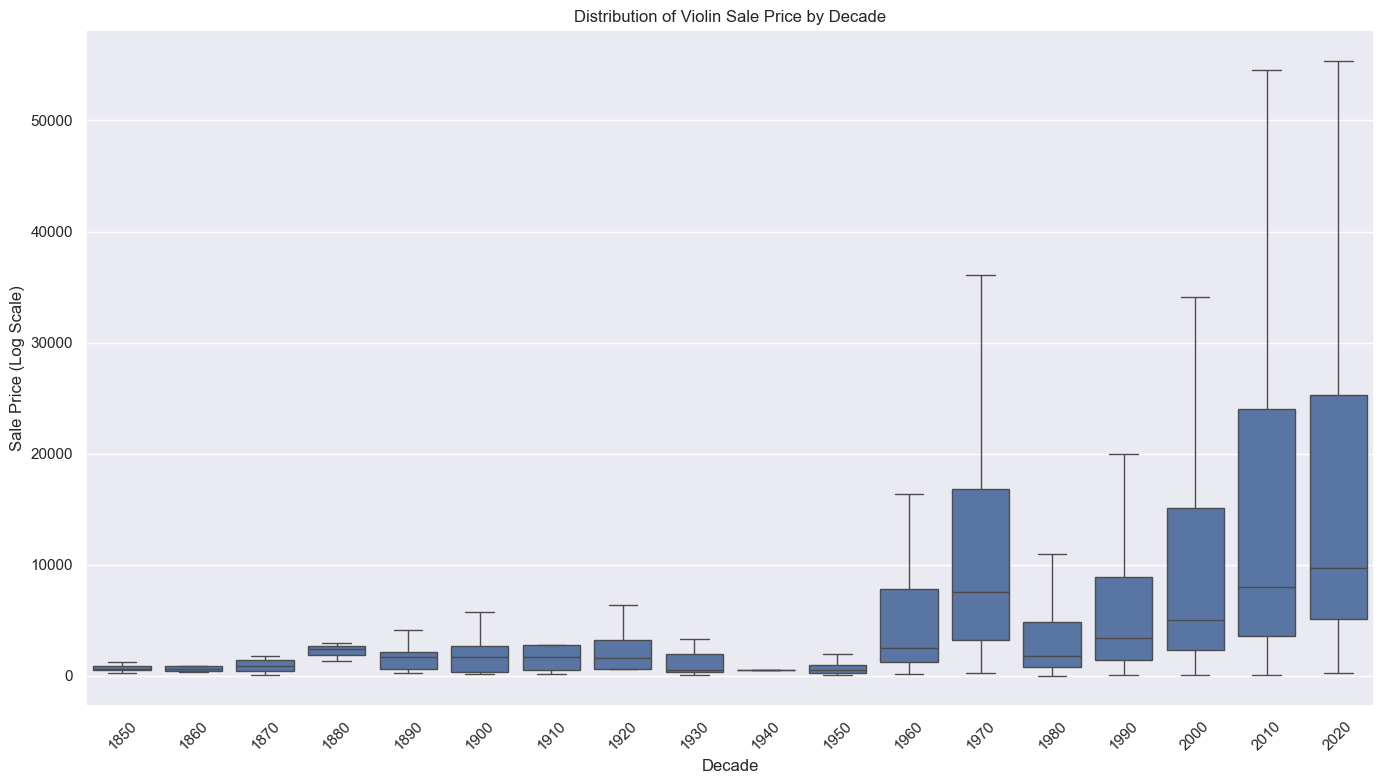

In [1043]:
# Copy dataframe
vlns_by_decade1 = violins.copy()

# Add a decade column
vlns_by_decade1['Decade'] = (vlns_by_decade1['Year'] // 10) * 10

# Box plot by decade
plt.figure(figsize=(14, 8))
sns.boxplot(x='Decade', y='SalePrice', data=vlns_by_decade1, showfliers=False)
# plt.yscale('log')
plt.xlabel('Decade')
plt.ylabel('Sale Price (Log Scale)')
plt.title('Distribution of Violin Sale Price by Decade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1059]:
top4_regions

Instrument   SaleDate  SalePrice AuctionHouse     AuctionCity  MakerID  \
152       Violin 2019-11-08       4130      Tarisio           Milan     2665   
153       Violin 2018-06-25       3603      Tarisio           Milan     2665   
154       Violin 2017-10-23       5934      Tarisio           Turin     2665   
155       Violin 2013-10-16       4800      Tarisio           Milan     2665   
156        Viola 2012-11-27       8180      Tarisio           Milan     2665   
...          ...        ...        ...          ...             ...      ...   
55234     Violin 1985-03-14        250    Phillip's  Markneukirchen     1394   
55266     Violin 2002-10-24       2138      Tarisio             NaN    15204   
55267     Violin 1997-11-18       2633      Bonhams          Passau    15204   
55268      Viola 1991-09-19       1520    Phillip's          Passau    15204   
55269     Violin 1987-04-23        540    Phillip's          Passau    15204   

                             Maker            City  Country  
152             Agostinelli, Luigi          Gubbio    Italy  
153             Agostinelli, Luigi          Gubbio    Italy  
154             Agostinelli, Luigi          Gubbio    Italy  
155             Agostinelli, Luigi          Gubbio    Italy  
156             Agostinelli, Luigi          Gubbio    Italy  
...                            ...             ...      ...  
55234  Zimmermann, Julius Heinrich  Markneukirchen  Germany  
55266            Zwerger, Anton II          Passau  Germany  
55267            Zwerger, Anton II          Passau  Germany  
55268            Zwerger, Anton II          Passau  Germany  
55269            Zwerger, Anton II          Passau  Germany  

[45992 rows x 9 columns]

In [1065]:
top4_regions['Year'] = top4_regions['SaleDate'].dt.year
top4_regions

Instrument   SaleDate  SalePrice AuctionHouse     AuctionCity  MakerID  \
152       Violin 2019-11-08       4130      Tarisio           Milan     2665   
153       Violin 2018-06-25       3603      Tarisio           Milan     2665   
154       Violin 2017-10-23       5934      Tarisio           Turin     2665   
155       Violin 2013-10-16       4800      Tarisio           Milan     2665   
156        Viola 2012-11-27       8180      Tarisio           Milan     2665   
...          ...        ...        ...          ...             ...      ...   
55234     Violin 1985-03-14        250    Phillip's  Markneukirchen     1394   
55266     Violin 2002-10-24       2138      Tarisio             NaN    15204   
55267     Violin 1997-11-18       2633      Bonhams          Passau    15204   
55268      Viola 1991-09-19       1520    Phillip's          Passau    15204   
55269     Violin 1987-04-23        540    Phillip's          Passau    15204   

                             Maker            City  Country  Year  
152             Agostinelli, Luigi          Gubbio    Italy  2019  
153             Agostinelli, Luigi          Gubbio    Italy  2018  
154             Agostinelli, Luigi          Gubbio    Italy  2017  
155             Agostinelli, Luigi          Gubbio    Italy  2013  
156             Agostinelli, Luigi          Gubbio    Italy  2012  
...                            ...             ...      ...   ...  
55234  Zimmermann, Julius Heinrich  Markneukirchen  Germany  1985  
55266            Zwerger, Anton II          Passau  Germany  2002  
55267            Zwerger, Anton II          Passau  Germany  1997  
55268            Zwerger, Anton II          Passau  Germany  1991  
55269            Zwerger, Anton II          Passau  Germany  1987  

[45992 rows x 10 columns]

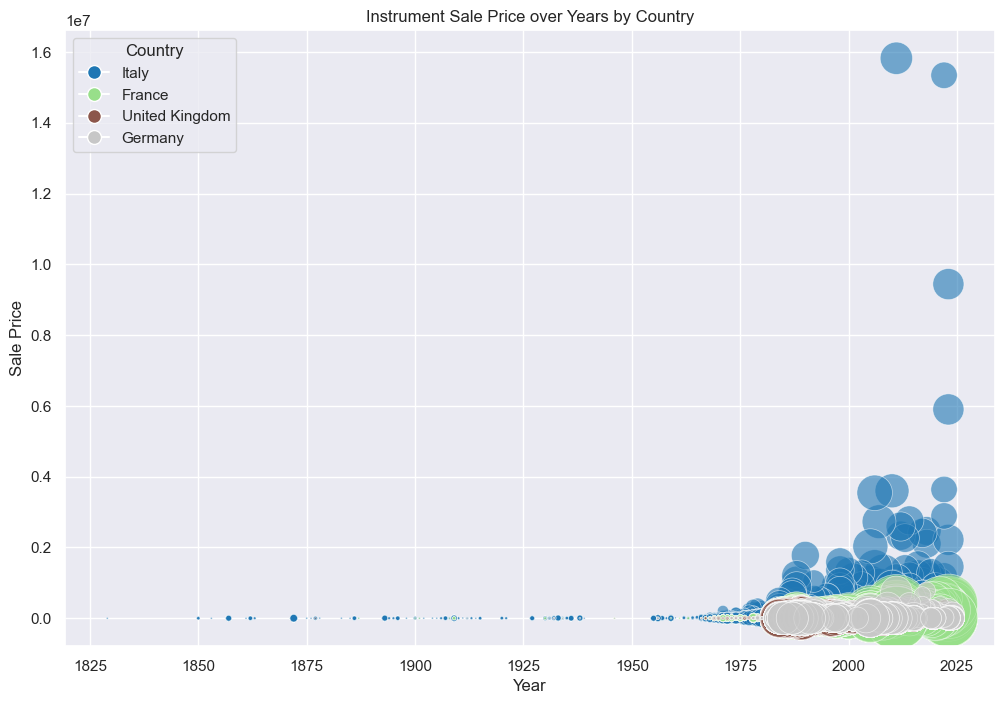

In [1069]:
### Make a bubble chart for violins with SalePrice and Year, with bubble size set to countryimport pandas as pd
import matplotlib.pyplot as plt

# copy of violins data to use
vlns_bubb = top4_regions.copy()

# Count the number of instruments by Year, Country, and Maker
instrument_counts = vlns_bubb.groupby(['Year', 'Country']).size().reset_index(name='InstrumentCount')

# Merge the counts back to the original DataFrame to get the count per row
vlns_bubb = pd.merge(vlns_bubb, instrument_counts, on=['Year', 'Country'], how='left')

# Set up color mapping by Country
countries = vlns_bubb['Country'].unique()
color_map = {country: plt.cm.tab20(i / len(countries)) for i, country in enumerate(countries)}

# Map colors to each country in the DataFrame
vlns_bubb['Color'] = vlns_bubb['Country'].map(color_map)

# Create the bubble plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    vlns_bubb['Year'],
    vlns_bubb['SalePrice'],
    s=vlns_bubb['InstrumentCount'] * 2,  # Adjust the size scaling as needed
    c=vlns_bubb['Color'],
    alpha=0.6,
    edgecolors="w",
    linewidth=0.5
)

# Add legend for countries
handles = [plt.Line2D([0], [0], marker='o', color='w', label=country, markersize=10, 
            markerfacecolor=color_map[country]) for country in countries]
plt.legend(handles=handles, title="Country")

# Label axes and show plot
plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.title('Instrument Sale Price over Years by Country')
plt.show()

In [1055]:
vlns_bubb

Instrument   SaleDate  SalePrice AuctionHouse   AuctionCity  \
0         Violin 2010-02-20       4200      Tarisio       Wallgau   
1         Violin 1987-04-27       2838   Bongartz's    Mittenwald   
2         Violin 2018-05-17      24000      Tarisio    Mittenwald   
3         Violin 2008-11-15       3884   Bongartz's           NaN   
4         Violin 1990-03-27       2146    Sotheby's    Mittenwald   
...          ...        ...        ...          ...           ...   
25260     Violin 2012-04-27     108000      Tarisio  Brooklyn, NY   
25261     Violin 2009-12-14      15634   Brompton's           NaN   
25262     Violin 2009-12-14      15634   Brompton's           NaN   
25263     Violin 2003-05-08     130000      Tarisio  Brooklyn, NY   
25264     Violin 2003-05-08      83250      Tarisio  Brooklyn, NY   

                      Maker          City  Country  Year  InstrumentCount  
0           Achner, Michael    Mittenwald  Germany  2010             97.0  
1           Achner, Michael    Mittenwald  Germany  1987            134.0  
2            Achner, Philip    Mittenwald  Germany  2018             29.0  
3            Achner, Philip    Mittenwald  Germany  2008            119.0  
4            Achner, Philip    Mittenwald  Germany  1990            118.0  
...                     ...           ...      ...   ...              ...  
25260  Zygmuntowicz, Samuel  Brooklyn, NY       US  2012             49.0  
25261  Zygmuntowicz, Samuel  Brooklyn, NY       US  2009             35.0  
25262  Zygmuntowicz, Samuel  Brooklyn, NY       US  2009             35.0  
25263  Zygmuntowicz, Samuel  Brooklyn, NY       US  2003             35.0  
25264  Zygmuntowicz, Samuel  Brooklyn, NY       US  2003             35.0  

[25265 rows x 10 columns]

In [1071]:
instrument_counts.describe()

Year  InstrumentCount
count   312.000000       312.000000
mean   1975.009615       147.410256
std      41.293981       164.726661
min    1829.000000         1.000000
25%    1965.750000         3.000000
50%    1985.500000       101.000000
75%    2005.000000       252.000000
max    2024.000000      1043.000000

In [1073]:
instrument_counts

Year         Country  InstrumentCount
0    1829           Italy                1
1    1850           Italy                3
2    1853           Italy                1
3    1857           Italy                9
4    1861           Italy                1
..    ...             ...              ...
307  2023  United Kingdom              148
308  2024          France              453
309  2024         Germany              140
310  2024           Italy              143
311  2024  United Kingdom               78

[312 rows x 3 columns]

In [1047]:
violins

Instrument   SaleDate  SalePrice AuctionHouse   AuctionCity  \
0         Violin 2010-02-20       4200      Tarisio       Wallgau   
1         Violin 1987-04-27       2838   Bongartz's    Mittenwald   
2         Violin 2018-05-17      24000      Tarisio    Mittenwald   
3         Violin 2008-11-15       3884   Bongartz's           NaN   
4         Violin 1990-03-27       2146    Sotheby's    Mittenwald   
...          ...        ...        ...          ...           ...   
25260     Violin 2012-04-27     108000      Tarisio  Brooklyn, NY   
25261     Violin 2009-12-14      15634   Brompton's           NaN   
25262     Violin 2009-12-14      15634   Brompton's           NaN   
25263     Violin 2003-05-08     130000      Tarisio  Brooklyn, NY   
25264     Violin 2003-05-08      83250      Tarisio  Brooklyn, NY   

                      Maker          City  Country  Year  
0           Achner, Michael    Mittenwald  Germany  2010  
1           Achner, Michael    Mittenwald  Germany  1987  
2            Achner, Philip    Mittenwald  Germany  2018  
3            Achner, Philip    Mittenwald  Germany  2008  
4            Achner, Philip    Mittenwald  Germany  1990  
...                     ...           ...      ...   ...  
25260  Zygmuntowicz, Samuel  Brooklyn, NY       US  2012  
25261  Zygmuntowicz, Samuel  Brooklyn, NY       US  2009  
25262  Zygmuntowicz, Samuel  Brooklyn, NY       US  2009  
25263  Zygmuntowicz, Samuel  Brooklyn, NY       US  2003  
25264  Zygmuntowicz, Samuel  Brooklyn, NY       US  2003  

[25265 rows x 9 columns]

# Violin Bow Sales
[Return to Table of Contents](#Contents)

In [143]:
# Create a smaller dataframe of violin bows
violin_bows = Tarisio.query('Instrument == "Violin Bow"').reset_index().drop(['index'], axis=1)
violin_bows

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity  MakerID  \
0      Violin Bow 2005-11-12       3296   Bongartz's         NaN      890   
1      Violin Bow 1991-09-19       2280    Phillip's       Paris      890   
2      Violin Bow 1991-03-13        694    Phillip's       Paris      890   
3      Violin Bow 1987-06-09        658    Sotheby's       Paris      890   
4      Violin Bow 1985-11-18        295   Bongartz's       Paris      890   
...           ...        ...        ...          ...         ...      ...   
17328  Violin Bow 1989-10-12        245    Phillip's     Leipzig     1394   
17329  Violin Bow 2015-08-21       1200      Tarisio         NaN     1056   
17330  Violin Bow 2014-12-12        325      Tarisio         NaN     1056   
17331  Violin Bow 2001-11-13       1039    Sotheby's         NaN     1056   
17332  Violin Bow 1989-06-03        468      Skinner         NaN     1056   

                             Maker            City  Country  
0        Acoulon, Alexandre Alfred       Mirecourt   France  
1        Acoulon, Alexandre Alfred       Mirecourt   France  
2        Acoulon, Alexandre Alfred       Mirecourt   France  
3        Acoulon, Alexandre Alfred       Mirecourt   France  
4        Acoulon, Alexandre Alfred       Mirecourt   France  
...                            ...             ...      ...  
17328  Zimmermann, Julius Heinrich  Markneukirchen  Germany  
17329          Zöphel, Ernst Willy             NaN      NaN  
17330          Zöphel, Ernst Willy             NaN      NaN  
17331          Zöphel, Ernst Willy             NaN      NaN  
17332          Zöphel, Ernst Willy             NaN      NaN  

[17333 rows x 9 columns]

In [144]:
violin_bows.query('Instrument == "Violin Bow"').SalePrice.max()

367862

In [145]:
violin_bows.sort_values(by=['SalePrice'], ascending = False)

Instrument   SaleDate  SalePrice  \
14577  Violin Bow 2018-12-05     367862   
14572  Violin Bow 2019-11-28     324668   
14566  Violin Bow 2020-12-03     316652   
14562  Violin Bow 2024-03-15     228000   
14565  Violin Bow 2020-12-03     218640   
...           ...        ...        ...   
16973  Violin Bow 1983-09-29         49   
7744   Violin Bow 2002-10-21         39   
17327  Violin Bow 1991-11-11         33   
10563  Violin Bow 2002-10-21         24   
3844   Violin Bow 1985-11-18          0   

                                AuctionHouse AuctionCity  MakerID  \
14577                         Vichy-Enchères         NaN      761   
14572                         Vichy-Enchères         NaN      761   
14566                         Vichy-Enchères         NaN      761   
14562                                    NaN         NaN      761   
14565                         Vichy-Enchères         NaN      761   
...                                      ...         ...      ...   
16973                              Sotheby's     Dresden     1572   
7744   Millon & Associés (Gilles Chancereul)         NaN     1118   
17327                             Bongartz's     Leipzig     1394   
10563  Millon & Associés (Gilles Chancereul)         NaN     1093   
3844                              Bongartz's       Lille     1838   

                                    Maker            City  Country  
14577  Tourte, François Xavier 'le Jeune'           Paris   France  
14572  Tourte, François Xavier 'le Jeune'           Paris   France  
14566  Tourte, François Xavier 'le Jeune'           Paris   France  
14562  Tourte, François Xavier 'le Jeune'           Paris   France  
14565  Tourte, François Xavier 'le Jeune'           Paris   France  
...                                   ...             ...      ...  
16973                   Weichold, Richard         Dresden  Germany  
7744                      Lotte, François       Mirecourt   France  
17327         Zimmermann, Julius Heinrich  Markneukirchen  Germany  
10563                     Pajeot, Étienne       Mirecourt   France  
3844                   Hel, Pierre Joseph           Lille   France  

[17333 rows x 9 columns]

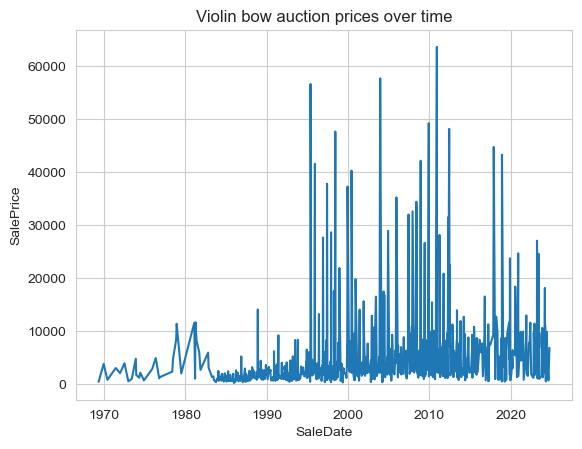

In [146]:
sns.lineplot(x = 'SaleDate', y = 'SalePrice', data = violin_bows, errorbar=None).set_title('Violin bow auction prices over time')
plt.show()

In [147]:
violin_bows.head()

Instrument   SaleDate  SalePrice AuctionHouse AuctionCity  MakerID  \
0  Violin Bow 2005-11-12       3296   Bongartz's         NaN      890   
1  Violin Bow 1991-09-19       2280    Phillip's       Paris      890   
2  Violin Bow 1991-03-13        694    Phillip's       Paris      890   
3  Violin Bow 1987-06-09        658    Sotheby's       Paris      890   
4  Violin Bow 1985-11-18        295   Bongartz's       Paris      890   

                       Maker       City Country  
0  Acoulon, Alexandre Alfred  Mirecourt  France  
1  Acoulon, Alexandre Alfred  Mirecourt  France  
2  Acoulon, Alexandre Alfred  Mirecourt  France  
3  Acoulon, Alexandre Alfred  Mirecourt  France  
4  Acoulon, Alexandre Alfred  Mirecourt  France

### Box Plot by Decade to Show Distribution Changes in Violin Bow Sales

In [149]:
# Keep only a few columns
vb = violin_bows[['SalePrice', 'Country', 'SaleDate', 'Maker']]
vb

SalePrice  Country   SaleDate                        Maker
0           3296   France 2005-11-12    Acoulon, Alexandre Alfred
1           2280   France 1991-09-19    Acoulon, Alexandre Alfred
2            694   France 1991-03-13    Acoulon, Alexandre Alfred
3            658   France 1987-06-09    Acoulon, Alexandre Alfred
4            295   France 1985-11-18    Acoulon, Alexandre Alfred
...          ...      ...        ...                          ...
17328        245  Germany 1989-10-12  Zimmermann, Julius Heinrich
17329       1200      NaN 2015-08-21          Zöphel, Ernst Willy
17330        325      NaN 2014-12-12          Zöphel, Ernst Willy
17331       1039      NaN 2001-11-13          Zöphel, Ernst Willy
17332        468      NaN 1989-06-03          Zöphel, Ernst Willy

[17333 rows x 4 columns]

In [150]:
# Add 'Year' column
vb['Year'] = vb['SaleDate'].dt.year
vb

/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_50239/3043019495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vb['Year'] = vb['SaleDate'].dt.year


SalePrice  Country   SaleDate                        Maker  Year
0           3296   France 2005-11-12    Acoulon, Alexandre Alfred  2005
1           2280   France 1991-09-19    Acoulon, Alexandre Alfred  1991
2            694   France 1991-03-13    Acoulon, Alexandre Alfred  1991
3            658   France 1987-06-09    Acoulon, Alexandre Alfred  1987
4            295   France 1985-11-18    Acoulon, Alexandre Alfred  1985
...          ...      ...        ...                          ...   ...
17328        245  Germany 1989-10-12  Zimmermann, Julius Heinrich  1989
17329       1200      NaN 2015-08-21          Zöphel, Ernst Willy  2015
17330        325      NaN 2014-12-12          Zöphel, Ernst Willy  2014
17331       1039      NaN 2001-11-13          Zöphel, Ernst Willy  2001
17332        468      NaN 1989-06-03          Zöphel, Ernst Willy  1989

[17333 rows x 5 columns]

In [151]:
vb['SaleDate'].min()

Timestamp('1969-04-24 00:00:00')

In [152]:
Tarisio_bows = Tarisio[Tarisio['Instrument'] == 'Violin Bow']
Tarisio_bows['SaleDate'].min()

Timestamp('1969-04-24 00:00:00')

### So, it looks like bows did not start passing through the data set until 1969. ?

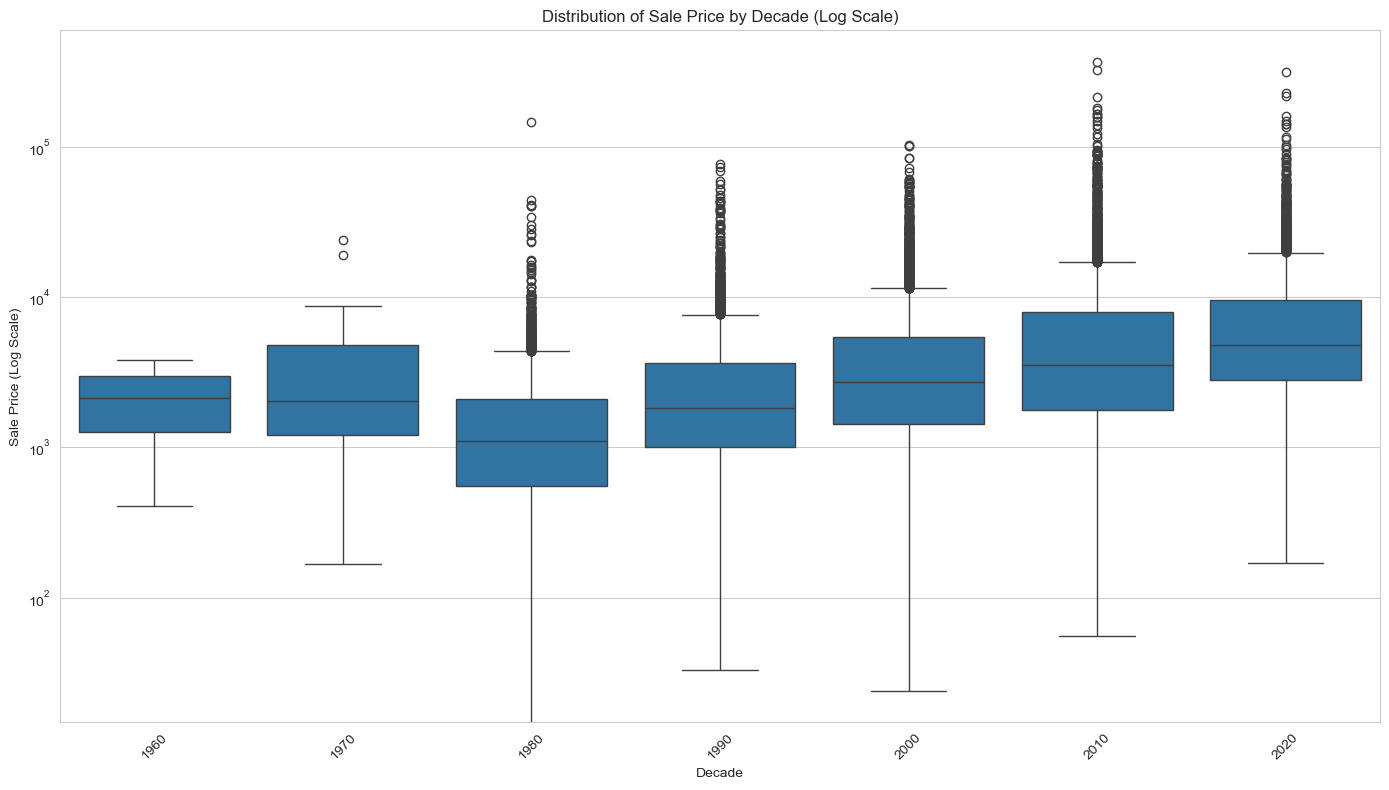

In [154]:
# Add a decade column
bows_by_decade = vb.copy()
bows_by_decade['Decade'] = (bows_by_decade['Year'] // 10) * 10

# Box plot by decade
plt.figure(figsize=(14, 8))
sns.boxplot(x='Decade', y='SalePrice', data=bows_by_decade)
plt.yscale('log')
plt.xlabel('Decade')
plt.ylabel('Sale Price (Log Scale)')
plt.title('Distribution of Sale Price by Decade (Log Scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [155]:
bows_by_decade['SalePrice'].describe()

count     17333.000000
mean       5490.125079
std       11091.230789
min           0.000000
25%        1240.000000
50%        2557.000000
75%        5398.000000
max      367862.000000
Name: SalePrice, dtype: float64

# Resources
[Return to Table of Contents](#Contents)

Plotly graphing library - visualization ref from James: <br>
https://plotly.com/python/plotly-express/